<div style="background-color: darkslategray; color: white; padding: 15px; border-radius: 8px;">
    <center><h1 style="font-family: Arial, sans-serif;">Deciding on Compensation Benefits</h1></center>
    <center><h3 style="font-family: Arial, sans-serif;">Machine Learning Project</h3></center>
</div>

**<h3>Table of Contents</h3>**
* [1. Environment Setup](#1-environment-setup)
    * [1.1 Import Libraries](#11-import-libraries)
    * [1.2 Import Dataset](#12-import-dataset)

* [2. Exploratory Data Analysis](#2-exploratory-data-analysis)
    * [2.1 General Analysis of the dataset](#21-general-analysis-of-the-dataset)
        * [2.1.1 Rows of Missing values](#211-rows-of-missing-values)
        * [2.1.2 Data Coherence](#212-data-coherence)
        * [2.1.3 Duplicate Records](#213-duplicate-records)

    * [2.2 Time-Based Variables](#22-time-based-variables)
        * [2.2.1 First adjustments and overview](#221-first-adjustments-and-overview)
        * [2.2.2 Date Differences](#222-date-differences)
        * [2.2.3 Relationships between the dates](#223-relationships-between-the-dates)
    
    * [2.3 Numerical Variables](#23-numerical-variables)
        * [2.3.1 First adjustments and overview](#231-first-adjustments-and-overview)
        * [2.3.2 Visual analysis](#232-visual-analysis)

    * [2.4 Categorical Variables](#24-categorical-variables)
        * [2.4.1 First adjustments and overview](#241-first-adjustments-and-overview)
        * [2.4.2 Histograms for categorical features](#242-histograms-for-categorical-features)
        * [2.4.3 Converting unknown values to missing](#243-converting-unknown-values-to-missing)

    * [2.5 Multivariate Relationships](#25-multivariate-relationships)

* [3. Creating binary features to handle Missing and Zero Values](#3-creating-binary-features-to-handle-missing-and-zero-values)

* [4. Split the dataset](#4-split-the-dataset)

* [5. Clean and pre-process the dataset](#5-clean-and-pre-process-the-dataset)
    * [5.1 Outlier Treatment](#51-outlier-tratmeant)
    * [5.2 Missing Values Treatment](#52-missing-values-treatment)
    * [5.3 Feature Engineering](#53-feature-engineering)
    * [5.4 Dealing with Categorical variables](#54-dealing-with-categorical-variables)
    * [5.5 Data Scaling](#55-data-scaling)


<div class="alert alert-block alert-success">

# **1.** Environment Setup

<div>


## **1.1** Import Libraries

In [ ]:
from functions import *

In [39]:
pd.set_option('display.max_columns', None) #to be able to see all features

## **1.2** Import Dataset

In [40]:
df_csv = "https://dl.dropboxusercontent.com/scl/fi/l2prkx68paaegud7km40z/df.csv?rlkey=panbyshub30v6mu0w84wpnyb4&e=1&st=zcfiiwp7&dl=0"  # URL to CSV file
df = pd.read_csv(df_csv, low_memory=False)  # Load CSV data into a DataFrame; low_memory=False optimizes for large files

In [41]:
# Display the first 5 rows of the DataFrame to get an overview of the data
df.head()

Accident Date  Age at Injury Alternative Dispute Resolution Assembly Date  \
0    2019-12-30           31.0                              N    2020-01-01   
1    2019-08-30           46.0                              N    2020-01-01   
2    2019-12-06           40.0                              N    2020-01-01   
3           NaN            NaN                            NaN    2020-01-01   
4    2019-12-30           61.0                              N    2020-01-01   

  Attorney/Representative  Average Weekly Wage  Birth Year    C-2 Date  \
0                       N                 0.00      1988.0  2019-12-31   
1                       Y              1745.93      1973.0  2020-01-01   
2                       N              1434.80      1979.0  2020-01-01   
3                     NaN                  NaN         NaN         NaN   
4                       N                  NaN      1958.0  2019-12-31   

     C-3 Date                  Carrier Name Carrier Type  Claim Identifier  \
0         NaN    NEW HAMPSHIRE INSURANCE CO  1A. PRIVATE           5393875   
1  2020-01-14  ZURICH AMERICAN INSURANCE CO  1A. PRIVATE           5393091   
2         NaN     INDEMNITY INSURANCE CO OF  1A. PRIVATE           5393889   
3         NaN                           NaN          NaN         957648180   
4         NaN          STATE INSURANCE FUND      2A. SIF           5393887   

  Claim Injury Type County of Injury COVID-19 Indicator District Name  \
0       2. NON-COMP     ST. LAWRENCE                  N      SYRACUSE   
1      4. TEMPORARY          WYOMING                  N     ROCHESTER   
2      4. TEMPORARY           ORANGE                  N        ALBANY   
3               NaN              NaN                NaN           NaN   
4       2. NON-COMP         DUTCHESS                  N        ALBANY   

  First Hearing Date Gender  IME-4 Count  Industry Code  \
0                NaN      M          NaN           44.0   
1         2020-02-21      F          4.0           23.0   
2                NaN      M          NaN           56.0   
3                NaN    NaN          NaN            NaN   
4                NaN      M          NaN           62.0   

                           Industry Code Description Medical Fee Region  \
0                                       RETAIL TRADE                  I   
1                                       CONSTRUCTION                  I   
2  ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...                 II   
3                                                NaN                NaN   
4                  HEALTH CARE AND SOCIAL ASSISTANCE                 II   

   OIICS Nature of Injury Description  WCIO Cause of Injury Code  \
0                                 NaN                       27.0   
1                                 NaN                       97.0   
2                                 NaN                       79.0   
3                                 NaN                        NaN   
4                                 NaN                       16.0   

  WCIO Cause of Injury Description  WCIO Nature of Injury Code  \
0     FROM LIQUID OR GREASE SPILLS                        10.0   
1                REPETITIVE MOTION                        49.0   
2   OBJECT BEING LIFTED OR HANDLED                         7.0   
3                              NaN                         NaN   
4  HAND TOOL, UTENSIL; NOT POWERED                        43.0   

  WCIO Nature of Injury Description  WCIO Part Of Body Code  \
0                         CONTUSION                    62.0   
1                    SPRAIN OR TEAR                    38.0   
2                        CONCUSSION                    10.0   
3                               NaN                     NaN   
4                          PUNCTURE                    36.0   

  WCIO Part Of Body Description Zip Code  Agreement Reached      WCB Decision  \
0                      BUTTOCKS    13662                0.0  Not Work Related   
1                   S

<div class="alert alert-block alert-success">

# **2.** Exploratory Data Analysis

<div>

## **2.1** General Analysis of the dataset

In [42]:
# Show the number of rows and columns in the DataFrame
df.shape

(593471, 33)

In [43]:
# Display a summary of the DataFrame, including data types and non-null counts for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

In [44]:
# Show summary statistics for categorical columns, transposed for easier reading
df.describe(include="object").T

count unique  \
Accident Date                      570337   5539   
Alternative Dispute Resolution     574026      3   
Assembly Date                      593471   1096   
Attorney/Representative            574026      2   
C-2 Date                           559466   2475   
C-3 Date                           187245   1648   
Carrier Name                       574026   2046   
Carrier Type                       574026      8   
Claim Injury Type                  574026      8   
County of Injury                   574026     63   
COVID-19 Indicator                 574026      2   
District Name                      574026      8   
First Hearing Date                 150798   1094   
Gender                             574026      4   
Industry Code Description          564068     20   
Medical Fee Region                 574026      5   
WCIO Cause of Injury Description   558386     74   
WCIO Nature of Injury Description  558369     56   
WCIO Part Of Body Description      556944     54   
Zip Code                           545389   8286   
WCB Decision                       574026      1   

                                                                 top    freq  
Accident Date                                             2020-03-01    1245  
Alternative Dispute Resolution                                     N  571412  
Assembly Date                                             2020-03-06    1422  
Attorney/Representative                                            N  392291  
C-2 Date                                                  2021-05-11    1847  
C-3 Date                                                  2021-04-21     350  
Carrier Name                                    STATE INSURANCE FUND  111144  
Carrier Type                                             1A. PRIVATE  285368  
Claim Injury Type                                        2. NON-COMP  291078  
County of Injury                                             SUFFOLK   60430  
COVID-19 Indicator                                                 N  546505  
District Name                                                    NYC  270779  
First Hearing Date                                        2022-04-15     440  
Gender                                                             M  335218  
Industry Code Description          HEALTH CARE AND SOCIAL ASSISTANCE  114339  
Medical Fee Region                                                IV  265981  
WCIO Cause of Injury Description                             LIFTING   46610  
WCIO Nature of Injury Description                     STRAIN OR TEAR  153373  
WCIO Part Of Body Description                        LOWER BACK AREA   51862  
Zip Code                                                       11236    3398  
WCB Decision                                        Not Work Related  574026

In [45]:
# Show summary statistics for numerical columns
df.describe(exclude="object").T

count          mean           std  \
Age at Injury                       574026.0  4.211427e+01  1.425643e+01   
Average Weekly Wage                 545375.0  4.910883e+02  6.092918e+03   
Birth Year                          544948.0  1.886768e+03  4.146444e+02   
Claim Identifier                    593471.0  2.366760e+07  1.079271e+08   
IME-4 Count                         132803.0  3.207337e+00  2.832303e+00   
Industry Code                       564068.0  5.864531e+01  1.964417e+01   
OIICS Nature of Injury Description       0.0           NaN           NaN   
WCIO Cause of Injury Code           558386.0  5.438114e+01  2.587428e+01   
WCIO Nature of Injury Code          558369.0  4.101384e+01  2.220752e+01   
WCIO Part Of Body Code              556944.0  3.973815e+01  2.236594e+01   
Agreement Reached                   574026.0  4.666513e-02  2.109208e-01   
Number of Dependents                574026.0  3.006559e+00  2.000801e+00   

                                          min        25%        50%  \
Age at Injury                             0.0       31.0       42.0   
Average Weekly Wage                       0.0        0.0        0.0   
Birth Year                                0.0     1965.0     1977.0   
Claim Identifier                    5393066.0  5593414.5  5791212.0   
IME-4 Count                               1.0        1.0        2.0   
Industry Code                            11.0       45.0       61.0   
OIICS Nature of Injury Description        NaN        NaN        NaN   
WCIO Cause of Injury Code                 1.0       31.0       56.0   
WCIO Nature of Injury Code                1.0       16.0       49.0   
WCIO Part Of Body Code                   -9.0       33.0       38.0   
Agreement Reached                         0.0        0.0        0.0   
Number of Dependents                      0.0        1.0        3.0   

                                          75%          max  
Age at Injury                            54.0        117.0  
Average Weekly Wage                     841.0    2828079.0  
Birth Year                             1989.0       2018.0  
Claim Identifier                    5991000.5  999891667.0  
IME-4 Count                               4.0         73.0  
Industry Code                            71.0         92.0  
OIICS Nature of Injury Description        NaN          NaN  
WCIO Cause of Injury Code                75.0         99.0  
WCIO Nature of Injury Code               52.0         91.0  
WCIO Part Of Body Code                   53.0         99.0  
Agreement Reached                         0.0          1.0  
Number of Dependents                      5.0          6.0

In [46]:
# Loop through each feature
for column in df.columns.drop('Claim Identifier'):
    unique_vals = df[column].unique()
    unique_count = len(unique_vals)

    print(f"\n--- {column} ---")
    
    # If there are more than 15 unique values, print the count
    if unique_count > 15:
        print(f"Number of unique values: {unique_count}")
    else:
        print(unique_vals)


--- Accident Date ---
Number of unique values: 5540

--- Age at Injury ---
Number of unique values: 109

--- Alternative Dispute Resolution ---
['N' nan 'Y' 'U']

--- Assembly Date ---
Number of unique values: 1096

--- Attorney/Representative ---
['N' 'Y' nan]

--- Average Weekly Wage ---
Number of unique values: 120025

--- Birth Year ---
Number of unique values: 108

--- C-2 Date ---
Number of unique values: 2476

--- C-3 Date ---
Number of unique values: 1649

--- Carrier Name ---
Number of unique values: 2047

--- Carrier Type ---
['1A. PRIVATE' nan '2A. SIF' '4A. SELF PRIVATE' '3A. SELF PUBLIC'
 'UNKNOWN' '5D. SPECIAL FUND - UNKNOWN'
 '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)'
 '5C. SPECIAL FUND - POI CARRIER WCB MENANDS']

--- Claim Injury Type ---
['2. NON-COMP' '4. TEMPORARY' nan '3. MED ONLY' '5. PPD SCH LOSS'
 '6. PPD NSL' '1. CANCELLED' '8. DEATH' '7. PTD']

--- County of Injury ---
Number of unique values: 64

--- COVID-19 Indicator ---
['N' nan 'Y']

--- District Name

### **2.1.1** Rows of Missing values

There are several features with exactly 19,445 missing values.

When we loaded the dataset, we can also see that the 4th row is full of NaN.

Assembly Date and Claim Identifier are the only variables with 0 missing values. So we can try identifying the rows that have missing values for all columns except for those 2.

In [47]:
# Saving in missing_rows those that have NaN for all columns except AssemblyDate and ClaimIdentifier
missing_rows = df.drop(['Assembly Date','Claim Identifier'], axis = 1).isnull().all(axis=1)
df[missing_rows]

Accident Date  Age at Injury Alternative Dispute Resolution  \
3                NaN            NaN                            NaN   
33               NaN            NaN                            NaN   
37               NaN            NaN                            NaN   
42               NaN            NaN                            NaN   
51               NaN            NaN                            NaN   
...              ...            ...                            ...   
593465           NaN            NaN                            NaN   
593466           NaN            NaN                            NaN   
593468           NaN            NaN                            NaN   
593469           NaN            NaN                            NaN   
593470           NaN            NaN                            NaN   

       Assembly Date Attorney/Representative  Average Weekly Wage  Birth Year  \
3         2020-01-01                     NaN                  NaN         NaN   
33        2020-01-01                     NaN                  NaN         NaN   
37        2020-01-01                     NaN                  NaN         NaN   
42        2020-01-01                     NaN                  NaN         NaN   
51        2020-01-01                     NaN                  NaN         NaN   
...              ...                     ...                  ...         ...   
593465    2022-12-31                     NaN                  NaN         NaN   
593466    2022-12-31                     NaN                  NaN         NaN   
593468    2022-12-31                     NaN                  NaN         NaN   
593469    2022-12-31                     NaN                  NaN         NaN   
593470    2022-12-31                     NaN                  NaN         NaN   

       C-2 Date C-3 Date Carrier Name Carrier Type  Claim Identifier  \
3           NaN      NaN          NaN          NaN         957648180   
33          NaN      NaN          NaN          NaN         363651794   
37          NaN      NaN          NaN          NaN         209507552   
42          NaN      NaN          NaN          NaN         970865999   
51          NaN      NaN          NaN          NaN         807753247   
...         ...      ...          ...          ...               ...   
593465      NaN      NaN          NaN          NaN         365870975   
593466      NaN      NaN          NaN          NaN         327160035   
593468      NaN      NaN          NaN          NaN         249875936   
593469      NaN      NaN          NaN          NaN         120584215   
593470      NaN      NaN          NaN          NaN         818961390   

       Claim Injury Type County of Injury COVID-19 Indicator District Name  \
3                    NaN              NaN                NaN           NaN   
33                   NaN              NaN                NaN           NaN   
37                   NaN              NaN                NaN           NaN   
42                   NaN              NaN                NaN           NaN   
51                   NaN              NaN                NaN           NaN   
...                  ...              ...                ...           ...   
593465               NaN              NaN                NaN           NaN   
593466               NaN              NaN                NaN           NaN   
593468               NaN              NaN                NaN           NaN   
593469               NaN              NaN                NaN           NaN   
593470               NaN              NaN                NaN           NaN   

       First Hearing Date Gender  IME-4 Count  Industry Code  \
3                     NaN    NaN          NaN            NaN   
33                    NaN    NaN          NaN            NaN   
37                    NaN    NaN          NaN            NaN   
42                    NaN    NaN          NaN            NaN   
51                    NaN    NaN          NaN            NaN   
...    

Furthermore, we can see that these are exactly 19,445 rows as well.

Even though they all have different dates and different claim identifiers, there is absolutely no value to be extracted from them, so we will delete them

In [48]:
df = delete_missing_rows(df)
print(f'There are {df.shape[0]} rows in the dataset after deleting missing rows')

There are 574026 rows in the dataset after deleting missing rows


### **2.1.2** Data Coherence

#### **2.1.2.1** Treating Dates

There are several columns with dates stored as strings. To prevent them of being treated as if they were categorical variables, which would make hard date comparison, filtering, extraction of yearly/monthly/daily components, among other things we convert them into datetime format from pandas.

In [49]:
date_variables = ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date']
df = convert_to_datetime(df, date_variables)

print(df[date_variables].dtypes)

Accident Date         datetime64[ns]
Assembly Date         datetime64[ns]
C-2 Date              datetime64[ns]
C-3 Date              datetime64[ns]
First Hearing Date    datetime64[ns]
dtype: object


#### **2.1.2.2** Columns of missing values and duplicated data

In [50]:
col = 'OIICS Nature of Injury Description'

print(f'{col} has {df[col].isna().mean()*100}% missing values')

OIICS Nature of Injury Description has 100.0% missing values


In [51]:
print(df['WCB Decision'].unique())

print(df['Agreement Reached'].unique())

['Not Work Related']
[0. 1.]


Given the results, we are dropping the following columns:

- **OIICS Nature of Injury Description** - This feature has 100% of missing values. Therefore it doesn't have any information

- **WCB Decision** - This feature is a target variable, meaning it doesn't exist until the claim is finished. It is not present in our test data. Additionally, the column has only one unique value, 'No Decision', which is not useful for our analysis.

In [52]:
columns_to_remove = ['OIICS Nature of Injury Description', 'WCB Decision']
df = drop_columns(df, columns_to_remove)

#### **2.1.2.3** Codes and Descriptions

In [53]:
print(len(df['Industry Code'].unique()), 
      len(df['Industry Code Description'].unique()), 
      len(df[['Industry Code', 'Industry Code Description']].drop_duplicates()))

# Number of unique values in 'WCIO Cause of Injury Code' and 'WCIO Cause of Injury Description' columns,
# and the number of unique combinations of both
print(len(df['WCIO Cause of Injury Code'].unique()), 
      len(df['WCIO Cause of Injury Description'].unique()), 
      len(df[['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description']].drop_duplicates()))

# Number of unique values in 'WCIO Nature of Injury Code' and 'WCIO Nature of Injury Description' columns,
# and the number of unique combinations of both
print(len(df['WCIO Nature of Injury Code'].unique()), 
      len(df['WCIO Nature of Injury Description'].unique()), 
      len(df[['WCIO Nature of Injury Code', 'WCIO Nature of Injury Description']].drop_duplicates()))

# Number of unique values in 'WCIO Part Of Body Code' and 'WCIO Part Of Body Description' columns,
# and the number of unique combinations of both
print(len(df['WCIO Part Of Body Code'].unique()), 
      len(df['WCIO Part Of Body Description'].unique()), 
      len(df[['WCIO Part Of Body Code', 'WCIO Part Of Body Description']].drop_duplicates()))

25 21 25
78 75 78
57 57 57
58 55 58


- We have 25 codes to 21 descriptions in Industry Code, and 25 different combinations, what means that code is more specific than description (we have more than one descripiton to each code).

- We have 78 codes to 75 descriptions in WCIO Cause of Injury, and 78 different combinations, what means that code is more specific than description (we have more than one descripiton to each code).

- We have 57 codes to 57 descriptions in WCIO Nature of Injury, and 57 different combinations. This means we have  1:1 description-code match.

- We have 58 codes to 55 descriptions in WCIO Part of Body, and 58 different combinations, what means that code is more specific than description (we have more than one descripiton to each code).


In [54]:
duplicated_ind = df.groupby('Industry Code Description')['Industry Code'].nunique()
duplicated_ind[duplicated_ind>1]


Industry Code Description
MANUFACTURING                     3
RETAIL TRADE                      2
TRANSPORTATION AND WAREHOUSING    2
Name: Industry Code, dtype: int64

In [55]:
duplicated_cause = df.groupby('WCIO Cause of Injury Description')['WCIO Cause of Injury Code'].nunique()
duplicated_cause[duplicated_cause>1]

WCIO Cause of Injury Description
OBJECT BEING LIFTED OR HANDLED    3
REPETITIVE MOTION                 2
Name: WCIO Cause of Injury Code, dtype: int64

In [56]:
duplicated_nature = df.groupby('WCIO Nature of Injury Description')['WCIO Nature of Injury Code'].nunique()
duplicated_nature[duplicated_nature>1]

Series([], Name: WCIO Nature of Injury Code, dtype: int64)

In [57]:
duplicated_pob = df.groupby('WCIO Part Of Body Description')['WCIO Part Of Body Code'].nunique()
duplicated_pob[duplicated_pob>1]

WCIO Part Of Body Description
DISC           2
SOFT TISSUE    2
SPINAL CORD    2
Name: WCIO Part Of Body Code, dtype: int64

##### COVID 19 Indicator

In [58]:
df.loc[(df['COVID-19 Indicator'] != 'Y') & (df['WCIO Nature of Injury Description'] == 'COVID-19')].shape[0]/df.shape[0]

0.0002926696700149471

In [59]:
df.loc[(df['COVID-19 Indicator'] != 'Y') & (df['WCIO Nature of Injury Description'] == 'COVID-19'), 'COVID-19 Indicator'] = 'Y'

### **2.1.3** Duplicate Records

In [60]:
print(f'There are {df.duplicated().sum()} duplicates in the dataset.')

There are 0 duplicates in the dataset.


## **2.2** Time Based Variables

| Time Variables                                | Type             
|-----------------------------------------------|-----------------
| Accident Date                                 | datetime64[ns] 
| C-2 Date                                      | datetime64[ns] 
| C-3 Date                                      | datetime64[ns] 
| Assembly Date                                 | datetime64[ns] 
| First Hearing Date                            | datetime64[ns] 


### **2.2.1** First adjustments and overview

In [61]:
date_variables = ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date']

In [62]:
for col in date_variables:
    print(f"Statistics for {col}:")
    
    stats = datetime_statistics_optimized(df, col)
    
    for stat, value in stats.items():
        print(f"{stat}: {value}")
    
    print("\n")

Statistics for Accident Date:
Earliest Date: 1961-09-06
Latest Date: 2023-09-29
Range of Dates: 62 years, 0 months, 23 days
Number of Records: 570337
Number of Missing Values: 3689
Distinct Values: 5539
Mean Date: 2021-04-28
Median Date: 2021-06-27
Standard Deviation (approx.): 1 years, 10 months, 14 days
Most Frequent Date: 2020-03-01


Statistics for Assembly Date:
Earliest Date: 2020-01-01
Latest Date: 2022-12-31
Range of Dates: 2 years, 11 months, 30 days
Number of Records: 574026
Number of Missing Values: 0
Distinct Values: 897
Mean Date: 2021-07-19
Median Date: 2021-07-30
Standard Deviation (approx.): 0 years, 10 months, 10 days
Most Frequent Date: 2020-03-06


Statistics for C-2 Date:
Earliest Date: 1996-01-12
Latest Date: 2024-06-01
Range of Dates: 28 years, 4 months, 20 days
Number of Records: 559466
Number of Missing Values: 14560
Distinct Values: 2475
Mean Date: 2021-07-16
Median Date: 2021-08-09
Standard Deviation (approx.): 1 years, 1 months, 11 days
Most Frequent Date: 20

**KEY STATISTICS FOR DATES**: 

- *Accident date*: The earliest date for accident date is 1961-09-06, which is odd given that assemblies refer to 2020-2022 period. The latest accident date is 2023-09-29, which in our data set is yet to occur. The range of accident dates is: 62 years, which represents a wide range of claims of accidents that happened a long time ago and are only being now assembled. This could be insightful in understanding long-standing unresolved claims or indicate operational or systemic delays. <br> <br> We have 5539 distinct values for accident date, with the mean accident date being: 2021-04-28, and the median accident date being: 2021-06-27 which aligns with the assembly period. The mean and median being close together suggests a balanced distribution around the year 2021, showing that most claims relate to recent events rather than historical ones, and that can also be checked with the previous visualizations.  <br> <br>  The standard deviation is 1 years, 10 months, 14 days, which also indicates that the majority of accident dates are near the 2020-2022 assembly period. 
The most frequent accident date is 2020-03-01.  This could imply a significant event or an unusual surge in claims on this date. For example, the onset of the COVID-19 pandemic in early 2020 might have led to an increased number of accident claims if operations or environments changed drastically around that time. <br> <br>
<br> <br>
- *Assembly date*: The earliest Assembly Date is 2020-01-01, and the latest is 2022-12-31 ,  with a range of dates of 2 years, 11 months, 30 days, which means that all assembly dates are within the expected period (2020-2022).  <br> <br> There are 593,471 records with assembly dates, indicating that every claim in the dataset has been assigned an assembly date, which provides completeness for this variable. The absence of missing values is useful to input missing values in another date features, since relationships between dates are being mapped.  <br> <br> With 1,096 unique assembly dates across 593,471 records, it appears that several claims were assembled on the same dates, probably in batches. <br> <br> Both the mean and median assembly dates fall in mid-2021, indicating that the majority of claims were assembled around this time. This central clustering suggests that most claim assemblies occurred during the middle of the 2020-2022 period.  <br> <br> The standard deviation for assembly dates is approximately 10 months and 11 days , what shows a moderate spread of dates around the mean. This reflects a continuous, steady flow of assembly activities rather than concentrated on specific dates, as we can also confirm by the previous histogram for assembly date. <br> <br> The most frequent assembly date is 2020-03-06, which is only a few days after the most frequent accident date.<br> <br>
<br> <br>
- *C-2 date*: The earliest date being 1996-01-12, is unusual and it means that a report sent in 1996 was only assembled as a claim in 2020, which is either a data entry issue or old cases that are being revised.<br> <br> The latest date being 2024-06-01, which means that WCB received the employer’s report (c2 date) at least 2 years after the date of the claim being assembled.<br> <br> This broad date range (28 years, 4 months, 20 days) implies that some employer reports are either extremely delayed or part of old claims being reassembled. <br> <br>
<br> <br>
- *C-3 date*: The earliest date for C-3 date is 1992-11-13, which is unusual. It is odd for a form to be recorded so far in the past without assembly until recent years. <br> <br>The latest date for C-3 is 2024-05-31, which is problematic since it lies beyond the current period and might represent an error or speculative entry.  <br> <br>The wide range of dates: 31 years, 6 months, 18 days, suggests the urgency of filtering date variables or feature engineering in order to understand at which extent this impacts our target. <br> <br> The mean date: 2021-07-26 and median date: 2021-07-21 fall in mid-2021, indicating that most employee submissions (C-3 forms) are concentrated around this time. <br> <br>
The standard deviation (approx.): 0 years, 10 months, 23 days,  shows that most C-3 dates are within a year of the mean, which is consistent with the mid-2021 concentration. <br> <br>
<br> <br>
- *First Hearing date*: The earliest date is 2020-01-30, which aligns with the beginning of the assembly period.<br> <br>
The latest date is 2024-06-07, it could represent future-scheduled hearings or potential or anomalies. <br> <br> The range of dates: 4 years, 4 months, 8 days,  covers hearings scheduled both during and after the assembly period. <br> <br>With 1,094 unique dates for hearing dates, multiple claims are often scheduled on the same dates. <br> <br> The mean and median dates close to March 2022 (Mean Date: 2022-03-19, Median Date: 2022-03-09) imply that most hearings occur about midway through the 2020-2022 assembly period.
The standard deviation (approx.): 0 years, 11 months, 29 days,  reflects the different timelines required to reach a hearing stage.


In [63]:
subset_columns = ['Claim Identifier'] + date_variables

# Drop rows with missing values in any of the previous columns, creating a cleaned DataFrame for visualization
df_cleaned = df.dropna(subset=subset_columns)

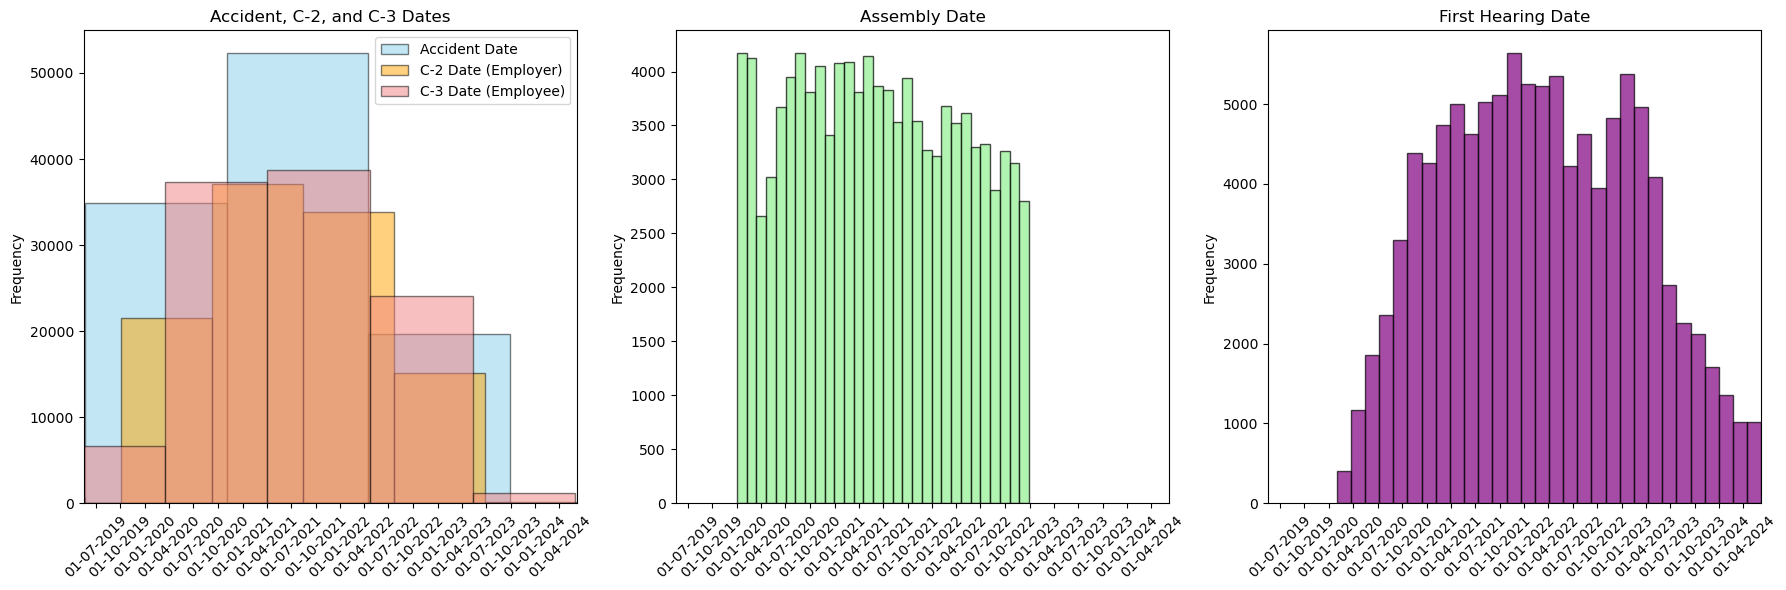

In [64]:
# Calculate the 1st percentile for the 'Accident Date' to set a lower x-axis limit
p01_accident_date = df_cleaned['Accident Date'].quantile(0.01)

fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharex=True)

# Plot 'Accident Date', 'C-2 Date', and 'C-3 Date' 
axs[0].hist(df_cleaned['Accident Date'], bins=30, color='skyblue', alpha=0.5, label='Accident Date', edgecolor='black')
axs[0].hist(df_cleaned['C-2 Date'], bins=30, color='orange', alpha=0.5, label='C-2 Date (Employer)', edgecolor='black')
axs[0].hist(df_cleaned['C-3 Date'], bins=30, color='lightcoral', alpha=0.5, label='C-3 Date (Employee)', edgecolor='black')
axs[0].set_title('Accident, C-2, and C-3 Dates')
axs[0].set_ylabel('Frequency')
axs[0].legend()

# Plot 'Assembly Date'
axs[1].hist(df_cleaned['Assembly Date'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
axs[1].set_title('Assembly Date')
axs[1].set_ylabel('Frequency')

# Plot 'First Hearing Date' 
axs[2].hist(df_cleaned['First Hearing Date'], bins=30, color='purple', edgecolor='black', alpha=0.7)
axs[2].set_title('First Hearing Date')
axs[2].set_ylabel('Frequency')

# Set the x-axis limit for all subplots to start from the 1st percentile of 'Accident Date' up to the latest 'First Hearing Date'
for ax in axs:
    ax.set_xlim(p01_accident_date, df_cleaned['First Hearing Date'].max())

# Configure date formatting for the x-axis labels 
date_format = mdates.DateFormatter("%d-%m-%Y")
for ax in axs:
    ax.xaxis.set_major_formatter(date_format)  
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  
    ax.tick_params(axis='x', rotation=45) 

plt.tight_layout()

plt.show()

- The left chart that represents Accident, C-2, and C-3 Dates shows the frequency distributions for the accident date and the dates of the C-2 and C-3 forms. Most accidents and form submissions occur between 2020 and 2022 (which makes sense since it is our assembly period). The closeness of the C-2 and C-3 dates indicates that employer and employee actions happen almost simultaneously, which makes sense as both forms relate to the same incident. <br>

- The chart in the middle (Assembly Date) shows the frequency of claim assemblies over time. There’s a fairly consistent distribution of assemblies from 2020 to 2022, with a subtle decline towards the end. This suggests that the assemblies remained stable over the years, except for a minor reduction more recently, that could be due to less reported incidents or administrative changes.

- The right chart (First Hearing Date) shows the distribution of first hearing dates. It shows an approximately symmetrical pattern, with a frequency peak around mid-2021. The distribution is bell shaped and it suggests that the average time for the first hearing was stable, with the majority of hearings occurring in the central period.





### **2.2.2** Date Differences

In [65]:
# Create a new DataFrame with time differences (in days) between key dates for each claim
date_differences = pd.DataFrame({
    'Claim': df_cleaned['Claim Identifier'],
    'Accident to C2': (df_cleaned['C-2 Date'] - df_cleaned['Accident Date']).dt.days,
    'Accident to C3': (df_cleaned['C-3 Date'] - df_cleaned['Accident Date']).dt.days,
    'Accident to First Hearing': (df_cleaned['First Hearing Date'] - df_cleaned['Accident Date']).dt.days,
    'Accident to Assembly': (df_cleaned['Assembly Date'] - df_cleaned['Accident Date']).dt.days,
    'C2 to C3': (df_cleaned['C-3 Date'] - df_cleaned['C-2 Date']).dt.days,
    'C3 to Assembly': (df_cleaned['Assembly Date'] - df_cleaned['C-3 Date']).dt.days,
    'C2 to Assembly': (df_cleaned['Assembly Date'] - df_cleaned['C-2 Date']).dt.days,
    'C3 to First Hearing': (df_cleaned['First Hearing Date'] - df_cleaned['C-3 Date']).dt.days,
    'Assembly to First Hearing': (df_cleaned['First Hearing Date'] - df_cleaned['Assembly Date']).dt.days
})

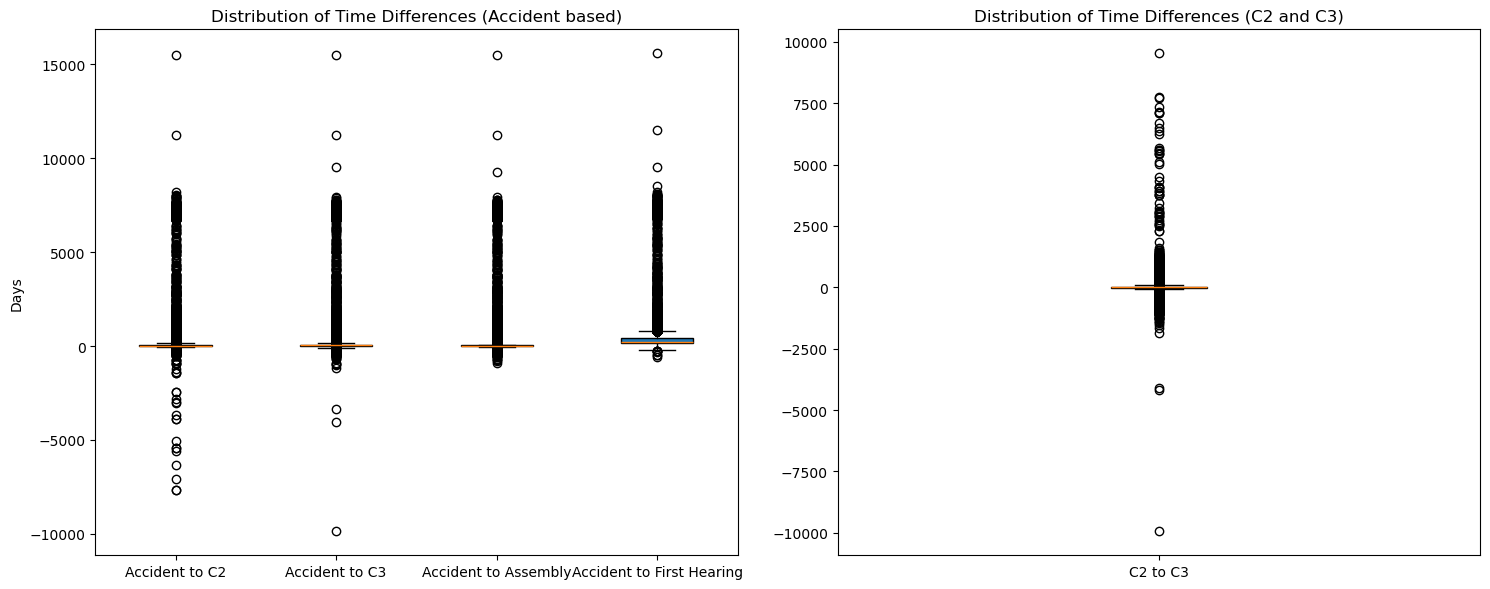

In [66]:
# Time differences based on the accident date
data1 = [
    date_differences['Accident to C2'], 
    date_differences['Accident to C3'], 
    date_differences['Accident to Assembly'], 
    date_differences['Accident to First Hearing'], 
]

# Time differences from C2 to C3
data2 = [
    date_differences['C2 to C3'],
]

# Time differences for C2 and C3 to Assembly
data3 = [
    date_differences.loc[date_differences['C2 to C3'] >= 0, 'C3 to Assembly'],
    date_differences.loc[date_differences['C2 to C3'] >= 0, 'C2 to Assembly']
]

# Time differences for C2 and C3 to Assembly
data4 = [
    date_differences.loc[date_differences['C2 to C3'] < 0, 'C3 to Assembly'],
    date_differences.loc[date_differences['C2 to C3'] < 0, 'C2 to Assembly']
]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].boxplot(data1, patch_artist=True, labels=['Accident to C2', 'Accident to C3', 'Accident to Assembly', 'Accident to First Hearing'])
axes[0].set_ylabel('Days')
axes[0].set_title('Distribution of Time Differences (Accident based)')

axes[1].boxplot(data2, patch_artist=True, labels=['C2 to C3'])
axes[1].set_title('Distribution of Time Differences (C2 and C3)')

plt.tight_layout()

plt.show()

### **2.2.3** Relationships between the dates

#### **2.2.3.1** Relationships between Accident Date and the other dates

In [67]:
columns = ['Accident to C2', 'Accident to C3', 'Accident to Assembly', 'Accident to First Hearing']

# Loop through each column, calculate and print the number and percentage of invalid claims
for column in columns:
    invalid_count, total_claims = invalid_claims(date_differences, column)
    print(f"{column} is negative: {invalid_count} ({invalid_count / total_claims * 100:.2f}%)")

# Check for rows where all time differences are negative
all_negative_claims = (
    (date_differences['Accident to C2'] < 0) &
    (date_differences['Accident to C3'] < 0) &
    (date_differences['Accident to Assembly'] < 0) &
    (date_differences['Accident to First Hearing'] < 0)
)

all_negative_claims_count = all_negative_claims.sum()

total_claims = date_differences.shape[0]

print(f"Number of claims where all time differences are negative: {all_negative_claims_count} ({all_negative_claims_count / total_claims * 100:.2f}%)")

Accident to C2 is negative: 686 (0.64%)
Accident to C3 is negative: 1183 (1.10%)
Accident to Assembly is negative: 1116 (1.03%)
Accident to First Hearing is negative: 70 (0.06%)
Number of claims where all time differences are negative: 66 (0.06%)


A negative difference in this case implies that an event that should occur later (as receiveing the reporting accident forms) appears to have happened before the accident, which is logically inconsistent.
These records, especially those with all negative differences, will probably be excluded.

#### **2.2.3.2** Relatioships between Assembly Date with C2 and C3 

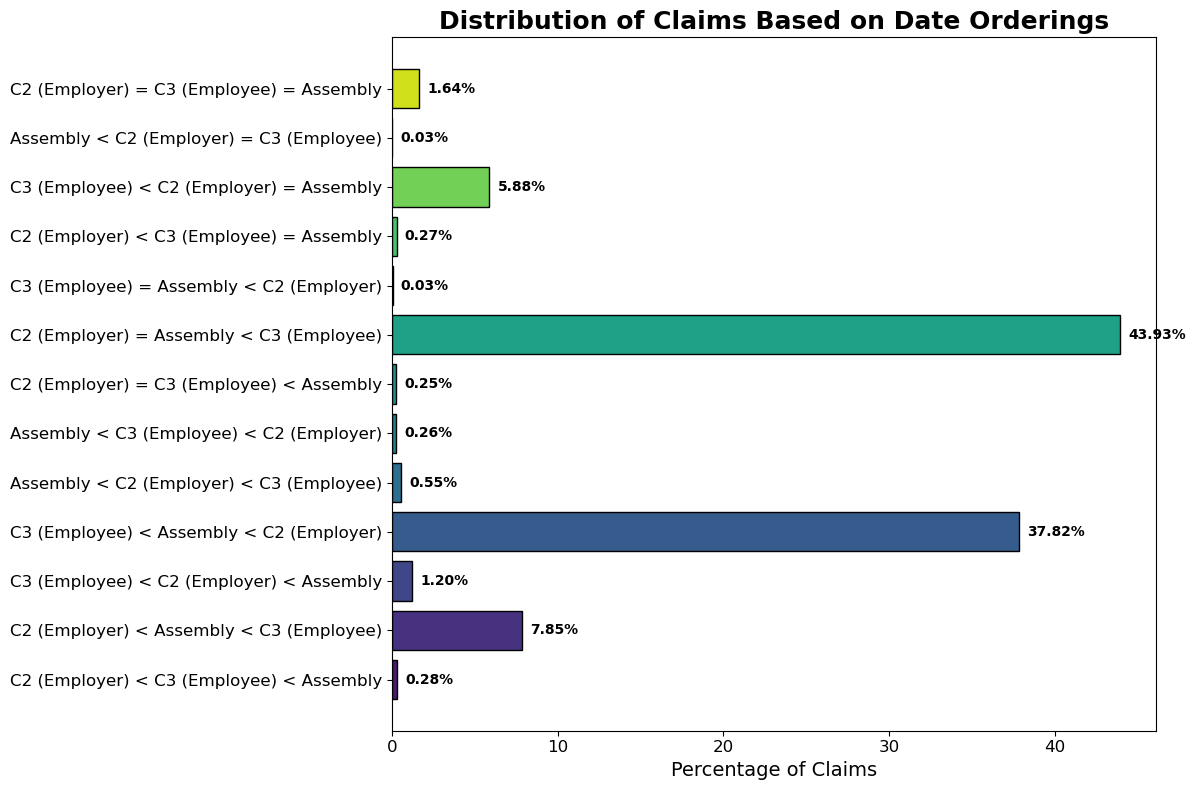

In [68]:
# Define conditions for all 13 possible combinations of date orderings among 'C-2 Date', 'C-3 Date', and 'Assembly Date'
conditions = {
    'C2 (Employer) < C3 (Employee) < Assembly': (df_cleaned['C-2 Date'] < df_cleaned['C-3 Date']) & (df_cleaned['C-3 Date'] < df_cleaned['Assembly Date']),
    'C2 (Employer) < Assembly < C3 (Employee)': (df_cleaned['C-2 Date'] < df_cleaned['Assembly Date']) & (df_cleaned['Assembly Date'] < df_cleaned['C-3 Date']),
    'C3 (Employee) < C2 (Employer) < Assembly': (df_cleaned['C-3 Date'] < df_cleaned['C-2 Date']) & (df_cleaned['C-2 Date'] < df_cleaned['Assembly Date']),
    'C3 (Employee) < Assembly < C2 (Employer)': (df_cleaned['C-3 Date'] < df_cleaned['Assembly Date']) & (df_cleaned['Assembly Date'] < df_cleaned['C-2 Date']),
    'Assembly < C2 (Employer) < C3 (Employee)': (df_cleaned['Assembly Date'] < df_cleaned['C-2 Date']) & (df_cleaned['C-2 Date'] < df_cleaned['C-3 Date']),
    'Assembly < C3 (Employee) < C2 (Employer)': (df_cleaned['Assembly Date'] < df_cleaned['C-3 Date']) & (df_cleaned['C-3 Date'] < df_cleaned['C-2 Date']),
    'C2 (Employer) = C3 (Employee) < Assembly': (df_cleaned['C-2 Date'] == df_cleaned['C-3 Date']) & (df_cleaned['C-3 Date'] < df_cleaned['Assembly Date']),
    'C2 (Employer) = Assembly < C3 (Employee)': (df_cleaned['C-2 Date'] == df_cleaned['Assembly Date']) & (df_cleaned['Assembly Date'] < df_cleaned['C-3 Date']),
    'C3 (Employee) = Assembly < C2 (Employer)': (df_cleaned['C-3 Date'] == df_cleaned['Assembly Date']) & (df_cleaned['Assembly Date'] < df_cleaned['C-2 Date']),
    'C2 (Employer) < C3 (Employee) = Assembly': (df_cleaned['C-2 Date'] < df_cleaned['C-3 Date']) & (df_cleaned['C-3 Date'] == df_cleaned['Assembly Date']),
    'C3 (Employee) < C2 (Employer) = Assembly': (df_cleaned['C-3 Date'] < df_cleaned['C-2 Date']) & (df_cleaned['C-2 Date'] == df_cleaned['Assembly Date']),
    'Assembly < C2 (Employer) = C3 (Employee)': (df_cleaned['Assembly Date'] < df_cleaned['C-2 Date']) & (df_cleaned['C-2 Date'] == df_cleaned['C-3 Date']),
    'C2 (Employer) = C3 (Employee) = Assembly': (df_cleaned['C-2 Date'] == df_cleaned['C-3 Date']) & (df_cleaned['C-3 Date'] == df_cleaned['Assembly Date'])
}

total_claims = df_cleaned.shape[0]

# Percentage of claims for each date ordering condition
order_percentages = {order: (df_cleaned.loc[condition].shape[0] / total_claims) * 100 for order, condition in conditions.items()}

labels = list(order_percentages.keys())
values = list(order_percentages.values())

# Define viridis colormap for the bars
viridis_colors = sns.color_palette("viridis", len(conditions))

fig, ax = plt.subplots(figsize=(12, 8))

# Bar plot using viridis colors
ax.barh(labels, values, color=viridis_colors, edgecolor='black')

# Add percentage labels to each bar
for i, v in enumerate(values):
    ax.text(v + 0.5, i, f'{v:.2f}%', va='center', color='black', fontweight='bold')

# Labeling and title
ax.set_xlabel('Percentage of Claims', fontsize=14)
ax.set_title('Distribution of Claims Based on Date Orderings', fontsize=18, fontweight='bold')
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)

plt.tight_layout()

plt.show()


The  "C2 (Employer) = Assembly < C3 (Employee)" is the most frequent, occurring in 43.93% of cases. This suggests that, in almost half of the claims, the C-2 date is the same as the assembly date, and both happen before the C-3 date.

The second most frequent is "C3 (Employee) < Assembly < C2 (Employer)", which represents 37.82% of cases.  C-3 (employee reports) happens first, followed by the assembly, and C-2 (employer reports) occurs last.

This means that Assembly if often triggered by the receival of one of these forms, which is a useful information especially in feature engineering. 

#### **2.2.3.3** Relationships between First Hearing Date and C2 and C3

In [ ]:
# Time difference between First Hearing and C3 (C2 <= Assembly < C3)
filtered_data1 = df_cleaned[
    (df_cleaned['C-2 Date'] <= df_cleaned['Assembly Date']) &
    (df_cleaned['Assembly Date'] < df_cleaned['C-3 Date'])
]
filtered_data1['First Hearing to C3'] = (filtered_data1['First Hearing Date'] - filtered_data1['C-3 Date']).dt.days

# Time difference between First Hearing and C2 (C3 <= Assembly <= C2)
filtered_data2 = df_cleaned[
    (df_cleaned['C-3 Date'] <= df_cleaned['Assembly Date']) &
    (df_cleaned['Assembly Date'] <= df_cleaned['C-2 Date'])
]
filtered_data2['First Hearing to C2'] = (filtered_data2['First Hearing Date'] - filtered_data2['C-2 Date']).dt.days

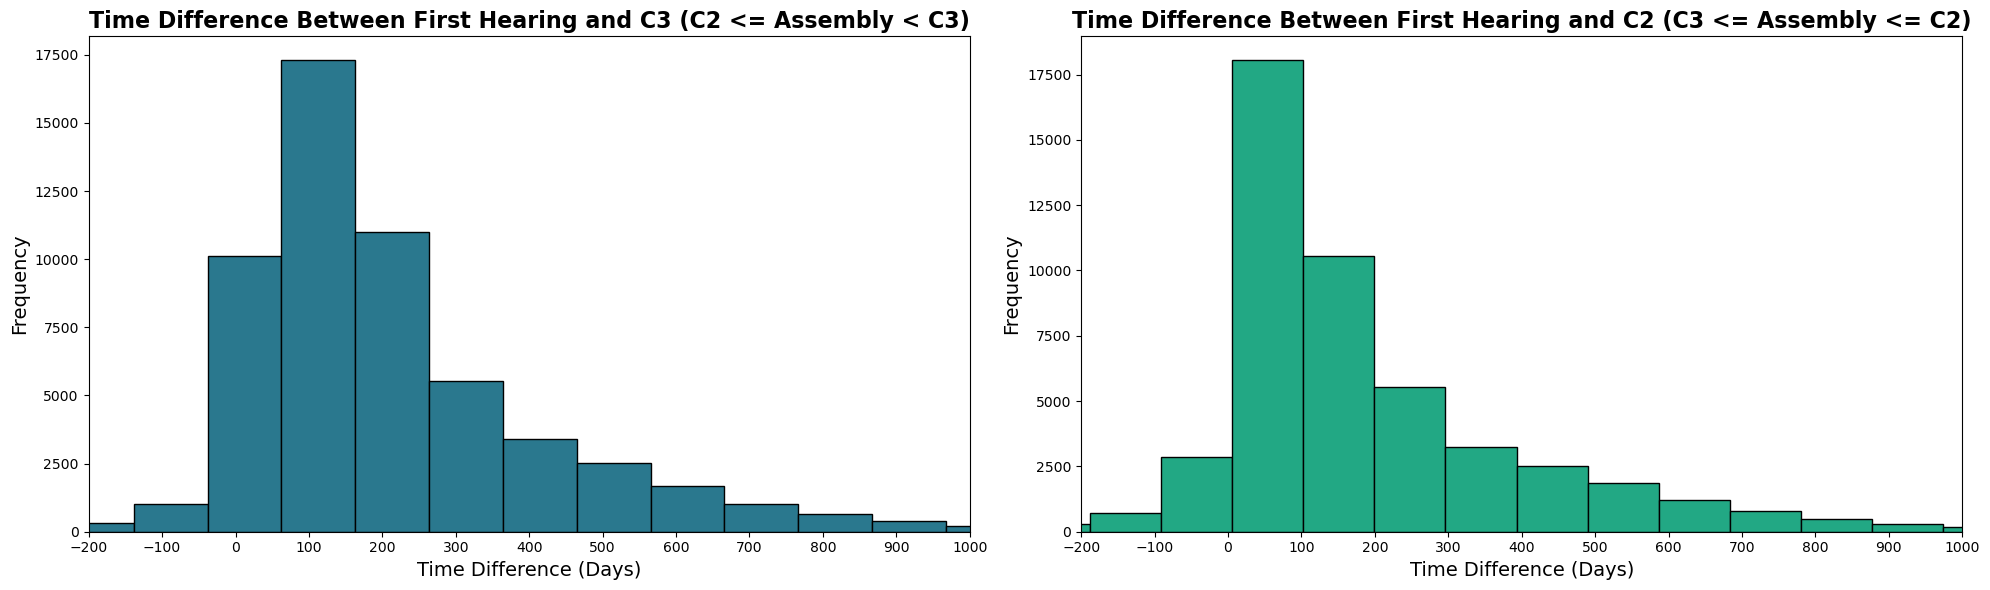

In [119]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

#  Histogram of First Hearing to C3
ax1.hist(filtered_data1['First Hearing to C3'].dropna(), bins=30, color=plt.cm.viridis(0.4), edgecolor='black')
ax1.set_title('Time Difference Between First Hearing and C3 (C2 <= Assembly < C3)', fontsize=16, fontweight='bold')
ax1.set_xlabel('Time Difference (Days)', fontsize=14)
ax1.set_ylabel('Frequency', fontsize=14)
ax1.set_xlim(-200, 1000)
ax1.set_xticks(np.arange(-200, 1001, 100))

# Histogram of First Hearing to C2
ax2.hist(filtered_data2['First Hearing to C2'].dropna(), bins=30, color=plt.cm.viridis(0.6), edgecolor='black')
ax2.set_title('Time Difference Between First Hearing and C2 (C3 <= Assembly <= C2)', fontsize=16, fontweight='bold')
ax2.set_xlabel('Time Difference (Days)', fontsize=14)
ax2.set_ylabel('Frequency', fontsize=14)
ax2.set_xlim(-200, 1000)
ax2.set_xticks(np.arange(-200, 1001, 100))

plt.tight_layout()

plt.show()

In [70]:
df[(df['First Hearing Date'] < df['C-2 Date']) & (df['First Hearing Date'] < df['C-3 Date'])]

Accident Date  Age at Injury Alternative Dispute Resolution  \
60753     2020-01-31           28.0                              N   
63885     2019-12-04           34.0                              N   
79256     2020-02-13           28.0                              N   
79783     2020-01-11           32.0                              N   
85654     2020-02-27           57.0                              N   
111136    2020-04-08           60.0                              N   
120281    2020-08-10           52.0                              N   
142425    2020-07-06           38.0                              N   
149046    2020-08-26           43.0                              N   
154764    2020-05-02           55.0                              N   
283268    2021-02-25           63.0                              N   
295296    2021-05-24           57.0                              N   
344084    2021-09-13           42.0                              N   
365209    2021-10-29           40.0                              N   
413689    2021-07-22           28.0                              N   
485014    2022-06-14           38.0                              N   
490155    2001-09-11           42.0                              N   
539512    2022-09-07           34.0                              N   
543634    2022-09-12           20.0                              N   
578350    2022-09-01           53.0                              N   

       Assembly Date Attorney/Representative  Average Weekly Wage  Birth Year  \
60753     2020-04-28                       Y              1178.71      1992.0   
63885     2020-05-05                       Y                 0.00      1985.0   
79256     2020-06-10                       Y              1228.01      1991.0   
79783     2020-06-11                       Y               850.00      1987.0   
85654     2020-06-25                       Y              2387.54      1962.0   
111136    2020-08-14                       Y                 0.00      1960.0   
120281    2020-09-01                       Y              1461.00      1968.0   
142425    2020-10-14                       Y               847.80      1982.0   
149046    2020-10-27                       Y                 0.00      1976.0   
154764    2020-11-06                       Y               517.78      1964.0   
283268    2021-07-06                       Y               801.08      1958.0   
295296    2021-07-28                       Y                  NaN      1963.0   
344084    2021-10-20                       Y               850.00      1978.0   
365209    2021-11-29                       Y               580.00      1981.0   
413689    2022-02-24                       Y               950.00      1993.0   
485014    2022-06-24                       Y              1000.00      1983.0   
490155    2022-07-06                       N                  NaN      1958.0   
539512    2022-09-27                       Y              1000.00      1987.0   
543634    2022-10-04                       Y              1000.00      2002.0   
578350    2022-12-02                       Y                 0.00      1969.0   

         C-2 Date   C-3 Date                   Carrier Name     Carrier Type  \
60753  2020-12-17 2020-10-28       POLICE, FIRE, SANITATION  3A. SELF PUBLIC   
63885  2022-02-11 2023-05-25  TRI-STATE INS CO OF MINNESOTA      1A. PRIVATE   
79256  2021-08-12 2021-01-06       POLICE, FIRE, SANITATION  3A. SELF PUBLIC   
79783  2021-06-14 2021-01-29       POLICE, FIRE, SANITATION  3A. SELF PUBLIC   
85654  2020-12-22 2020-11-22       POLICE, FIRE, SANITATION  3A. SELF PUBLIC   
111136 2020-12-24 2020-12-11    SOMPO AMERICA FIRE & MARINE      1A. PRIVATE   
120281 2021-03-06 2021-02-08   CNY OTHER THAN ED, HED WATER  3A. SELF PUBLIC   
142425 2021-04-07 2021-04-15        HEALTH & HOSPITAL CORP.  3A. SELF PUBLIC   
149046 2021-05-18 2021-01-13    ARCH INDEMNITY INSURANCE CO      1A. PRIVATE   
154764 2021-03-20 2021-02-01  SAFE

The histogram on the left represents the difference between the First Hearing Date and the C-3 date for claims where the C-2 date is less than or equal to the assembly date and C-3 date. The distribution indicates that, in most cases, the first hearing occurs about 100 days after employee report.

The histogram on the right shows the  difference between the first hearing date and the C-2 date for claims where C-2 was the last form to be received. The  peak is also around 100 days, which means that the first hearing is typically scheduled about 100 days after C-2 form receival. 

Negative values on both histograms indicates potential inconsistencies in the data, since it implies that the First Hearing Date occurred before receival of one of the forms (either employee or employer). Since only 20 observations meet this possible inconsistency and they all seem correctly filled out we will keep these observations

#### **2.2.3.4** Relationship between First Hearing Date and Assembly Date

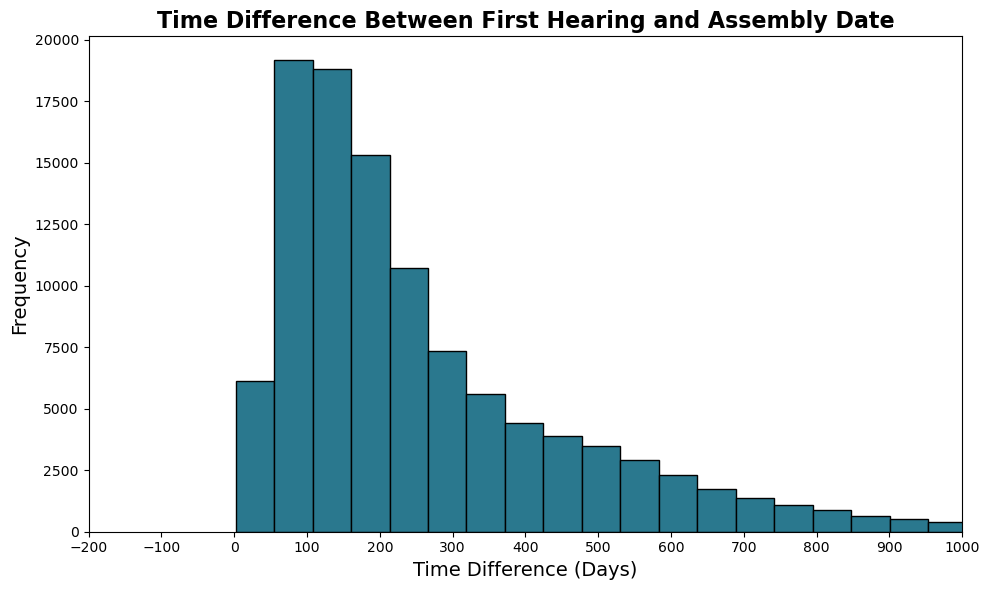

In [120]:
# Time difference between 'Assembly' and 'First Hearing' using a histogram
plt.figure(figsize=(10, 6))
plt.hist(date_differences['Assembly to First Hearing'].dropna(), bins=30, color=plt.cm.viridis(0.4), edgecolor='black')


plt.title('Time Difference Between First Hearing and Assembly Date', fontsize=16, fontweight='bold')
plt.xlabel('Time Difference (Days)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.xlim(-200, 1000)  
plt.xticks(np.arange(-200, 1001, 100))  

plt.tight_layout()

plt.show()

The peak around 100 days indicates that in the majority of cases the first hearing occurs approximately 100 days after the assembly date. This is consistent with previous information and suggests a usual processing time from when the claim is initially assembled to when it reaches its first hearing. 

The distribution is skewed to the right,so we can say that while most claims reach a first hearing within a few months, some claims take significantly longer.

#### **2.2.3.5** Anomalous Claims

In [89]:
# Percentage of rows where 'Accident Date' is after any of the specified date columns
percentage_accident_after = (
    df[
        (df['Accident Date'] > df['C-2 Date']) |
        (df['Accident Date'] > df['C-3 Date']) |
        (df['Accident Date'] > df['Assembly Date']) |
        (df['Accident Date'] > df['First Hearing Date'])
    ].shape[0] / df.shape[0]
) * 100

percentage_accident_after

0.2963280408901339

In [ ]:
# Dropping claims where 'Accident Date' is after any of the specified date columns
df = df[~((df['Accident Date'] > df['C-2 Date']) |
    (df['Accident Date'] > df['C-3 Date']) |
    (df['Accident Date'] > df['Assembly Date']) |
    (df['Accident Date'] > df['First Hearing Date']))]

In [91]:
df.shape[0]

572325

## **2.3** Numerical Variables

| Numeric Variables                             | Type             | Analysis            |
|-----------------------------------------------|------------------|---------------------|
| Age at Injury                                 | float64          | Feature             |
| Average Weekly Wage                           | float64          | Feature             |
| Birth Year                                    | float64          | Feature             |
| IME-4 Count                                   | float64          | Feature             |
| Number of Dependents                          | float64          | Feature             | 

### **2.3.1** First adjustments and overview

In [92]:
numerical_variables = ['Age at Injury', 'Average Weekly Wage', 'Birth Year', 'IME-4 Count', 'Number of Dependents']

In [93]:
df[numerical_variables].describe().round(2)

Age at Injury  Average Weekly Wage  Birth Year  IME-4 Count  \
count      572325.00            543741.00   543333.00    131633.00   
mean           42.08               488.42     1886.83         3.21   
std            14.26              6101.62      414.57         2.84   
min             0.00                 0.00        0.00         1.00   
25%            31.00                 0.00     1965.00         1.00   
50%            42.00                 0.00     1977.00         2.00   
75%            54.00               836.23     1989.00         4.00   
max           117.00           2828079.00     2018.00        73.00   

       Number of Dependents  
count             572325.00  
mean                   3.01  
std                    2.00  
min                    0.00  
25%                    1.00  
50%                    3.00  
75%                    5.00  
max                    6.00

In [94]:
# Looping through each numerical variable and printing its statistics
for col in numerical_variables:
    print(f"Statistics for {col}:")
    stats = numerical_statistics(df, col)
    for stat, value in stats.items():
        print(f"{stat}: {value}")
    print("\n")

Statistics for Age at Injury:
Minimum Value: 0.0
Maximum Value: 117.0
Range: 117.0
Number of Records: 572325
Number of Missing Values: 0
Missing Values (%): 0.00%
Distinct Values: 108
Mean: 42.08354693574455
Median: 42.0
Standard Deviation: 14.26
Most Frequent Value: 31.0


Statistics for Average Weekly Wage:
Minimum Value: 0.0
Maximum Value: 2828079.0
Range: 2828079.0
Number of Records: 543741
Number of Missing Values: 28584
Missing Values (%): 4.99%
Distinct Values: 119529
Mean: 488.4236364923742
Median: 0.0
Standard Deviation: 6101.62
Most Frequent Value: 0.0


Statistics for Birth Year:
Minimum Value: 0.0
Maximum Value: 2018.0
Range: 2018.0
Number of Records: 543333
Number of Missing Values: 28992
Missing Values (%): 5.07%
Distinct Values: 107
Mean: 1886.8293937603644
Median: 1977.0
Standard Deviation: 414.57
Most Frequent Value: 0.0


Statistics for IME-4 Count:
Minimum Value: 1.0
Maximum Value: 73.0
Range: 72.0
Number of Records: 131633
Number of Missing Values: 440692
Missing Va

In [95]:
print(f"Age at Injury = 0: {(df['Age at Injury'] == 0).sum() / df.shape[0]:.2%}")
print(f"Birth Year = 0: {(df['Birth Year'] == 0).sum() / df.shape[0]:.2%}")

Age at Injury = 0: 0.95%
Birth Year = 0: 4.37%


Based on the analysis, we observed that 0.95% of the dataset has an **Age at Injury** value of 0, and 4.37% has a **Birth Year** value of 0. These values are not logically valid in the context of this analysis, as an age or birth year of 0 is unrealistic. Therefore, we will replace these 0 values with NaN to accurately represent them as missing data and handle them appropriately in further analysis.

In [96]:
columns_of_interest = ['Age at Injury', 'Birth Year']
df = replace_zeros_with_nan(df, columns_of_interest)

In [97]:
for col in columns_of_interest:
    print(f"Statistics for {col}:")
    
    stats = numerical_statistics(df, col)
    
    for stat, value in stats.items():
        print(f"{stat}: {value}")
    
    print("\n")

Statistics for Age at Injury:
Minimum Value: 1.0
Maximum Value: 117.0
Range: 116.0
Number of Records: 566861
Number of Missing Values: 5464
Missing Values (%): 0.95%
Distinct Values: 107
Mean: 42.48919223583912
Median: 42.0
Standard Deviation: 13.71
Most Frequent Value: 31.0


Statistics for Birth Year:
Minimum Value: 1900.0
Maximum Value: 2018.0
Range: 118.0
Number of Records: 518336
Number of Missing Values: 53989
Missing Values (%): 9.43%
Distinct Values: 106
Mean: 1977.8226382115076
Median: 1978.0
Standard Deviation: 13.83
Most Frequent Value: 1990.0




In [98]:
(df['Average Weekly Wage'] == 0).sum()/df.shape[0]

0.5855571572096274

In [99]:
# Percentage of records where 'Age at Injury' is less than or equal to 16
print(f"Age at Injury <= 16: {(df['Age at Injury'] <= 16).sum() / df.shape[0]:.2%}")

Age at Injury <= 16: 0.14%


In [100]:
df = df[~(df['Age at Injury'] <= 16)]

In [101]:
df.shape[0]

571526

In the United States, the minimum legal working age is generally 16 years old, as set by the Fair Labor Standards Act (FLSA). However, we found that 0.14% of the claims in our dataset involve individuals younger than 16, which raises potential data accuracy concerns, so we decided to drop these observations.

### **2.3.2** Visual analysis

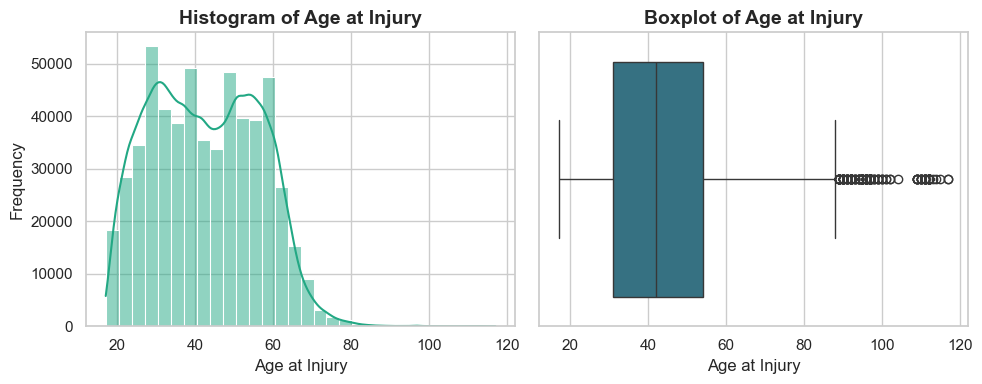

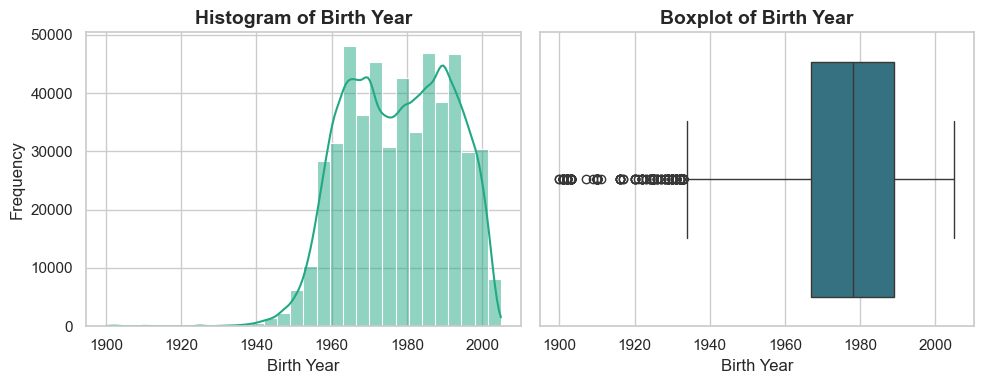

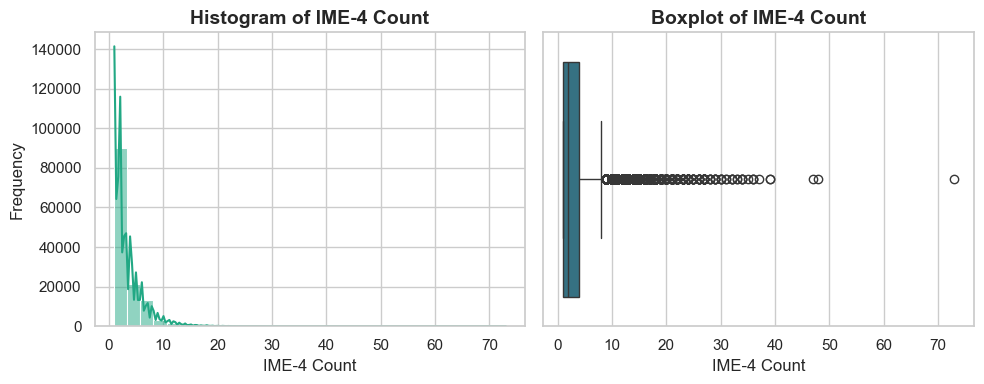

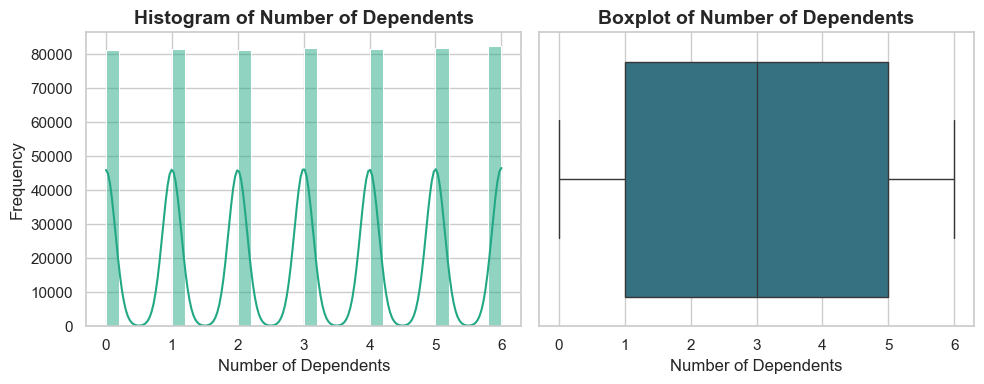

In [121]:
sns.set(style="whitegrid")

# Numerical variables of interest
numerical_variables_of_interest = [var for var in numerical_variables if var != 'Average Weekly Wage']

# Create histogram and boxplot for each of the numerical features
for variable in numerical_variables_of_interest:
    plt.figure(figsize=(10, 4))  
    
    #  Histogram 
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=variable, bins=30, kde=True, color=sns.color_palette("viridis", as_cmap=True)(0.6))
    plt.title(f'Histogram of {variable}', fontsize=14, fontweight='bold')
    plt.xlabel(variable, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    
    #  Boxplot 
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x=variable, color=sns.color_palette("viridis", as_cmap=True)(0.4))
    plt.title(f'Boxplot of {variable}', fontsize=14, fontweight='bold')
    plt.xlabel(variable, fontsize=12)
    
    plt.tight_layout()
    
    plt.show()

**Average Weekly Wage**

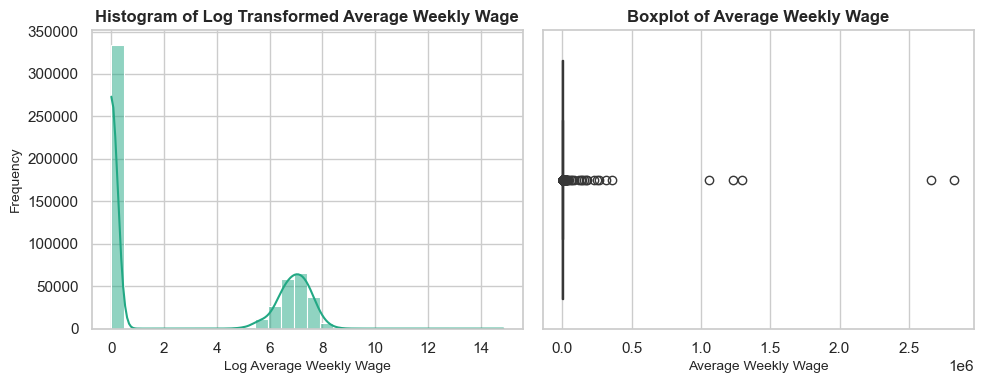

In [122]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Histogram of Log Transformed Average Weekly Wage
sns.histplot(np.log1p(df['Average Weekly Wage']), bins=30, kde=True, color=sns.color_palette("viridis", as_cmap=True)(0.6), ax=axes[0])
axes[0].set_title('Histogram of Log Transformed Average Weekly Wage', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Log Average Weekly Wage', fontsize=10)
axes[0].set_ylabel('Frequency', fontsize=10)

# Boxplot of Average Weekly Wage
sns.boxplot(data=df, x='Average Weekly Wage', color=sns.color_palette("viridis", as_cmap=True)(0.4), ax=axes[1])
axes[1].set_title('Boxplot of Average Weekly Wage', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Average Weekly Wage', fontsize=10)

plt.tight_layout()

plt.show()

**KEY STATISTICS FOR NUMERICAL VARIABLES**:
- **Age at injury**: The histogram shows an aproximate normal distribution, with most injured being between 20 and 70 years old, peaking around 40-50 years.
The box plot shows some outliers on the left tale, going above 80 and reaching 117. The minumum age of 0 is also not acceptable and we should filter cases that are below minimum legal working age. 75% of injured were 54 years old or less when the injury occurred, which is consistens with the working age. <br> <br>

- **Birth Year**: The histogram shows birth years varying from 1940 to 2000, which is consistent with a typical working age range.
The box plot shows some outliers on the left side, what would stand for elderly people, which might reflect old injury cases that are being revised or errors.  <br> <br>

- **IME-4 Count**: The histogram shows a highly right-skewed distribution, with most values below 10 and we have a long tail that goes up to 73.
The box plot indicates a significant number of outliers, that stand for cases with high IME-4 counts. We coul try to see if the amount of independet medical examinations is correlated with the target variable. The high count may be related to prolonged or complicated claims and that could impact compensation. We interpret missing values as absence of independent medical examination and we will replace them with 0 since we believe that this can impact the target. <br> <br>

- **Number of dependents**: The histogram shows a uniform distribution, suggesting that each value from 0 to 6 is equally likely, which is unusual for a variable like dependents. Further analysis will reveal if dependents impact the target variable, but we can't see what informative power this might have.<br> <br>


- **Average Weekly age**: This variable has extreme variance (very high standard deviation and outliers that reach 2,828,079). 
There are potential issues with this feature since it is ambiguous: probably was filled with wage per hour, wage per week and even annual salary. 
The presence of 0s up to the 50th percentile shows that a significant amount of entries may be missing values or workers with no weekly wage, which is odd.
We have a skewed distribution: many workers have low or zero reported wages, and a some individuals have exceptionally high wages. <br> <br>

## **2.4** Categorical Variables

| Categorical Variables                         | Type              |
|-----------------------------------------------|-------------------|
| Alternative Dispute Resolution                | object           |
| Attorney/Representative                       | object           |
| Carrier Name                                  | object            |
| Carrier Type                                  | object            |
| Claim Injury Type                             | object            |
| County of Injury                              | object            |
| COVID-19 Indicator                            | boolean           |
| District Name                                 | object            |
| Gender                                        | object            |
| Industry Code Description                     | object            |
| Medical Fee Region                            | object            |
| Industry Code                                 | float64           | 
| WCIO Cause of Injury Code                     | float64           | 
| WCIO Nature of Injury Code                    | float64           | 
| WCIO Part Of Body Code                        | float64           |
| WCIO Cause of Injury Description              | object            |
| WCIO Nature of Injury Description             | object            |
| WCIO Part Of Body Description                 | object            |
| Zip Code                                      | object            |

### **2.4.1** First adjustments and overview

In [ ]:
categorical_variables = ['Attorney/Representative','Carrier Name','Carrier Type', 'Claim Injury Type',
                            'County of Injury', 'COVID-19 Indicator', 'District Name', 'Gender', 'Industry Code Description', 'Medical Fee Region',
                            'Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'WCIO Cause of Injury Description',
                            'WCIO Nature of Injury Description', 'WCIO Part Of Body Description', 'Zip Code']

In [126]:
for column in categorical_variables:
    print(df[column].value_counts(), "\n", "\n") 

Attorney/Representative
N    391413
Y    180113
Name: count, dtype: int64 
 

Carrier Name
STATE INSURANCE FUND              110654
POLICE, FIRE, SANITATION           21542
AMERICAN ZURICH INSURANCE CO       17483
CHARTER OAK FIRE INS CO            17100
INDEMNITY INS. OF N AMERICA        14330
                                   ...  
EASTERN ALLIANCE INSUR COMPANY         1
NORTH WARREN CENTRAL SCHOOL            1
RYDER SYSTEM, INC.                     1
FRANKLINVILLE CENTRAL                  1
HERMON-DEKALB CENTRAL                  1
Name: count, Length: 2046, dtype: int64 
 

Carrier Type
1A. PRIVATE                                    284332
3A. SELF PUBLIC                                121107
2A. SIF                                        110654
4A. SELF PRIVATE                                52642
UNKNOWN                                          1769
5D. SPECIAL FUND - UNKNOWN                       1013
5C. SPECIAL FUND - POI CARRIER WCB MENANDS          5
5A. SPECIAL FUND - CONS

### **2.4.2** Histograms for categorical features

In [127]:
location_variables = ['County of Injury', 'District Name', 'Medical Fee Region', 'Zip Code']
description_variables = ['Industry Code Description', 'WCIO Cause of Injury Description', 'WCIO Nature of Injury Description', 'WCIO Part Of Body Description', 'Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code']
dispute_and_carrier = ['Alternative Dispute Resolution', 'Attorney/Representative', 'Carrier Name', 'Carrier Type']
other_variables = ['Claim Injury Type', 'COVID-19 Indicator', 'Gender']

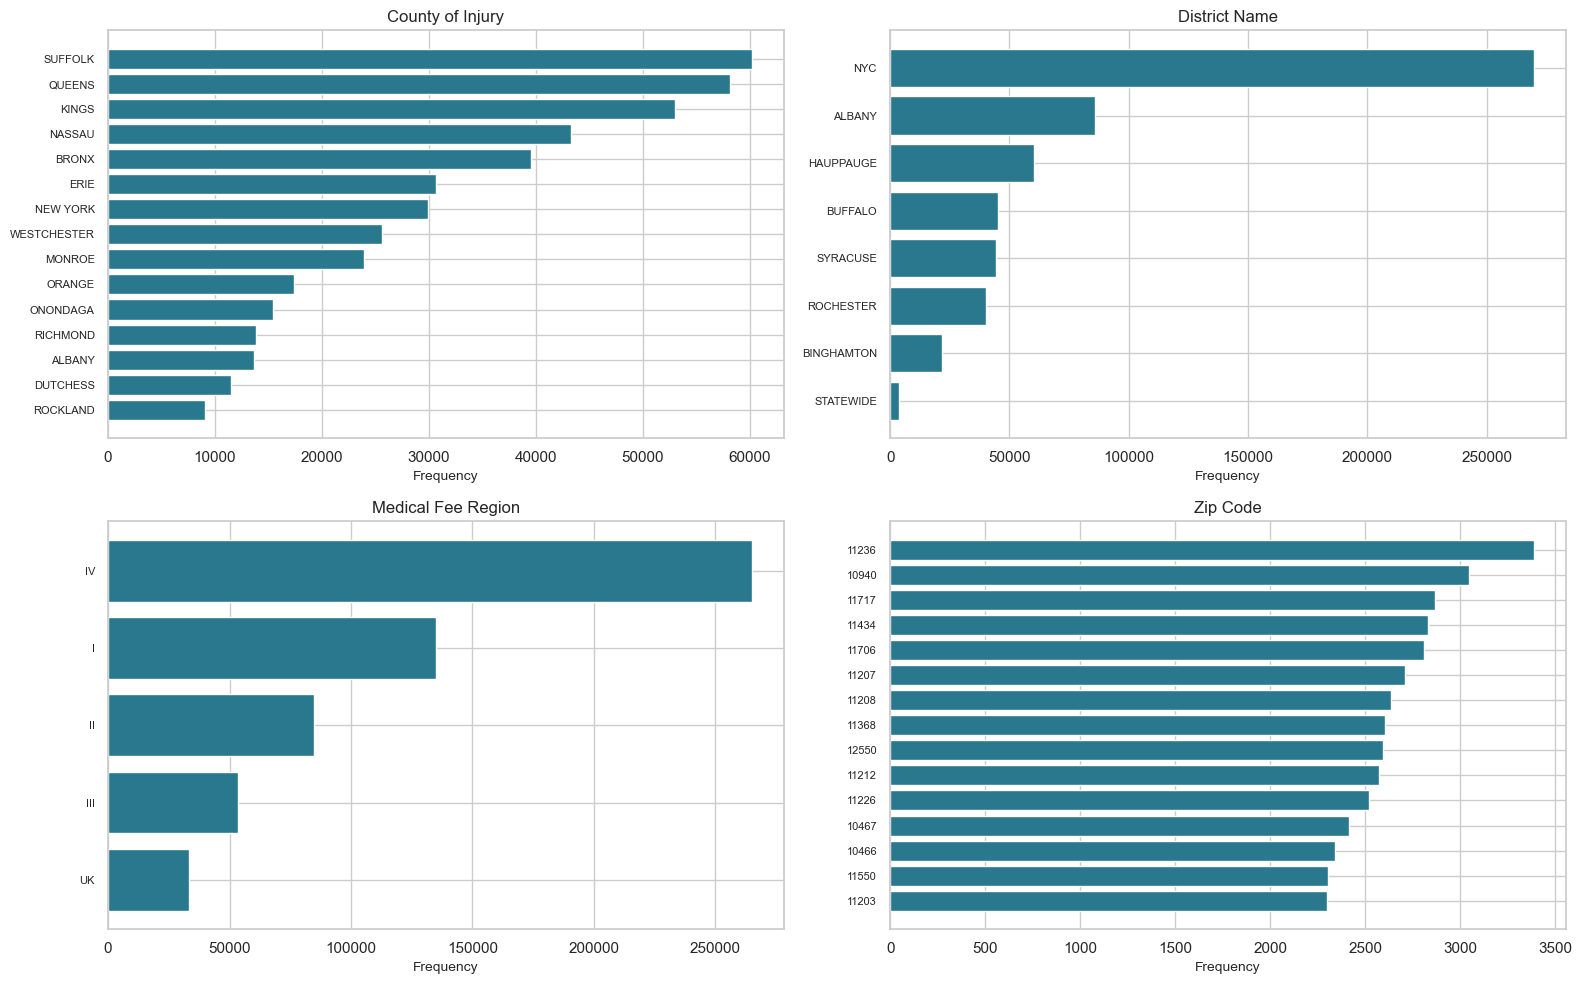

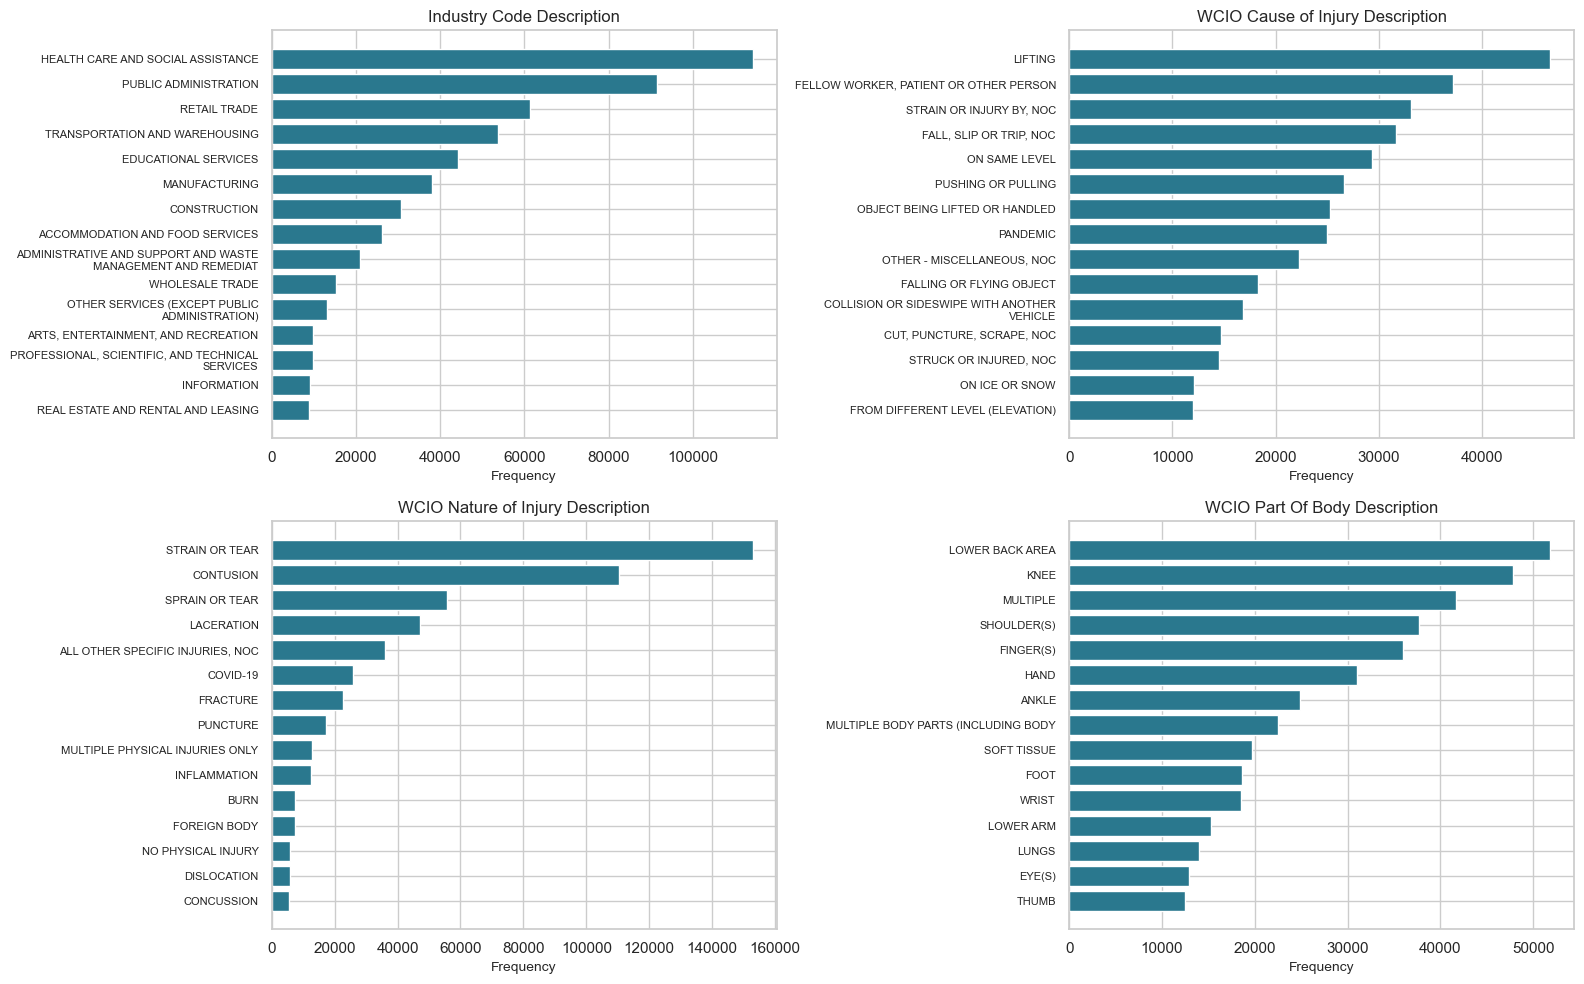

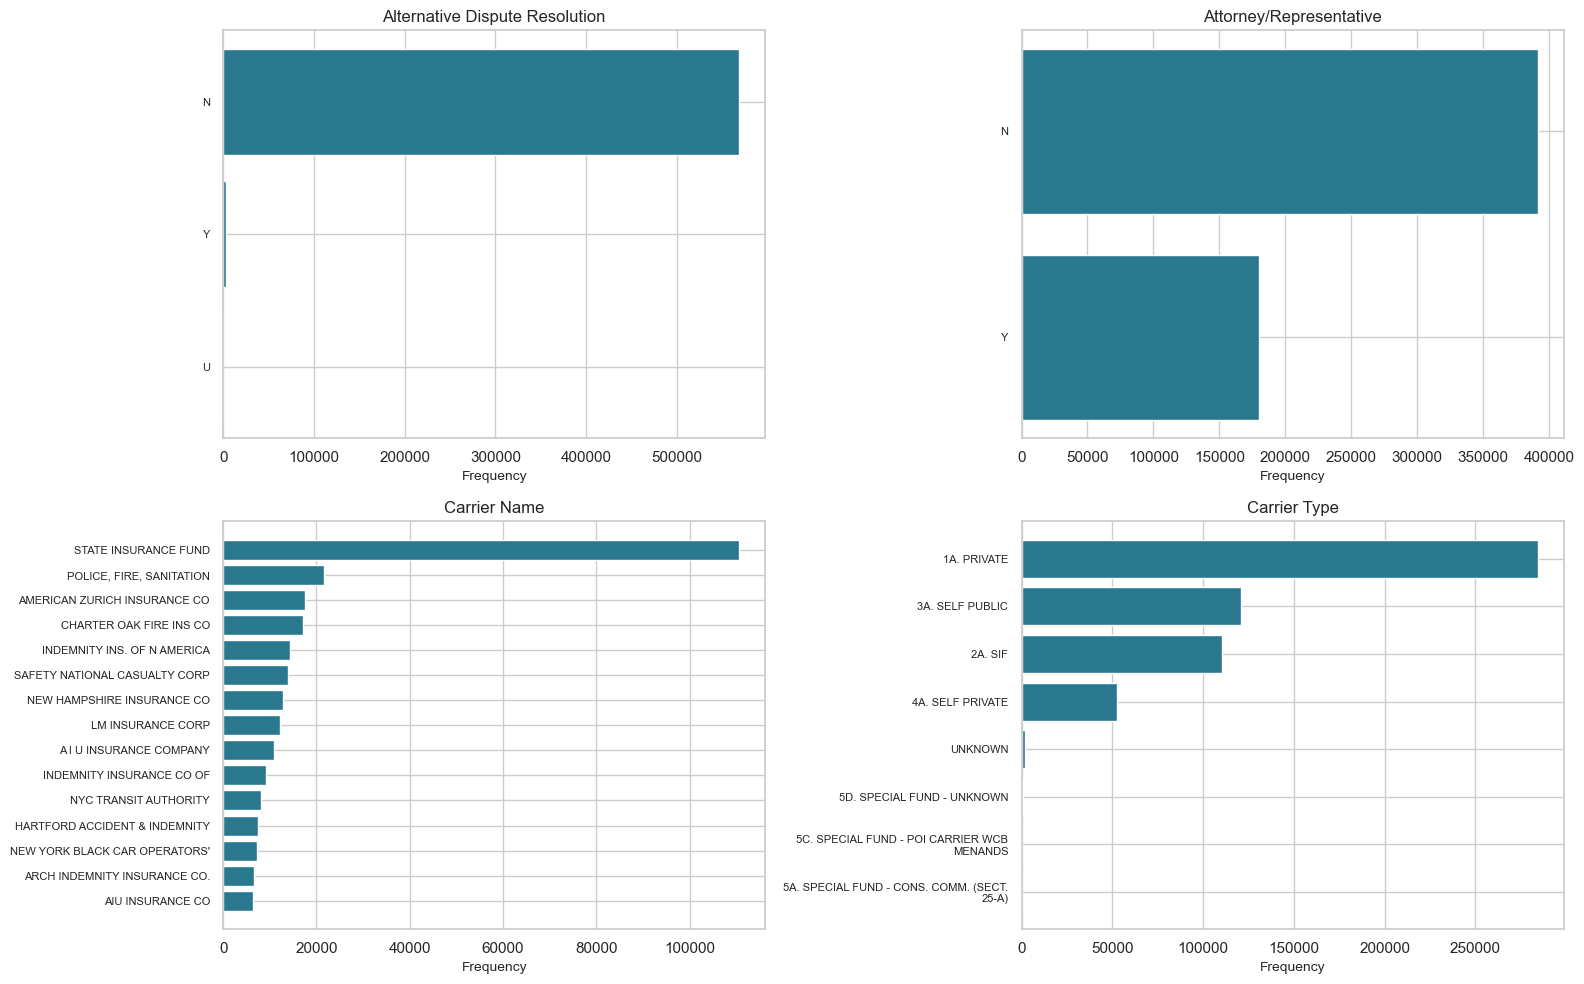

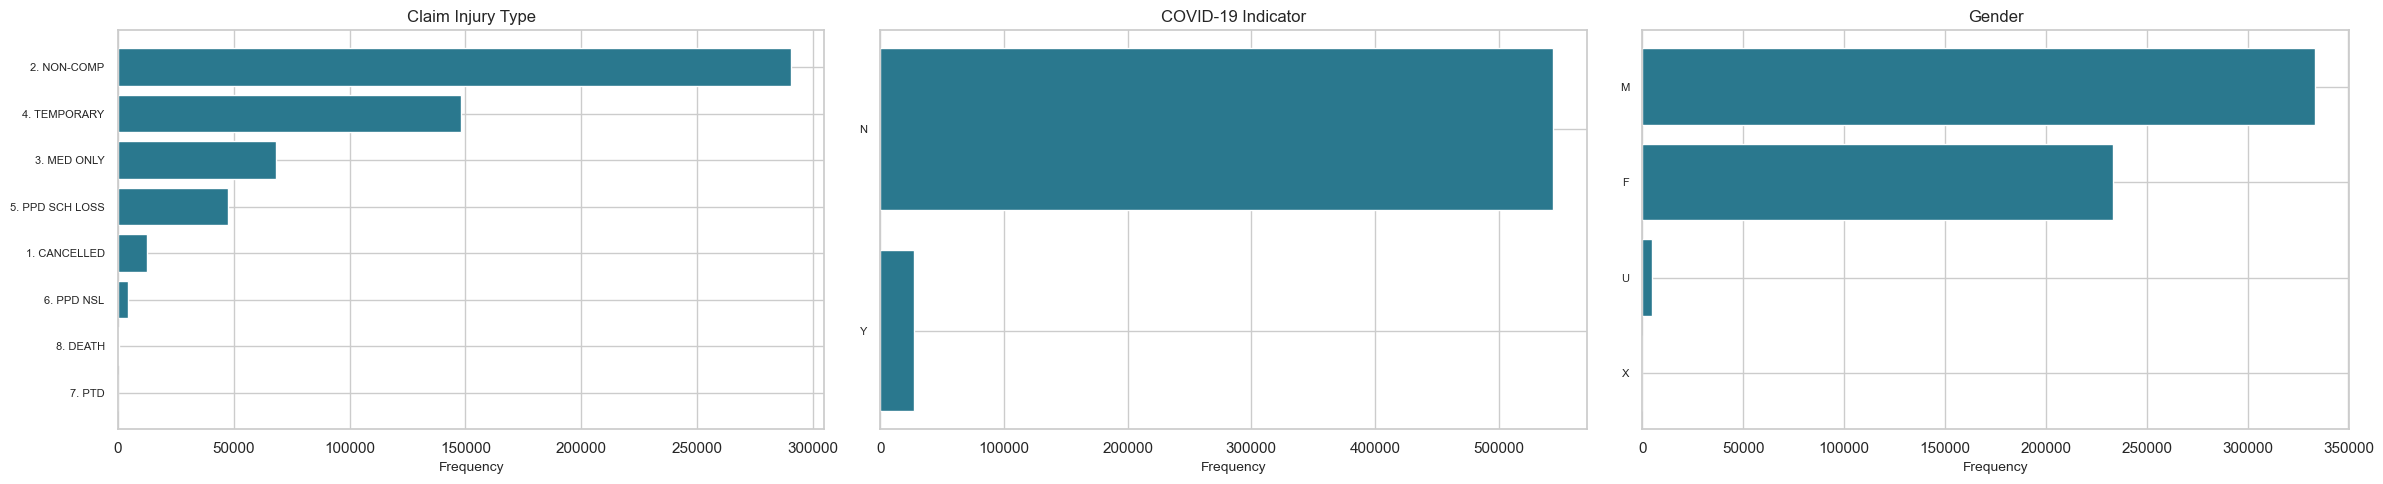

In [129]:
 # Plots that only shows the 15 most common values in the dataset
plot_top_histograms(df, location_variables, 15, 2, 2)
plot_top_histograms(df, description_variables, 15, 2, 2)
plot_top_histograms(df, dispute_and_carrier, 15, 2, 2)
plot_top_histograms(df, other_variables, 15, 1, 3)

**CATEGORICAL VARIABLES**:

- **County of Injury** and **District Name**: These charts highlight regions with the highest injury occurrences, such as **Suffolk**, **Queens**, **Kings**, **Bronx**, and the **NYC** district. High injury rates in these areas may reflect industries or environments with elevated risk, guiding preventive measures or adjustments to compensation policies.

- **Medical Fee Region**: Region **IV** records the most claims, followed by regions **I** and **II**. This variability in claims might reflect differences in medical costs or injury severity. For modeling, geographic regions are significant as they can influence both medical expenses and compensation outcomes.

- **Zip Code**: High-incident ZIP codes reveal localized patterns of workplace injuries. This information helps predict compensation trends and allocate resources effectively.

- **Industry Code Description**: Sectors such as **Health Care and Social Assistance**, **Public Administration**, and **Retail Trade** see the highest injury rates, reflecting tasks like patient handling, physical labor, or goods movement. These insights help refine the model to anticipate injury types or compensation levels for different industries.

- **WCIO Cause of Injury Description**: Common causes like **Lifting**, **Contact with Fellow Worker or Patient**, and **Strain by Physical Force** highlight activities leading to injuries. This data aids the model in predicting injury types based on job functions.

- **WCIO Nature of Injury Description** and **WCIO Part of Body Description**  
   - **Nature of Injury**: Frequent injuries include **Strains** and **Contusions**, indicating physical overuse or minor accidents.  
   - **Part of Body**: The **Lower Back**, **Knees**, and **Shoulders** are most affected, offering insights into workplace risk factors that can shape compensation decisions.

- **Alternative Dispute Resolution** and **Attorney/Representative**: Most cases don’t involve alternative dispute resolution or legal representation. Cases with attorneys may involve more complex claims, potentially impacting compensation and resolution timelines.

- **Carrier Name** and **Carrier Type**: The **State Insurance Fund** is the primary insurer, with **Private** carriers being the most common. This distribution affects how claims are processed and the approach to compensation.

- **Claim Injury Type**: **Non-Comp** injuries dominate, followed by **Temporary** and **Med Only**. As the target variable for the model, understanding these types is critical for accurate predictions.

- **COVID-19 Indicator**: Although most injuries are unrelated to COVID-19, a significant number are, particularly in sectors exposed to the pandemic. This factor influences injury types and compensation considerations.

- **Gender**: Men experience more injuries than women, reflecting sector-specific roles or task differences. This variable helps tailor the model to better predict injury trends for different worker profiles.


### **2.4.3.** Converting unknown values to missing

In [130]:
medical_fee_region_percentage = (df['Medical Fee Region'].value_counts() / df.shape[0]) * 100
gender_percentage = (df['Gender'].value_counts() / df.shape[0]) * 100
alternative_percentage = (df['Alternative Dispute Resolution'].value_counts() / df.shape[0]) * 100

print("Percentage distribution of 'Medical Fee Region':")
print(medical_fee_region_percentage.round(2).astype(str) + '%')
print("\nPercentage distribution of 'Gender':")
print(gender_percentage.round(2).astype(str) + '%')
print("\nPercentage distribution of 'Alternative Dispute Resolution':")
print(alternative_percentage.round(2).astype(str) + '%')

Percentage distribution of 'Medical Fee Region':
Medical Fee Region
IV     46.35%
I      23.65%
II     14.82%
III     9.35%
UK      5.83%
Name: count, dtype: object

Percentage distribution of 'Gender':
Gender
M    58.37%
F     40.8%
U     0.82%
X     0.01%
Name: count, dtype: object

Percentage distribution of 'Alternative Dispute Resolution':
Alternative Dispute Resolution
N    99.54%
Y     0.46%
U      0.0%
Name: count, dtype: object


Upon analysis, we noticed the following observations:
- The **Gender** column contains 0.8% of its values as 'U' and 0.01% of X, which will be replaced with NaN.
- The **Medical Fee Region** column has 5.8% of its values as 'UK', which will also be replaced with NaN.

In [131]:
df = replace_unknown_with_na(df, 'Medical Fee Region', 'UK')
df = replace_unknown_with_na(df, 'Gender', 'U')
df = replace_unknown_with_na(df, 'Gender', 'X')
df = replace_unknown_with_na(df, 'Alternative Dispute Resolution', 'U')
df = replace_unknown_with_na(df, 'Carrier Type', 'UNKNOWN')

### **2.4.4** Treating Zip Codes

In [132]:
df['Zip Code'].value_counts()

Zip Code
11236    3387
10940    3044
11717    2868
11434    2831
11706    2807
         ... 
46163       1
15133       1
24520       1
46201       1
07122       1
Name: count, Length: 8260, dtype: int64

In [133]:
# Check for invalid zip codes (strings or fewer than 3 characters)
is_text = df['Zip Code'].apply(lambda x: isinstance(x, str) and not x.replace('.', '', 1).isdigit())
below_3 = df['Zip Code'].apply(lambda x: pd.to_numeric(x, errors='coerce') < 10000 if str(x).isdigit() else False)

# Combine both conditions
invalid_zip_codes = is_text | below_3

# Calculate the proportion of invalid zip codes
proportion_invalid = invalid_zip_codes.sum() / df.shape[0]
proportion_invalid

0.03249895892750286

In [134]:
df = treat_zip_code(df)

In [135]:
df['Zip Code'].value_counts()

Zip Code
11236    3387
10940    3044
11717    2868
11434    2831
11706    2807
         ... 
33475       1
93291       1
76227       1
77031       1
71220       1
Name: count, Length: 8035, dtype: int64

### **2.4.5** Treating Carrier Type

In [136]:
df["Carrier Type"] = df["Carrier Type"].apply(lambda x: "5X SPECIAL FUND" if str(x).startswith("5") else x)

## **2.5** Multivariate Relationships

### **2.5.1.** Analysis of Location-Based Features

In [137]:
location_variables = ['District Name', 'County of Injury', 'Medical Fee Region', 'Zip Code']

In [138]:
location_data = pd.DataFrame(df[location_variables]).dropna()

#### **2.5.1.1** District Name ~ County of Injury

In [139]:
contingency_table_DN_CI = pd.crosstab(location_data['District Name'], location_data['County of Injury'])
contingency_table_DN_CI

County of Injury  ALBANY  ALLEGANY  BRONX  BROOME  CATTARAUGUS  CAYUGA  \
District Name                                                            
ALBANY             12533         0     79       2            0       3   
BINGHAMTON             2         4      2    6003            0     368   
BUFFALO                3       386      1       1         2549       0   
HAUPPAUGE              3         0     10       3            1       0   
NYC                   23         3  35337       6            0       4   
ROCHESTER              2      1202      2       2           34       2   
STATEWIDE              0         0    581       1            0       0   
SYRACUSE               6         0      1       3            1    3831   

County of Injury  CHAUTAUQUA  CHEMUNG  CHENANGO  CLINTON  COLUMBIA  CORTLAND  \
District Name                                                                  
ALBANY                     0        0         0     2825      2312         0   
BINGHAMTON                 0     3316      1453        0         0       588   
BUFFALO                 3668        1         0        0         0         0   
HAUPPAUGE                  1        0         2        1         0         0   
NYC                        1        1         1        0         4         1   
ROCHESTER                  3        2         0        2         0         1   
STATEWIDE                  0        0         0        0         0         0   
SYRACUSE                   1        2        28        1         0       136   

County of Injury  DELAWARE  DUTCHESS   ERIE  ESSEX  FRANKLIN  FULTON  GENESEE  \
District Name                                                                   
ALBANY                  65     10526      5   1030      1345    3178        1   
BINGHAMTON            1655         1      1      0         0       0        0   
BUFFALO                  0         2  28318      0         1       1        7   
HAUPPAUGE                0         4      3      0         0       0        0   
NYC                      1        47     23      0         0       1        1   
ROCHESTER                0         0     37      0         0       0     2537   
STATEWIDE                0         1      0      0         0       0        0   
SYRACUSE                 5         3      5      0         3     156        0   

County of Injury  GREENE  HAMILTON  HERKIMER  JEFFERSON  KINGS  LEWIS  \
District Name                                                           
ALBANY              1584       115         3          3     70      0   
BINGHAMTON             1         0         5          1      2      0   
BUFFALO                1         0         1         32      4      1   
HAUPPAUGE              1         0         0          0     48      0   
NYC                    2         3         5          4  46025      1   
ROCHESTER              0         0         1          1      2      0   
STATEWIDE              0         0         0          0    663      0   
SYRACUSE               0         4      4086       2948      8   1165   

County of Injury  LIVINGSTON  MADISON  MONROE  MONTGOMERY  NASSAU  NEW YORK  \
District Name                                                                 
ALBANY                     1        0       4         511      20        38   
BINGHAMTON                 1       11       7           0       2         5   
BUFFALO                    1        1      12           0       2        10   
HAUPPAUGE                  0        1       0           0     153        32   
NYC                        3        2       4           2   39334     18821   
ROCHESTER               1983        0   22353           0       3         1   
STATEWIDE                  0        0       0           0     342       287   
SYRACUSE                   0     2242       4          62       1         4   

County of Injury  NIAGARA  ONEIDA  ONONDAGA  ONTARIO  ORANGE  ORLEANS  OSWEGO  \
District Name                               

C:\Users\bruna\AppData\Local\Temp\ipykernel_15372\3015153730.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sns.heatmap(contingency_table.applymap(lambda x: np.nan if x != 0 else 0),


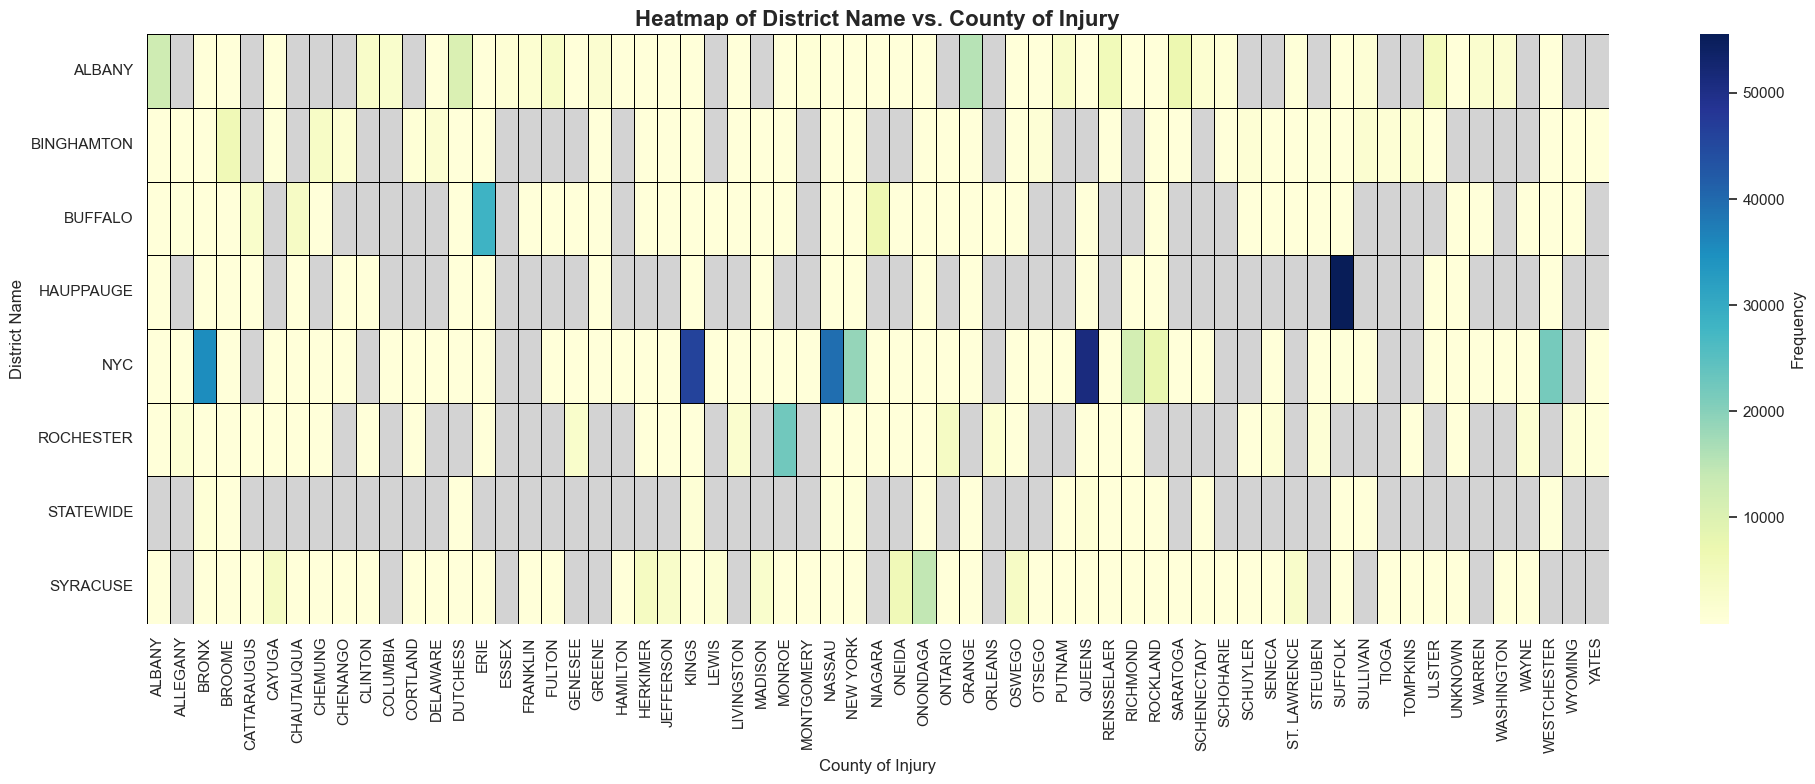

In [146]:
plot_heatmap_with_zero_mask('District Name', 'County of Injury', contingency_table_DN_CI)

**Analysis of District Name vs. County of Injury Heatmap**

- Certain districts show a higher frequency of injury cases in specific counties. For example, NYC has high case counts in the Queens and Kings counties. Other districts, such as Albany and Buffalo, also show concentrated cases in particular counties.These high-frequency areas may benefit from targeted safety policies and injury prevention initiatives, as they are likely more prone to workplace incidents.

- Grey areas in the heatmap represent zero recorded cases for certain district-county combinations. This could indicate that these counties fall outside the jurisdiction of specific districts.
   
- The heatmap hints at a regional specialization for certain districts, with cases predominantly concentrated in specific counties. For example, Albany appears to manage cases from a wide array of counties, which may indicate a broader administrative scope or specific regional focus. Districts like Hauppauge and Rochester appear more concentrated, potentially serving smaller, defined areas with particular activities or industries.

- Including District Name and County of Injury as features in the predictive model could improve models by capturing these geographical risk patterns. Certain regions inherently show higher incident frequencies, and the model could leverage these trends. The grey zones highlight areas where predictions should not be attempted, as they lie outside the operational scope of specific districts. This will help the model avoid making predictions for non-existent combinations.

#### **2.5.1.2** Medical Fee Region ~ County of Injury

In [147]:
contingency_table_MFR_CI = pd.crosstab(location_data['Medical Fee Region'], location_data['County of Injury'])
contingency_table_MFR_CI

County of Injury    ALBANY  ALLEGANY  BRONX  BROOME  CATTARAUGUS  CAYUGA  \
Medical Fee Region                                                         
I                     4318      1589     34    3906         2569    4189   
II                    8199         3    130    2094           14      14   
III                     19         0    573       2            0       2   
IV                      36         3  35276      19            2       3   

County of Injury    CHAUTAUQUA  CHEMUNG  CHENANGO  CLINTON  COLUMBIA  \
Medical Fee Region                                                     
I                         3664     3311      1478     2822       761   
II                          10       10         3        4      1548   
III                          0        0         0        0         0   
IV                           0        1         3        3         7   

County of Injury    CORTLAND  DELAWARE  DUTCHESS   ERIE  ESSEX  FRANKLIN  \
Medical Fee Region                                                         
I                        724      1716        48  11149   1024      1347   
II                         1         5     10402  17197      3         2   
III                        0         1        83      9      1         0   
IV                         1         4        51     37      2         0   

County of Injury    FULTON  GENESEE  GREENE  HAMILTON  HERKIMER  JEFFERSON  \
Medical Fee Region                                                           
I                     3316     2524    1564       118      2826       2942   
II                      14       20      19         1      1265         42   
III                      2        1       0         0         1          1   
IV                       4        1       6         3         9          4   

County of Injury    KINGS  LEWIS  LIVINGSTON  MADISON  MONROE  MONTGOMERY  \
Medical Fee Region                                                          
I                      41   1157        1964     2236    6711         566   
II                    114      9          24       18   15657           7   
III                   205      0           0        2       1           0   
IV                  46462      1           1        1      15           2   

County of Injury    NASSAU  NEW YORK  NIAGARA  ONEIDA  ONONDAGA  ONTARIO  \
Medical Fee Region                                                         
I                       34        76     6665    2813      6754     3770   
II                      41        61       62    3001      7631       21   
III                     92       219        0       1         5        0   
IV                   39690     18842        2       7        18        3   

County of Injury    ORANGE  ORLEANS  OSWEGO  OTSEGO  PUTNAM  QUEENS  \
Medical Fee Region                                                    
I                     1076     1408    3495     750       5      57   
II                    6348        6      18       1     248     148   
III                   8092        0       0       0    2710     284   
IV                     164        0       1       2      27   51676   

County of Injury    RENSSELAER  RICHMOND  ROCKLAND  SARATOGA  SCHENECTADY  \
Medical Fee Region                                                          
I                         3245        13        16      6089          147   
II                        2176        14        34       856         1218   
III                          5        28      7728         1            3   
IV                          21     11998        79        10            9   

County of Injury    SCHOHARIE  SCHUYLER  SENECA  ST. LAWRENCE  STEUBEN  \
Medical Fee Region                                                       
I                         517       897    1209          3106     1100   
II                          2         1       2             2        2   
III                         0         0       0             0        0   
IV  

C:\Users\bruna\AppData\Local\Temp\ipykernel_15372\3015153730.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sns.heatmap(contingency_table.applymap(lambda x: np.nan if x != 0 else 0),


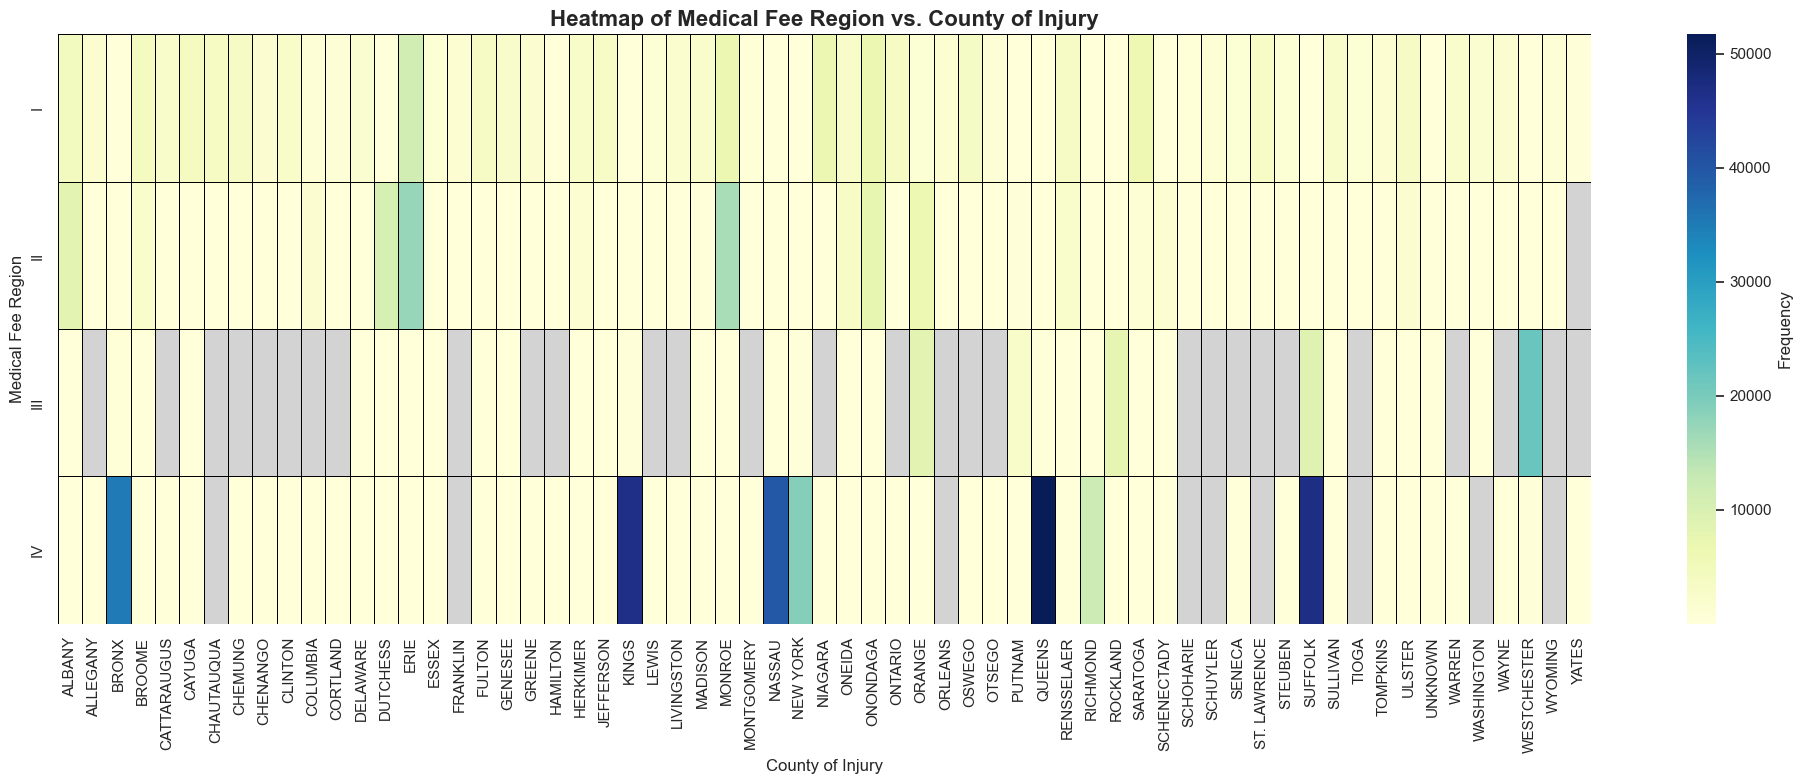

In [148]:
plot_heatmap_with_zero_mask('Medical Fee Region', 'County of Injury', contingency_table_MFR_CI)

**Analysis of Medical Fee Region vs. County of Injury Heatmap**

- New York and Kings counties have a notable concentration of cases under the UK (Unknown) medical fee region.

- In regions like IV, the concentration of cases in certain counties may reflect a standardized fee structure, possibly due to the higher medical costs or greater density of healthcare facilities in these areas. This trend could indicate regions with increased injury claims or specialized services handling these types of cases.

- Grey areas in the heatmap represent combinations where no data is available, potentially indicating that certain counties are not assigned to specific medical fee regions, lower population or fewer work-related injuries. 

- Medical fee regions like III have limited representation, which may suggest that fewer counties fall under this classification or that it is reserved for particular types of cases.

### **2.5.2** Categorical variables ~ Claim Injury Type

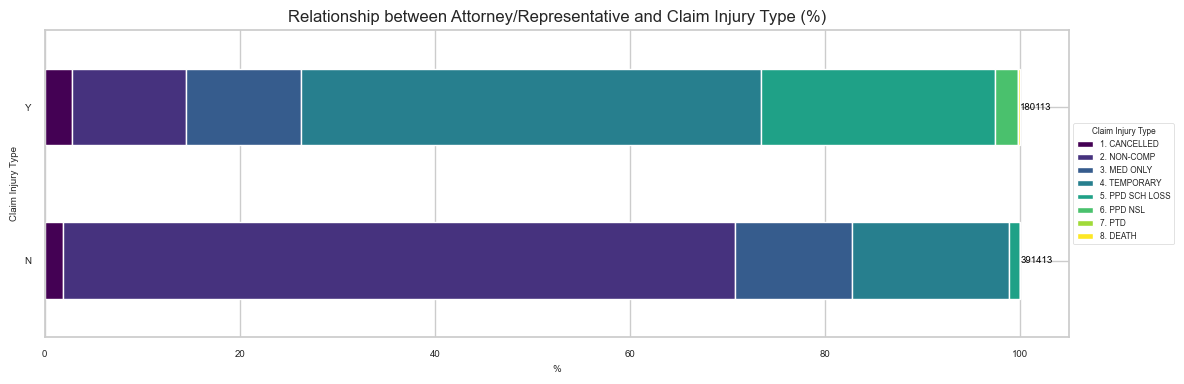

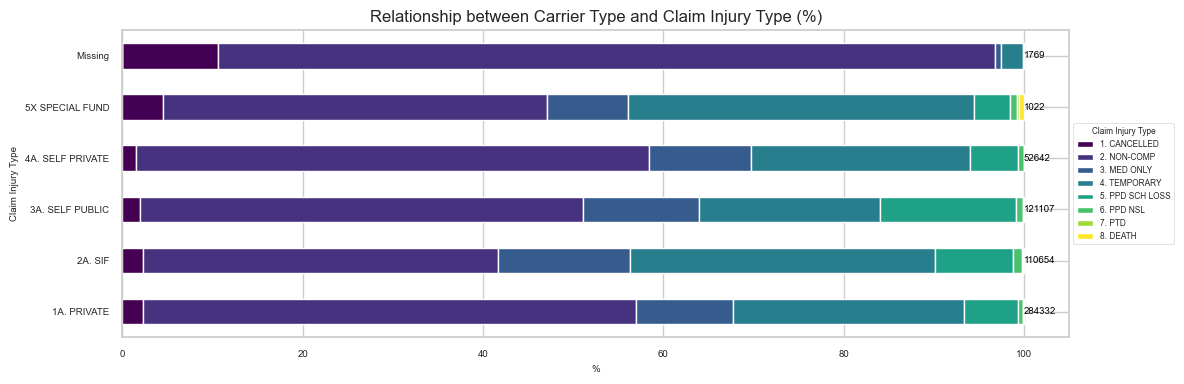

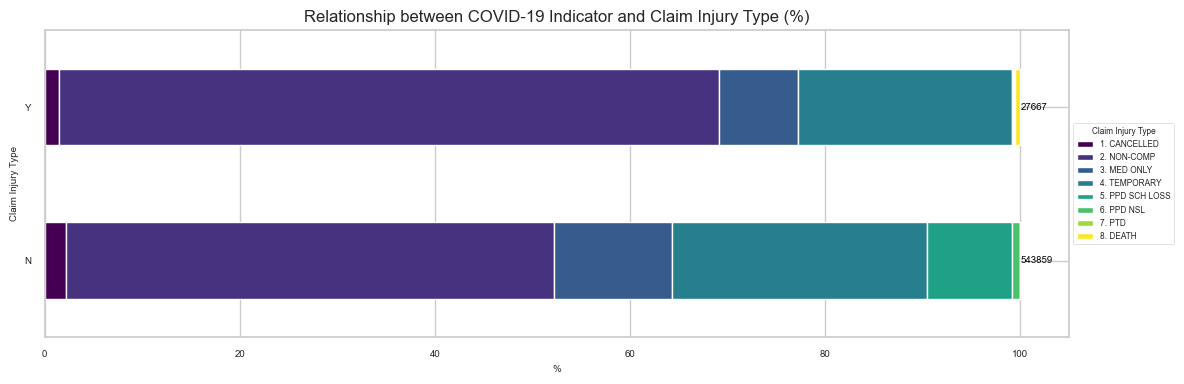

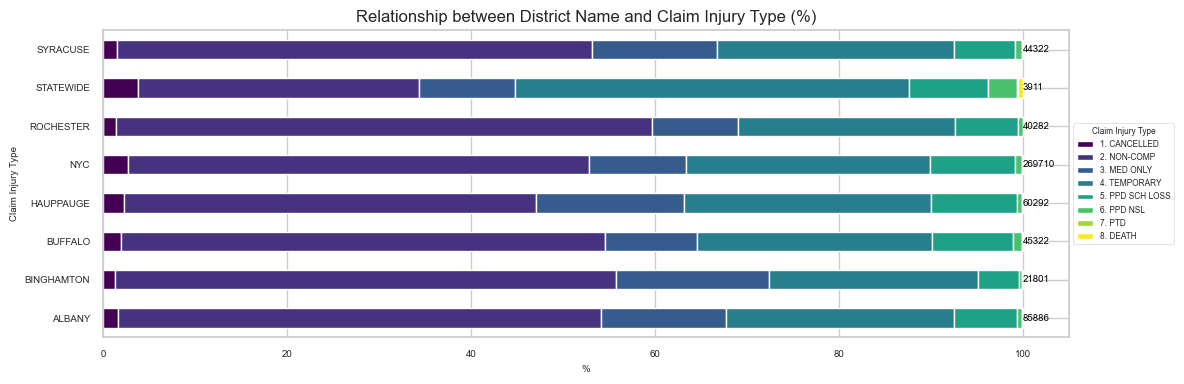

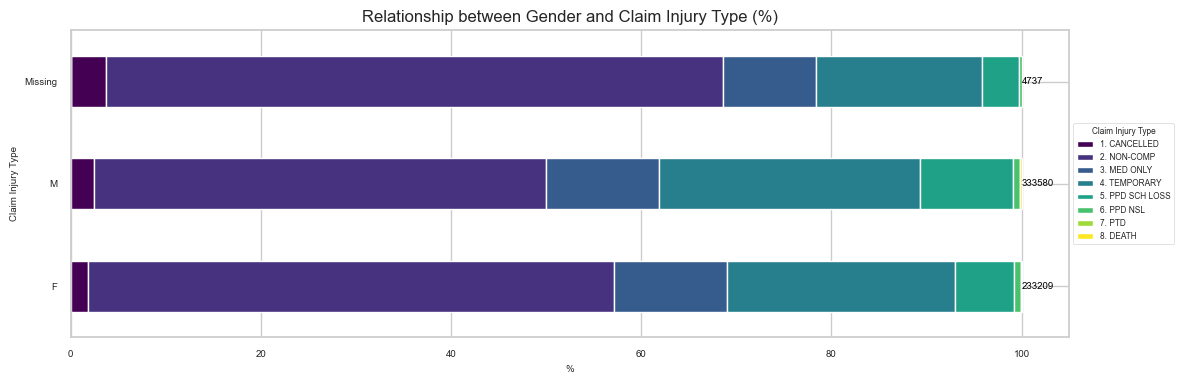

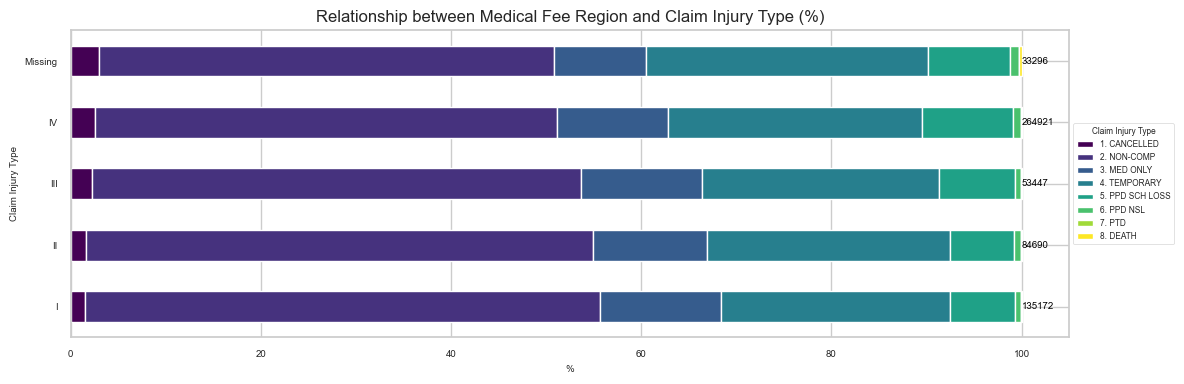

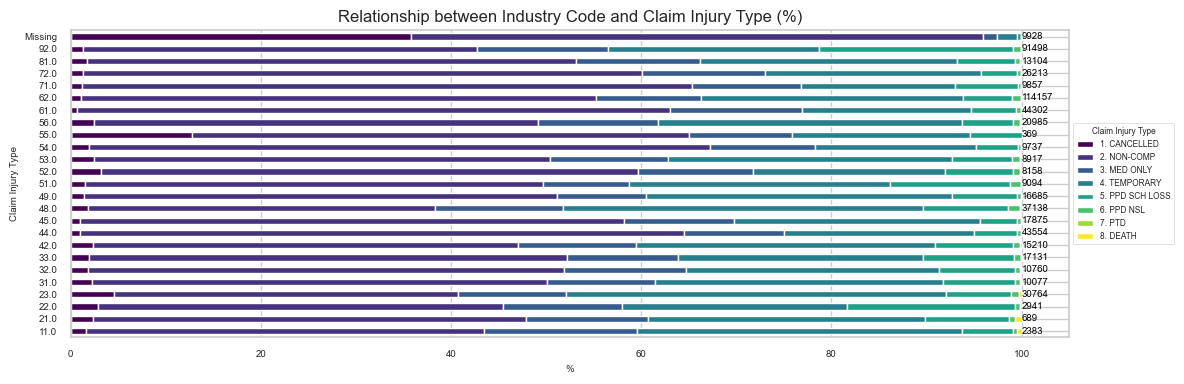

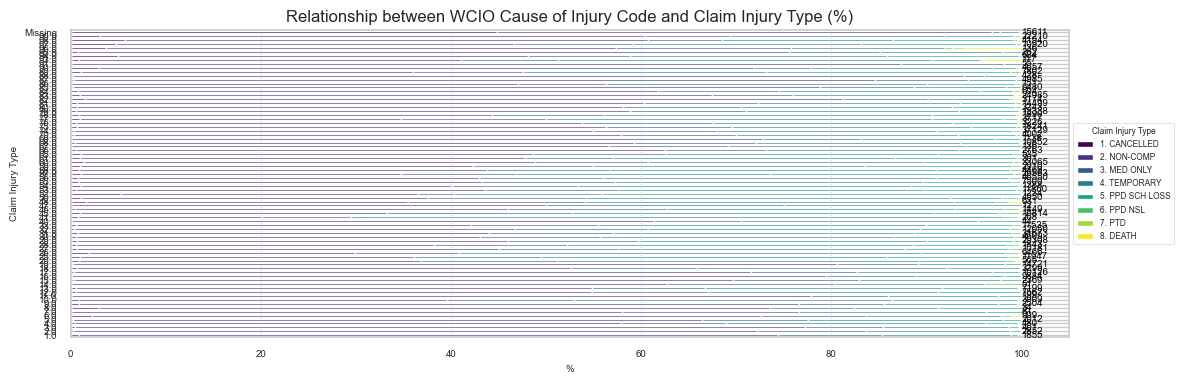

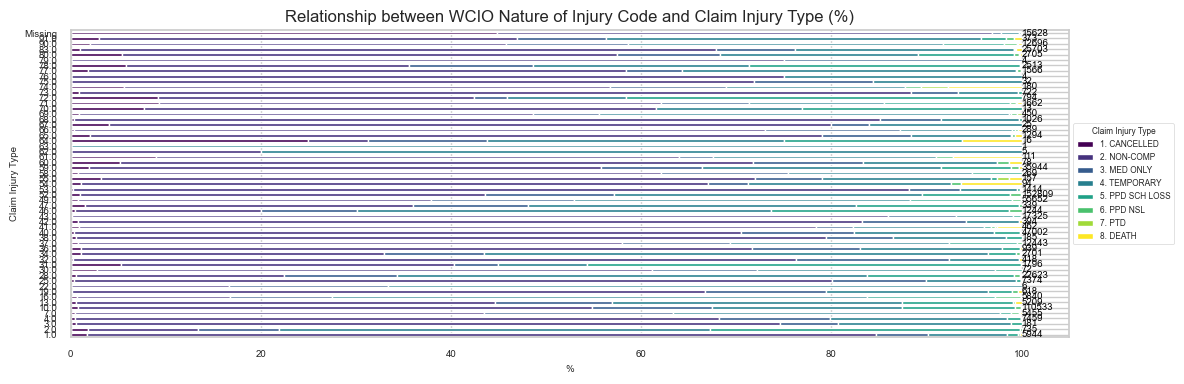

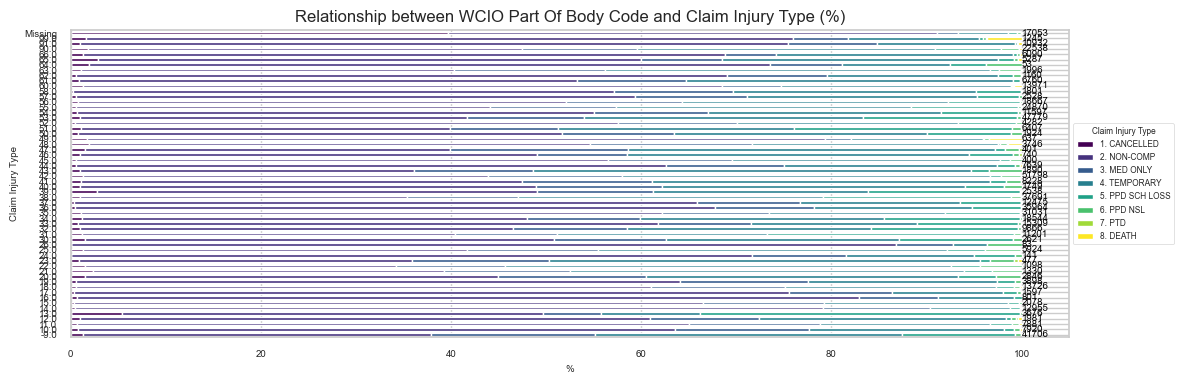

In [149]:
# for this analysis we excluded the variables with high granularity
exclude_vars = ['Carrier Name', 'Claim Injury Type', 'County of Injury', 'Industry Code Description', 'WCIO Cause of Injury Description', 'WCIO Nature of Injury Description', 'WCIO Part Of Body Description', 'Zip Code']
filtered_vars = [var for var in categorical_variables if var not in exclude_vars]

for cat_var in filtered_vars:
    plot_categorical_target_relation(cat_var, 'Claim Injury Type', df)

### **2.5.3** Numerical variables ~ Claim Injury Type

c:\Users\bruna\Documents\Nova IMS\1 Semestre\Machine Learning\Projeto\final\functions_final.py:541: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


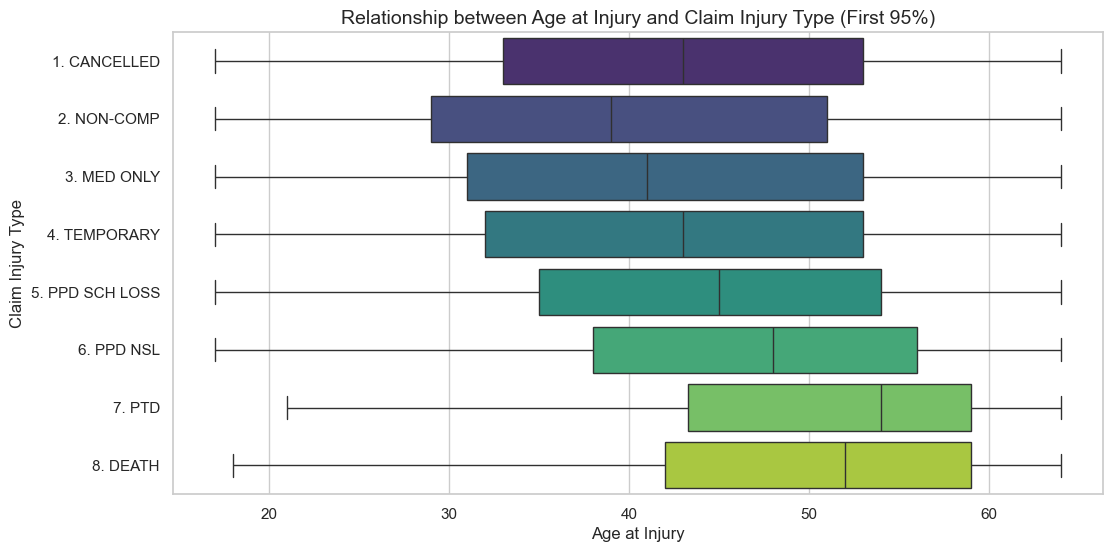

c:\Users\bruna\Documents\Nova IMS\1 Semestre\Machine Learning\Projeto\final\functions_final.py:541: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


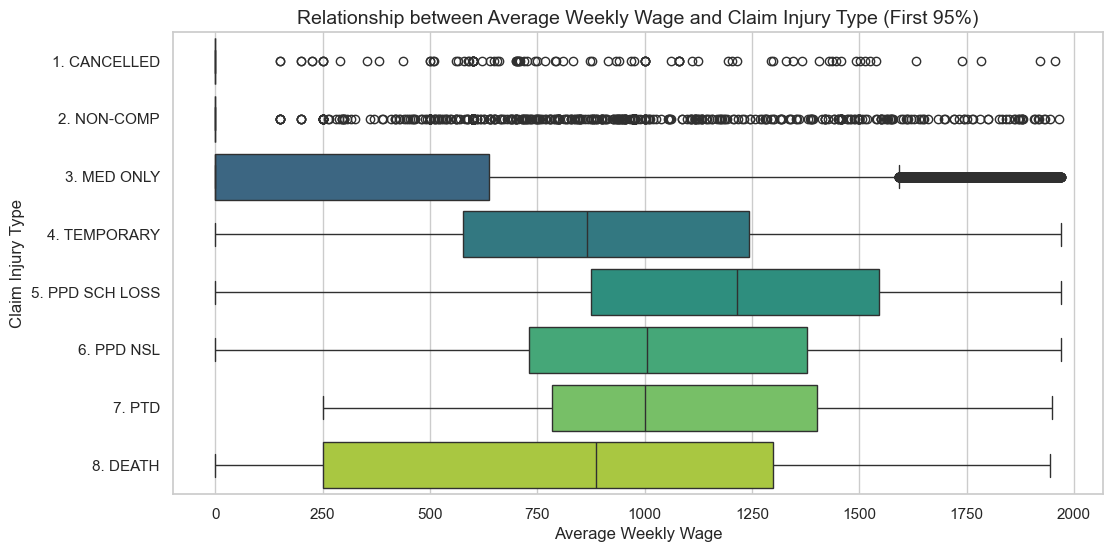

c:\Users\bruna\Documents\Nova IMS\1 Semestre\Machine Learning\Projeto\final\functions_final.py:541: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


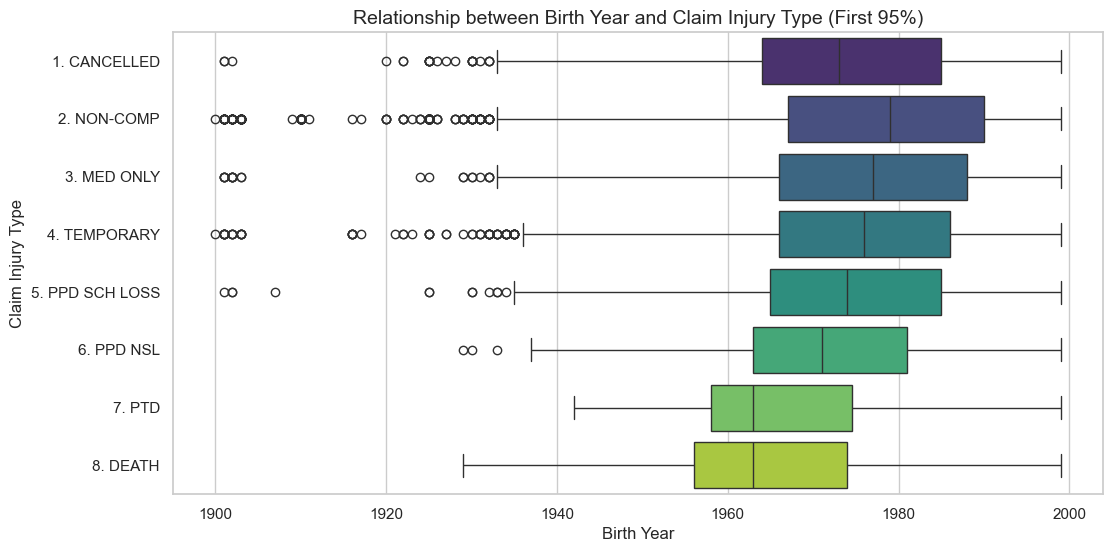

c:\Users\bruna\Documents\Nova IMS\1 Semestre\Machine Learning\Projeto\final\functions_final.py:541: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


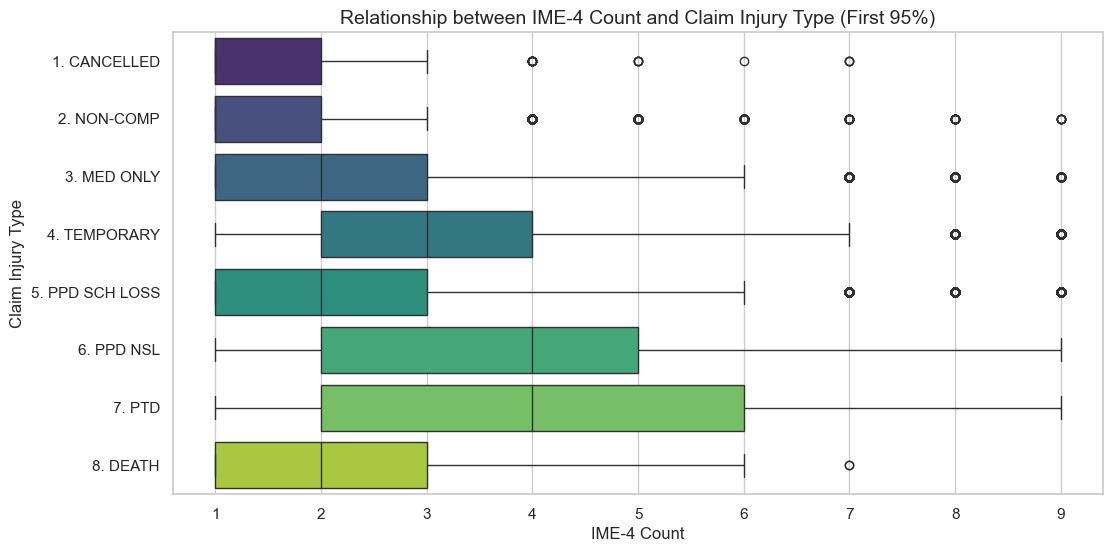

c:\Users\bruna\Documents\Nova IMS\1 Semestre\Machine Learning\Projeto\final\functions_final.py:541: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


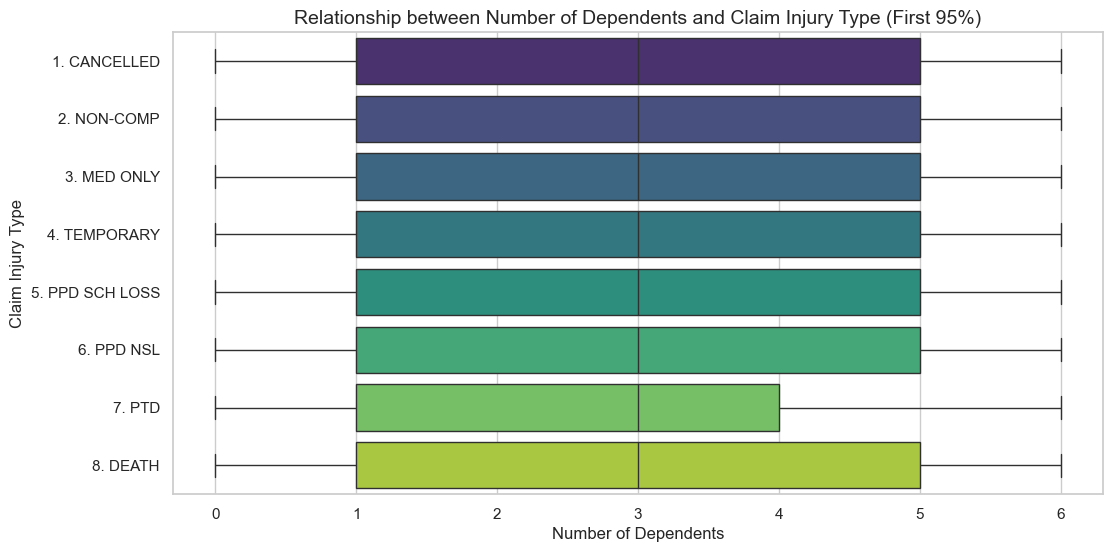

In [151]:
for numerical_var in numerical_variables:
    plot_numerical_target_relation(df, numerical_var, 'Claim Injury Type')

### **2.5.4** Cramer's V Heatmap

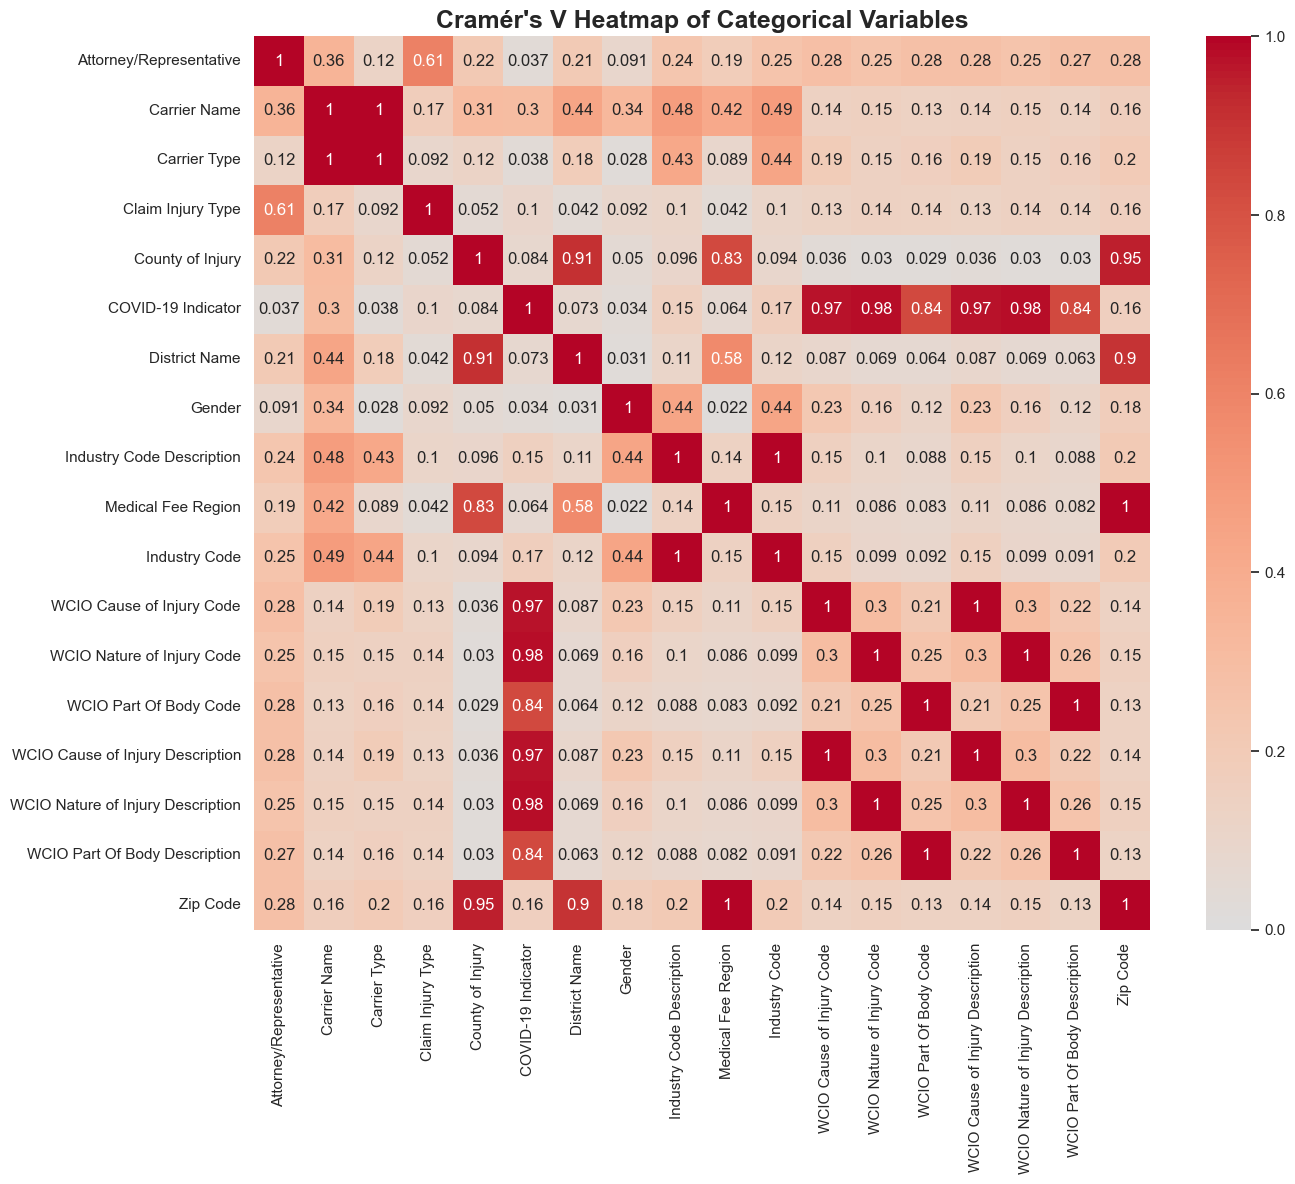

In [153]:
# Heatmap of Cramér's V
plt.figure(figsize=(14, 12))
sns.heatmap(cramers_v_matrix(df, categorical_variables), annot=True, cmap='coolwarm', center=0, vmin=0, vmax=1)
plt.title('Cramér\'s V Heatmap of Categorical Variables', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

Through our exploratory data analysis, we observed several notable correlations between categorical variables in our dataset:

- **Carrier Name** showed a strong correlation with **Carrier Type** (Cramér's V = 0.98);

- **District Name** had a perfect correlation (Cramér's V = 1) with **County of Injury** and Zip Code;

- **Medical Fee Region** exhibited a high correlation with **Zip Code** (Cramér's V = 0.95) and moderate correlation with **County of Injury** (Cramér's V = 0.72);

- **COVID-19 Indicator** showed high correlations with all WCIO Descriptions (Cause of Injury, Nature of Injury and Part of Body);

- **Industry Code Description** displayed a moderate correlation with Carrier Name (Cramér's V = 0.48) and Carrier Type (Cramér's V = 0.38).

In general, **Zip Code** have strong correlations with County of Injury, District Name, and Medical Fee Region, with correlation coefficients reaching 1, indicating that these variables carry the same information. Besides the fact that this variable is overly granular, add limited value to the analysis.

The **Zip Code Group** is similarly highly detailed and doesn't fix the high granularity we noticed in *Zip Code**.

Despite these strong correlations, that indicate overlapping information and redundancy, we will not drop any variables at this stage. Instead, we will preprocess the data with all features intact and defer the decision to remove features until the feature selection phase.

### **2.5.5** Correlation Matrix

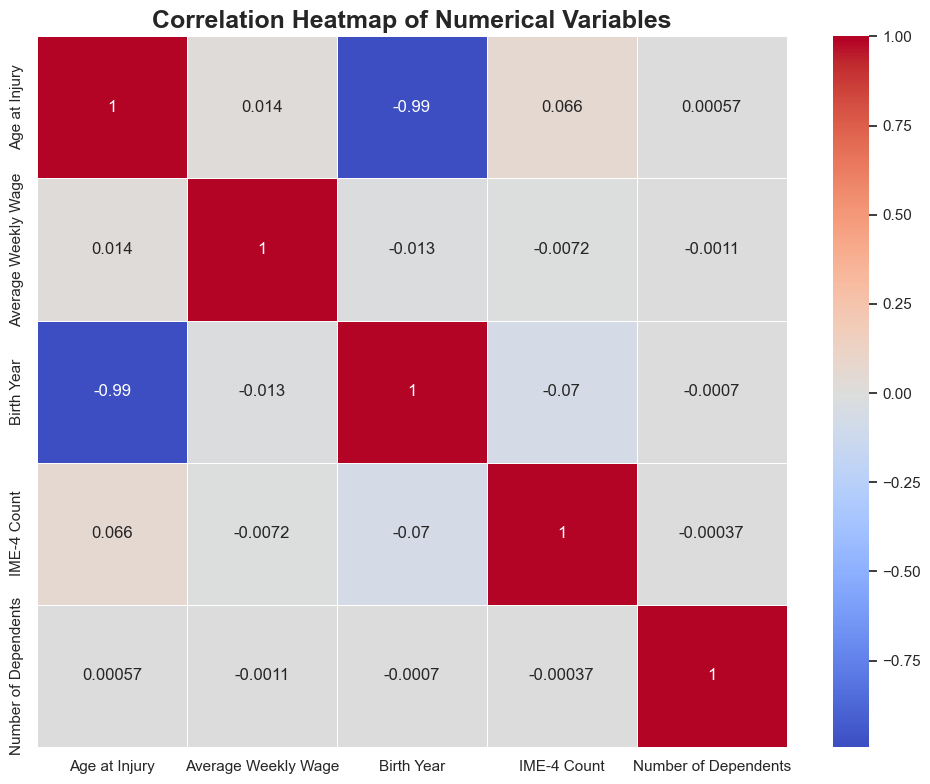

In [154]:
correlation_matrix = df[numerical_variables].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables', fontsize=18, fontweight='bold')
plt.tight_layout()

plt.show()

As expected, **Age at Injury** and **Birth Year** are highly redundant. Age at Injury is directly derived from the Birth Year by subtracting it from the year of the injury. This relationship means that knowing one variable allows us to determine the other.

### **2.5.6** Influence of missing values in Claim Injury Type

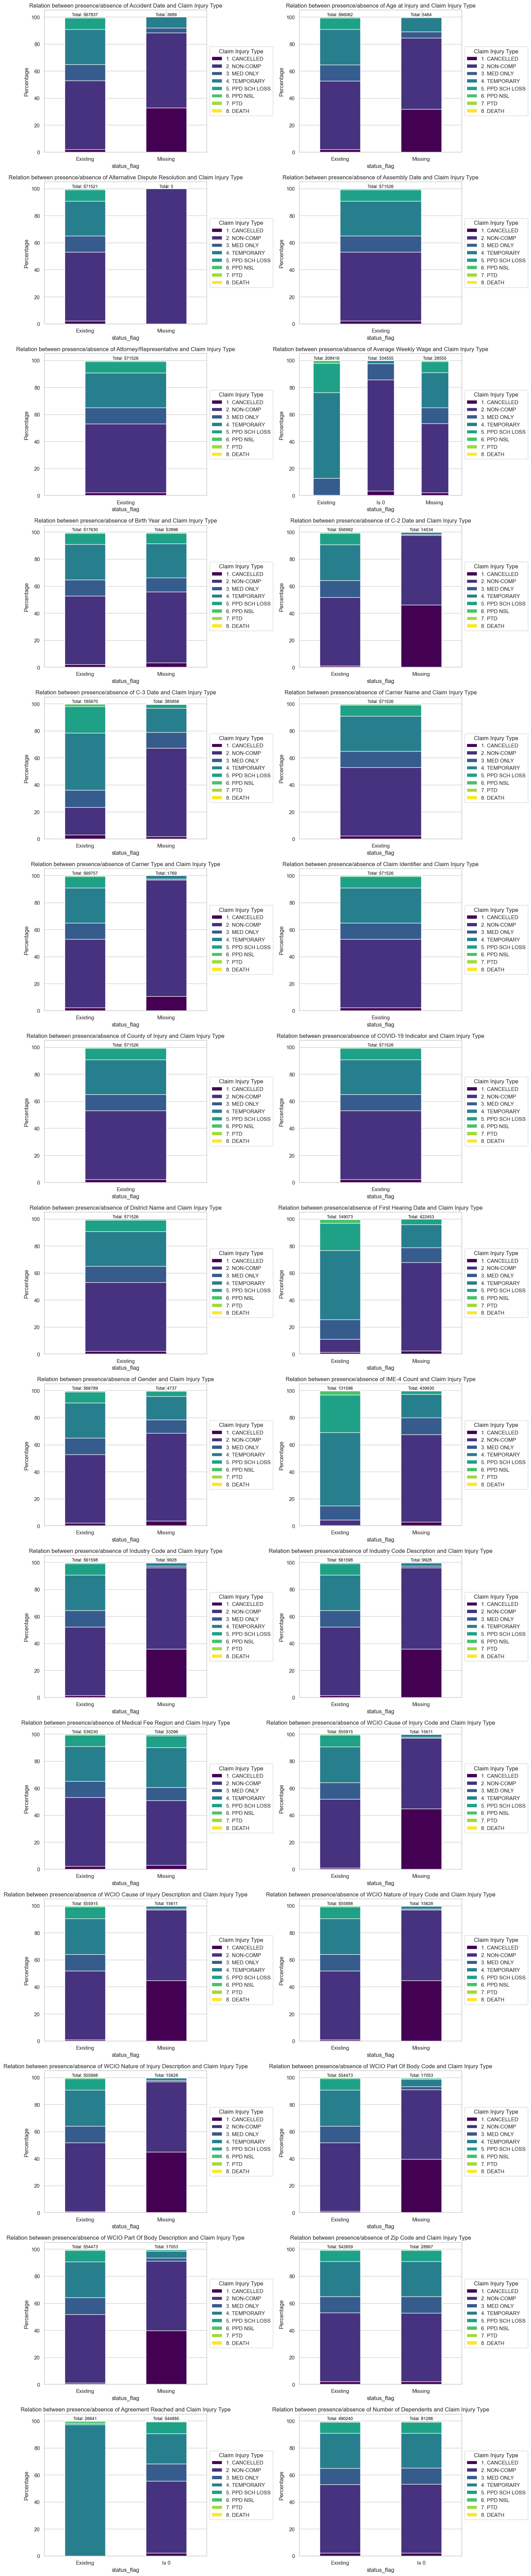

In [155]:
plot_missing_vs_existing_all_vars(df, 'Claim Injury Type')

Based on the results obtained, the absence of information in **Accident Date**, **Age at Injury**, **Average Weekly Wage**, **C-2 Date**, **C-3 Date**, **First Hearing Date**, **Gender**, **IME-4 Count**, **Industry Code**, **WCIO Cause of Injury Code**, **WCIO Nature of Injury** and **WCIO Part of Body** can influence the Claim Injury Type (Target). This information could be useful to Feature Engineering.

<div class="alert alert-block alert-success">

# **3.** Creating binary features to handle Missing and Zero Values

<div>

Based on insights from our previous analysis, we identified that the absence or presence of certain values could significantly impact the Claim Injury Type. To account for this, we created indicator features that mark whether specific values are missing or zero. These indicator features help capture potential patterns related to missing or zero data that could influence the target variable or model predictions.

In [156]:
features_of_interest = ['C-2 Date', 'C-3 Date', 'First Hearing Date', 'Accident Date', 'Age at Injury', 'Carrier Type',
                        'Average Weekly Wage', 'Gender', 'IME-4 Count', 'Industry Code', 'WCIO Cause of Injury Code', 
                        'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Industry Code Description', 'WCIO Cause of Injury Description', 
                        'WCIO Nature of Injury Description', 'WCIO Part Of Body Description']

In [157]:
missing_value_percentages = {
    feature: (df[feature].isna().sum() / df.shape[0]) * 100 for feature in features_of_interest
}

missing_value_df = pd.DataFrame.from_dict(missing_value_percentages, orient='index', columns=['Percentage Missing'])
missing_value_df = missing_value_df.sort_values(by='Percentage Missing', ascending=False)

missing_value_df

Percentage Missing
IME-4 Count                                 76.974626
First Hearing Date                          73.916672
C-3 Date                                    67.513289
Average Weekly Wage                          4.996273
WCIO Part Of Body Code                       2.983766
WCIO Part Of Body Description                2.983766
WCIO Nature of Injury Code                   2.734434
WCIO Nature of Injury Description            2.734434
WCIO Cause of Injury Code                    2.731459
WCIO Cause of Injury Description             2.731459
C-2 Date                                     2.543016
Industry Code                                1.737104
Industry Code Description                    1.737104
Age at Injury                                0.956037
Gender                                       0.828834
Accident Date                                0.645465
Carrier Type                                 0.309522

In [158]:
df = create_indicator_features(df, features_of_interest, indicator_type='missing')
df = create_indicator_features(df, ['Average Weekly Wage'], indicator_type='zero')

### Correlations between binary features and Claim Injury Type

In [159]:
missing_features = [col for col in df.columns if 'Missing' in col or 'Claim Injury Type' in col or 'Average Weekly Wage Zero' in col]

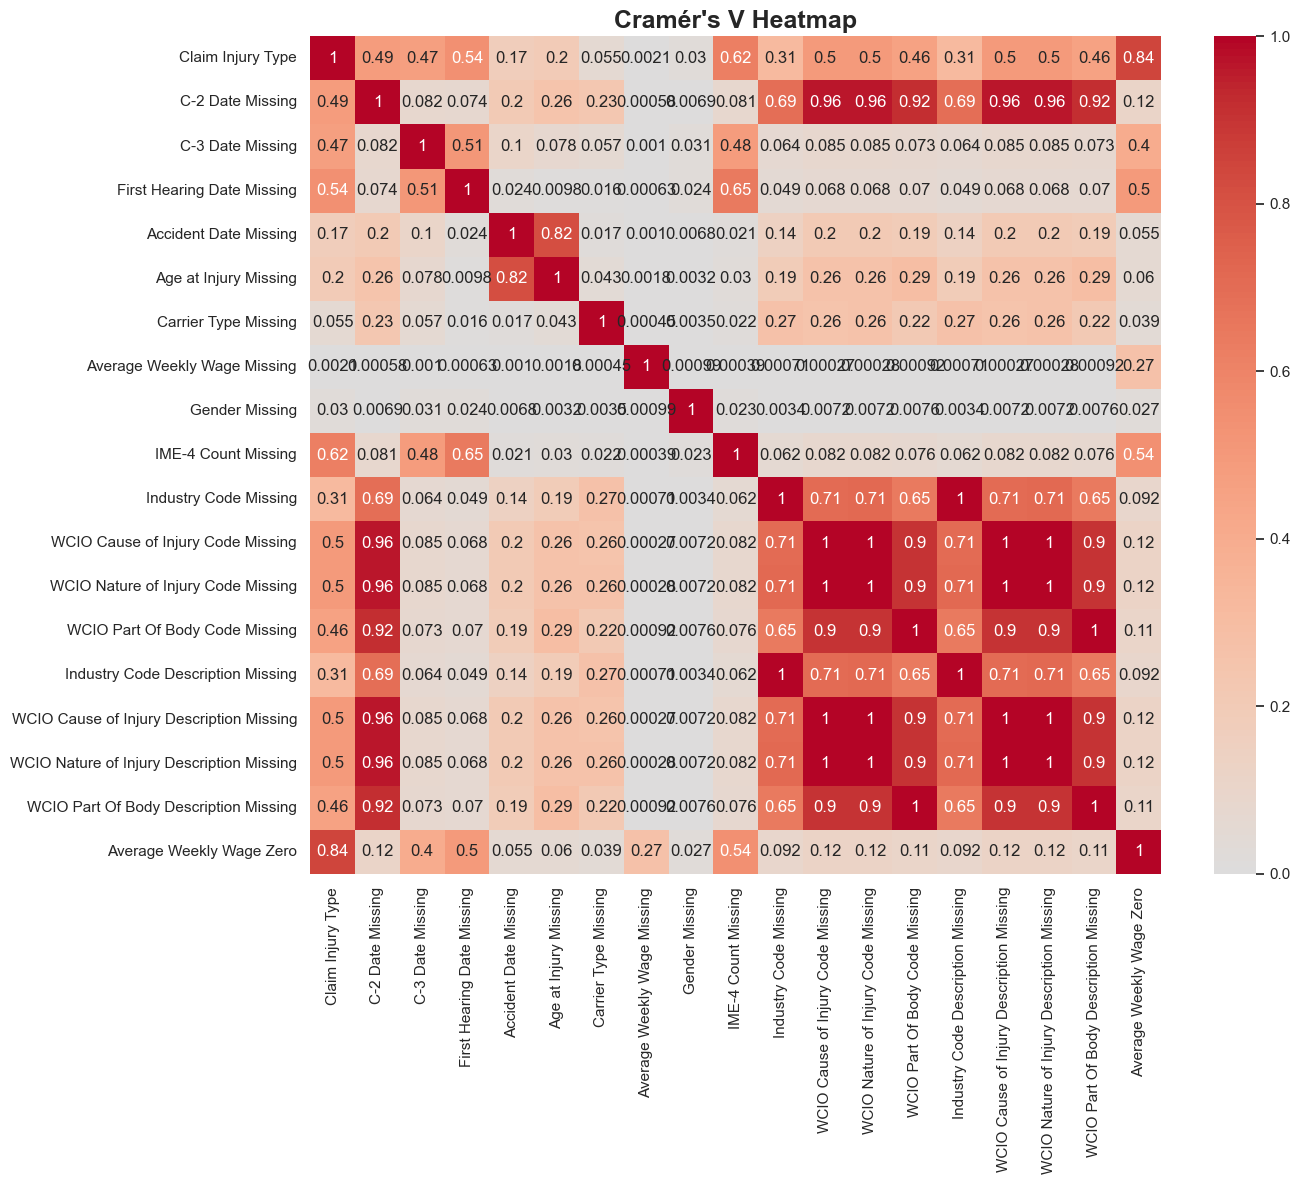

In [160]:
plt.figure(figsize=(14, 12))
sns.heatmap(cramers_v_matrix(df, missing_features), annot=True, cmap='coolwarm', center=0, vmin=0, vmax=1)
plt.title('Cramér\'s V Heatmap', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

We drop the binary variables we didn't see significant correlations with the target variables or redundant infor with others

In [161]:
df.drop(['Accident Date Missing', 'Age at Injury Missing', 'Gender Missing', 'Industry Code Missing', 'WCIO Cause of Injury Code Missing', 'WCIO Nature of Injury Code Missing', 'WCIO Part Of Body Code Missing', 'WCIO Cause of Injury Description Missing', 'WCIO Nature of Injury Description Missing',], axis=1, inplace = True)

In [162]:
df.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Identifier', 'Claim Injury Type', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender',
       'IME-4 Count', 'Industry Code', 'Industry Code Description',
       'Medical Fee Region', 'WCIO Cause of Injury Code',
       'WCIO Cause of Injury Description', 'WCIO Nature of Injury Code',
       'WCIO Nature of Injury Description', 'WCIO Part Of Body Code',
       'WCIO Part Of Body Description', 'Zip Code', 'Agreement Reached',
       'Number of Dependents', 'C-2 Date Missing', 'C-3 Date Missing',
       'First Hearing Date Missing', 'Carrier Type Missing',
       'Average Weekly Wage Missing', 'IME-4 Count Missing',
       'Industry Code Description Missing',
       'WCIO Part Of Body Description Missing', '

In [163]:
categorical_variables.append(['C-2 Date Missing',
       'C-3 Date Missing', 'First Hearing Date Missing',
       'Average Weekly Wage Missing', 'IME-4 Count Missing', 'Carrier Type Missing'
       'Industry Code Description Missing', 'Average Weekly Wage Zero', 'WCIO Part Of Body Description Missing'])

<div class="alert alert-block alert-success">

# **4.** Split the dataset

<div>

In [231]:
X = df.drop(['Claim Injury Type'], axis=1)
y = df['Claim Injury Type']

In [232]:
X.to_csv('X.csv', index=False)
y.to_csv('y.csv',index=False)

In [233]:
X = df.drop(['Agreement Reached'], axis=1)

In [234]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, 
                                                  random_state = 0, # Ensures reproducibility by controlling the random shuffling of data

                                                  stratify = y,     # Ensures that the class distribution is preserved in both the training and validation sets

                                                  shuffle = True)   # Shuffles the data before splitting to ensure a random distribution

In [235]:
print(X_train.shape[0])
print(y_train.shape[0])

400068
400068


In [236]:
X_train.set_index('Claim Identifier', inplace=True)
X_val.set_index('Claim Identifier', inplace=True)

In [237]:
y_train = y_train.reindex(X_train.index)
y_val = y_val.reindex(X_val.index)

<div class="alert alert-block alert-success">

# **5.** Clean and pre-process the dataset

<div>

## **5.1** Outlier Treatment

Checking the boxplots for numerical features:

In [238]:
binary_features = [col for col in X_train.columns if X_train[col].nunique() == 2]
numerical_features = [ col for col in X_train.select_dtypes(include=['int64', 'float64']).columns
                            if col not in binary_features and (not col.endswith('Code'))]

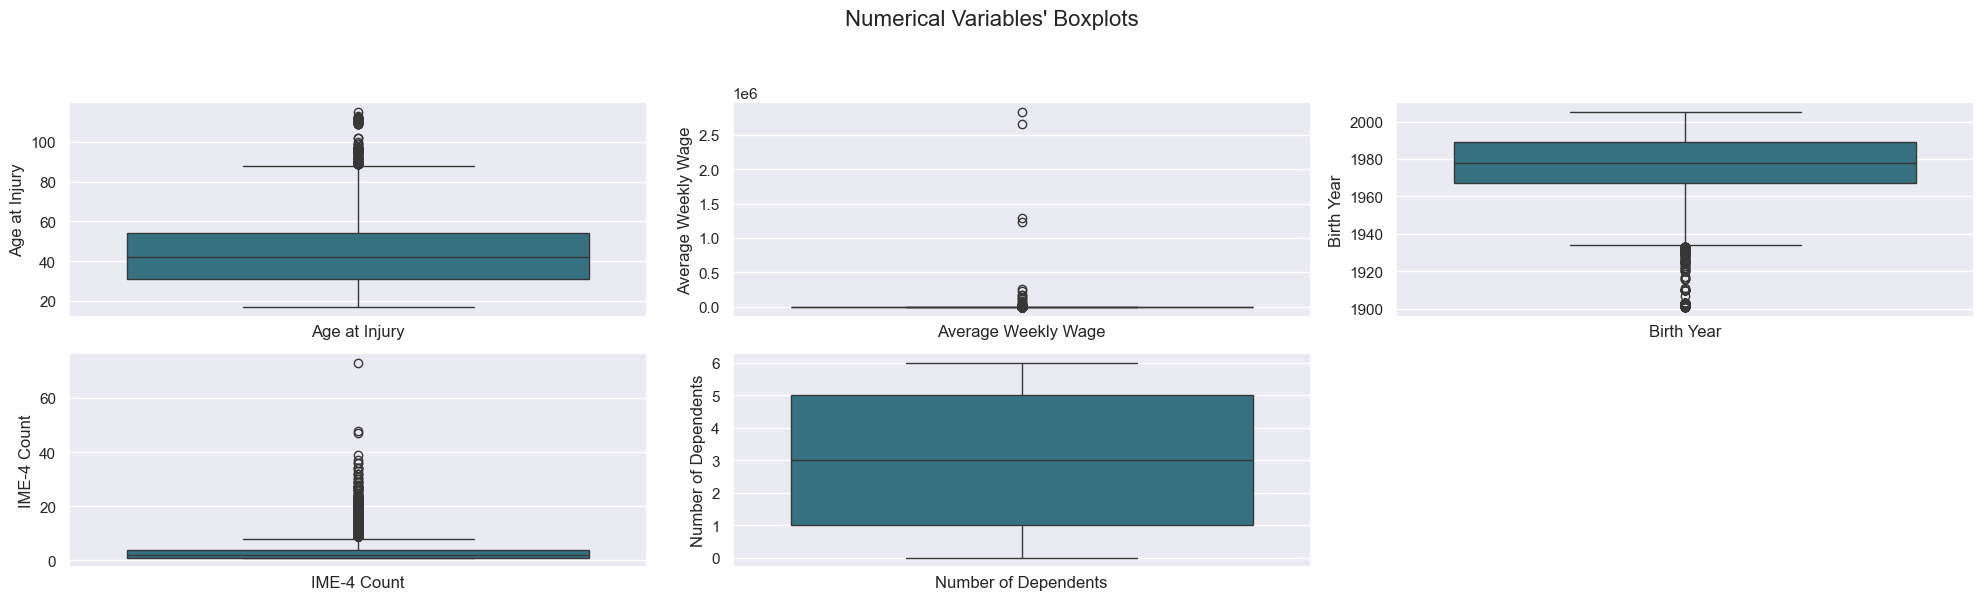

In [239]:
sns.set() 

# Rows and columns for subplots
sp_rows = 4
sp_cols = 3

fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(20, 11))
axes = axes.flatten()  

# Boxplot for each numerical feature
for ax, feat in zip(axes, numerical_features):
    sns.boxplot(data=X_train, y=feat, ax=ax, color=plt.cm.viridis(0.4))  
    ax.set_title(feat, y=-0.13) 

for i in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[i]) 

plt.suptitle("Numerical Variables' Boxplots", fontsize=16)

output_dir = os.path.join('..', 'figures', 'eda')
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

plt.savefig(os.path.join(output_dir, 'numerical_variables_boxplots.png'), dpi=200)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Age at Injury and Birth Year

In [240]:
#In the context of outliers, the only numeric features here that would be affected by them are Age at Injury and Birth Year

count_age_above_85 = (X_train['Age at Injury'] > 85).sum()

print(f"Number of entries where Age at Injury is greater than 85: {count_age_above_85}")

# Count entries where Birth Year is earlier than 1935
count_birth_year_before_1935 = (X_train['Birth Year'] < 1934).sum()

print(f"Number of entries where Birth Year is earlier than 1934: {count_birth_year_before_1935}")

Number of entries where Age at Injury is greater than 85: 202
Number of entries where Birth Year is earlier than 1934: 253


In [241]:
for feature in numerical_features:
    lower_threshold = X_train[feature].quantile(0.005)
    upper_threshold = X_train[feature].quantile(0.995)

    print(f"{feature}: Using a threshold of {upper_threshold}, we identified {(X_train[feature] > upper_threshold ).sum()} outliers, that represent {(X_train[feature] > upper_threshold ).sum() / len(X_train) * 100:.2f}% of the dataset.")
    print(f"{feature}: Using a threshold of {lower_threshold}, we identified {(X_train[feature] < lower_threshold).sum()} outliers, that represent {(X_train[feature] < lower_threshold).sum() / len(X_train) * 100:.2f}% of the dataset.")

    # Calculate IQR for Birth Year
    Q1 = X_train[feature].quantile(0.25)
    Q3 = X_train[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"{feature}: Using a upper bound of {upper_bound}, we identified {(X_train[feature] > upper_bound).sum()} outliers, that represent {(X_train[feature] > upper_bound).sum() / len(X_train) * 100:.2f}% of the dataset.")
    print(f"{feature}: Using a lower bound of {lower_bound}, we identified {(X_train[feature] < lower_bound).sum()} outliers, that represent {(X_train[feature] < lower_bound).sum() / len(X_train) * 100:.2f}% of the dataset.")

Age at Injury: Using a threshold of 75.0, we identified 1689 outliers, that represent 0.42% of the dataset.
Age at Injury: Using a threshold of 18.0, we identified 895 outliers, that represent 0.22% of the dataset.
Age at Injury: Using a upper bound of 88.5, we identified 137 outliers, that represent 0.03% of the dataset.
Age at Injury: Using a lower bound of -3.5, we identified 0 outliers, that represent 0.00% of the dataset.
Average Weekly Wage: Using a threshold of 3470.6156000000005, we identified 1900 outliers, that represent 0.47% of the dataset.
Average Weekly Wage: Using a threshold of 0.0, we identified 0 outliers, that represent 0.00% of the dataset.
Average Weekly Wage: Using a upper bound of 2094.4874999999997, we identified 15547 outliers, that represent 3.89% of the dataset.
Average Weekly Wage: Using a lower bound of -1256.6924999999999, we identified 0 outliers, that represent 0.00% of the dataset.
Birth Year: Using a threshold of 2003.0, we identified 733 outliers, tha

In [242]:
X_train, y_train = outliers(X_train, y_train, X_train, numerical_features, 0.005, 0.995)

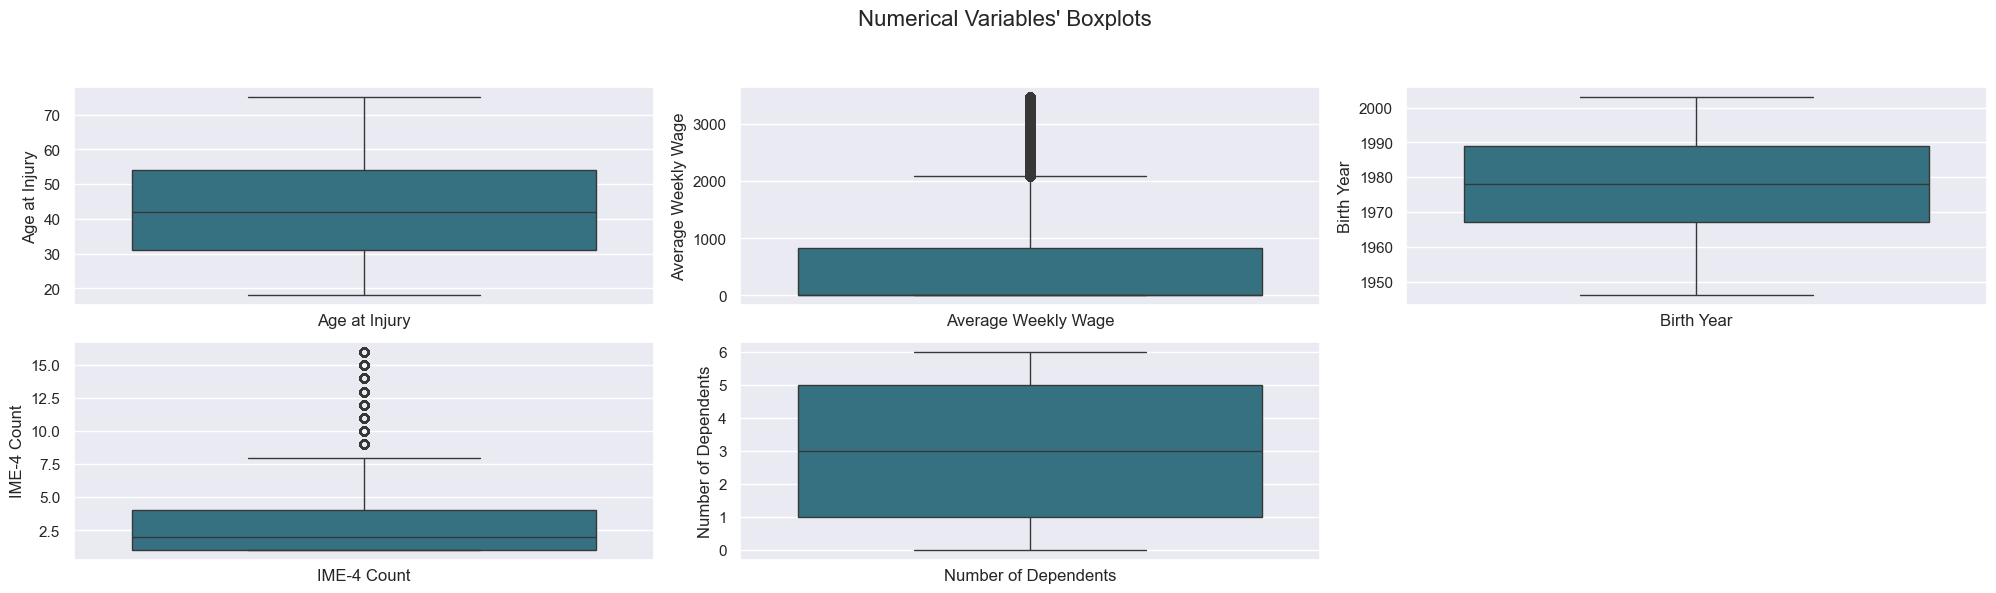

In [243]:
sns.set() 

# Rows and columns for subplots
sp_rows = 4
sp_cols = 3

fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(20, 11))
axes = axes.flatten()  

# Boxplot for each numerical feature
for ax, feat in zip(axes, numerical_features):
    sns.boxplot(data=X_train, y=feat, ax=ax, color=plt.cm.viridis(0.4))  
    ax.set_title(feat, y=-0.13) 

for i in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[i]) 

plt.suptitle("Numerical Variables' Boxplots", fontsize=16)

output_dir = os.path.join('..', 'figures', 'eda')
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

plt.savefig(os.path.join(output_dir, 'numerical_variables_boxplots.png'), dpi=200)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [244]:
df.shape[0]

571526

## **5.2** Missing Values Treatment

### **5.1.1** Overview

##### Percentage of Missing Values

In [245]:
X_train_num = X_train.select_dtypes(include=['int', 'float', 'datetime'])
X_train_cat = X_train.select_dtypes(include=[object, bool])

In [246]:
# Percentage of missing values
missing_num_percentage = (X_train_num.isna().sum() / X_train_num.shape[0] * 100).round(3)

print("Percentage of Missing Values in Numeric Features in training data:")
pd.DataFrame(missing_num_percentage, columns=['% Missing Values (Numeric)'])

Percentage of Missing Values in Numeric Features in training data:


% Missing Values (Numeric)
Accident Date                                               0.649
Age at Injury                                               0.945
Assembly Date                                               0.000
Average Weekly Wage                                         5.027
Birth Year                                                  9.417
C-2 Date                                                    2.543
C-3 Date                                                   67.526
First Hearing Date                                         73.886
IME-4 Count                                                76.971
Industry Code                                               1.728
WCIO Cause of Injury Code                                   2.730
WCIO Nature of Injury Code                                  2.732
WCIO Part Of Body Code                                      2.979
Number of Dependents                                        0.000
C-2 Date Missing                                            0.000
C-3 Date Missing                                            0.000
First Hearing Date Missing                                  0.000
Carrier Type Missing                                        0.000
Average Weekly Wage Missing                                 0.000
IME-4 Count Missing                                         0.000
Industry Code Description Missing                           0.000
WCIO Part Of Body Description Missing                       0.000
Average Weekly Wage Zero                                    0.000

In [247]:
missing_cat_percentage = (X_train_cat.isna().sum() / X_train_cat.shape[0] * 100).round(3)

print("\nPercentage of Missing Values in Categorical Features in training data:")
pd.DataFrame(missing_cat_percentage, columns=['% Missing Values (Categorical)'])


Percentage of Missing Values in Categorical Features in training data:


% Missing Values (Categorical)
Alternative Dispute Resolution                              0.001
Attorney/Representative                                     0.000
Carrier Name                                                0.000
Carrier Type                                                0.317
Claim Injury Type                                           0.000
County of Injury                                            0.000
COVID-19 Indicator                                          0.000
District Name                                               0.000
Gender                                                      0.832
Industry Code Description                                   1.728
Medical Fee Region                                          5.775
WCIO Cause of Injury Description                            2.730
WCIO Nature of Injury Description                           2.732
WCIO Part Of Body Description                               2.979
Zip Code                                                    5.043

##### Skewness

In [248]:
X_train_num = X_train.select_dtypes(include=['int', 'float'])

In [249]:
numeric_features = X_train_num.columns.tolist()

for feat in numeric_features:
    skewness = round(df[feat].skew(),2)
    print(f"Skewness of {feat}: {skewness}") # providing numeric value for skewness to aid in our observations

Skewness of Age at Injury: 0.15
Skewness of Average Weekly Wage: 378.23
Skewness of Birth Year: -0.16
Skewness of IME-4 Count: 2.59
Skewness of Industry Code: 0.18
Skewness of WCIO Cause of Injury Code: -0.08
Skewness of WCIO Nature of Injury Code: -0.03
Skewness of WCIO Part Of Body Code: -0.09
Skewness of Number of Dependents: -0.0
Skewness of C-2 Date Missing: 6.03
Skewness of C-3 Date Missing: -0.75
Skewness of First Hearing Date Missing: -1.09
Skewness of Carrier Type Missing: 17.89
Skewness of Average Weekly Wage Missing: 4.13
Skewness of IME-4 Count Missing: -1.28
Skewness of Industry Code Description Missing: 7.39
Skewness of WCIO Part Of Body Description Missing: 5.53
Skewness of Average Weekly Wage Zero: 0.35


- Some of our numeric variables are irrelevant for this exercise of checking skewness such as: Claim Identifier, IME-4 Count, Industry Code, and all WCIO variables. Their irrelevance comes from the nature of the data within these fields. Skewness as a determining for median or mean imputation is pointless here as these fields have unique identifiers corresponding to the claim in question.

- **Age at Injury**: Overall good distribution of data. Skewnes of 0.15 indicates right leaning SKU so median implantation would be the best candidate for any missing data in this variable. We will instead explore using birth year and accident date to determine the age of injury before using median implantation.

- **Average Weekly Wage**: Data looks to be symmetrical from first glace but a skewness of 378.5 indicates there is an outlier here. Median/mean imputation will not work well here. Any missing data will have to be replaced using a baseline of similar claims that have similar ages age and industry code.

- **Birth Year**: Overall good distribution of data. Skewness of -0.16 indicates left leaning skew so median imputation would be the best candidate to replace any missing values. We will instead explore using age at injury year and accident date to determine the age of injury before using median implantation.

- **Number of Dependents**: Data looks to be symmetrical and a skewness of almost 0 corroborates that observation, however; further analysis is needed to understand the feature. Median/Mode impuation will not be favorable in this case.


Remaining variables with missing values: We can use median/mode imputation for some, but not median/mode of the entire dataset. We will need to group by other variables to maintain our best guess for what that data should be.

- **Accident Date**: Try to find a consistent lag between accident date and the dates C-2, C-3 and Assembly based on what date comes first and imputate based on that. 

- **Age at Injury**: Use birth year and accident date to determine age at injury. Remaining fields missing, if applicable, will be filled with the median

- **Average Weekly Wage**: Random Forest imputation based on Industry Code Description, Gender, County of Injury and Birth Year.

- **Birth Year**: Use age at injury and accident date to determine. Remaining fields missing, if applicable, will be filled with the median.

- **C-2 Date**: Imputate based on the lag between accident date and C-2 Date, for the claims with non missing values.

- **C-3 Date**: Imputate based on the lag between accident date and C-3 Date, for the claims with non missing values.

- **Carrier Type**: Imputed with the mode of the groups specified by Carrier Name.

- **First Hearing Date**: We don't input because the absence of the data reveals no first hearing. We replace this feature with the one previously created 'First Hearing Date Missing'.

- **IME-4 Count**: 0 is be imputed for the missing values to indicate there were no forms provided.

- **Industry Code Description**:  Imputed with the mode of the groups specified by Carrier Type.

- **WCIO Cause of Injury Description**: Mode based on Industry Code Description.

- **WCIO Nature of Injury Description**: Mode based on Industry Code Description. 

- **WCIO Part Of Body Description**: Mode based on Industry Code Description.

### **5.1.2** Imputation

We decided to not impute first hearing date because being missing indicates that the hearing didn't happen

##### Dates

In [250]:
X_val = accident_date_imputation(X_val, X_train)
X_train = accident_date_imputation(X_train, X_train)

In [251]:
X_val = other_dates_imputation(X_val, X_train, 'C-2 Date')
X_train = other_dates_imputation(X_train, X_train, 'C-2 Date')

In [252]:
X_val = other_dates_imputation(X_val, X_train, 'C-3 Date')
X_train = other_dates_imputation(X_train, X_train, 'C-3 Date')

##### Age at Injury and Birth Year

In [253]:
X_val = year_differences(X_val, X_train, 'Age at Injury', 'Birth Year')
X_val = year_differences(X_val, X_train, 'Birth Year', 'Age at Injury')

In [254]:
X_train = year_differences(X_train, X_train, 'Age at Injury', 'Birth Year')
X_train = year_differences(X_train, X_train, 'Birth Year', 'Age at Injury')

##### Industry Code, Gender, Medical Fee Region, County of Injury, all WCIO

In [255]:
X_train[X_train['Industry Code'].isna() & X_train['Industry Code Description'].isna() & X_train['WCIO Cause of Injury Code'].isna() & X_train['WCIO Cause of Injury Description'].isna() & X_train['WCIO Nature of Injury Code'].isna() & X_train['WCIO Nature of Injury Description'].isna() & X_train['WCIO Part Of Body Code'].isna() &  X_train['WCIO Part Of Body Description'].isna()]

Accident Date  Age at Injury Alternative Dispute Resolution  \
Claim Identifier                                                               
5928831             2022-01-18           41.0                              N   
5739486             2020-12-23           58.0                              N   
5888202             2021-12-21           28.0                              N   
5621927             2020-11-19           24.0                              Y   
6106587             2022-09-14           44.0                              N   
...                        ...            ...                            ...   
5686889             2021-02-16           47.0                              Y   
5625615             2020-12-10           66.0                              N   
5775230             2020-02-25           42.0                              N   
5475053             2020-04-19           25.0                              N   
5957909             2022-03-23           57.0                              Y   

                 Assembly Date Attorney/Representative  Average Weekly Wage  \
Claim Identifier                                                              
5928831             2022-02-24                       Y                  0.0   
5739486             2021-06-09                       N                  0.0   
5888202             2021-12-30                       N                  0.0   
5621927             2020-12-22                       Y                  NaN   
6106587             2022-10-13                       N                  NaN   
...                        ...                     ...                  ...   
5686889             2021-03-25                       N                  NaN   
5625615             2020-12-29                       Y                  0.0   
5775230             2021-07-28                       N                  0.0   
5475053             2020-05-01                       Y                  0.0   
5957909             2022-04-04                       N                  0.0   

                  Birth Year   C-2 Date   C-3 Date              Carrier Name  \
Claim Identifier                                                               
5928831               1980.0 2022-01-28 2022-02-18      STATE INSURANCE FUND   
5739486               1962.0 2021-01-02 2021-01-18      STATE INSURANCE FUND   
5888202               1993.0 2021-12-31 2021-12-27      STATE INSURANCE FUND   
5621927               1996.0 2020-11-29 2021-01-19      ELECTRICAL EMPLOYERS   
6106587               1978.0 2022-09-24 2022-10-10  POLICE, FIRE, SANITATION   
...                      ...        ...        ...                       ...   
5686889               1974.0 2021-02-26 2021-03-14      ELECTRICAL EMPLOYERS   
5625615               1954.0 2020-12-20 2020-12-16  POLICE, FIRE, SANITATION   
5775230               1978.0 2020-03-06 2020-03-22  POLICE, FIRE, SANITATION   
5475053               1994.0 2020-04-29 2020-04-21  POLICE, FIRE, SANITATION   
5957909               1964.0 2022-04-02 2022-04-18      ELECTRICAL EMPLOYERS   

                      Carrier Type Claim Injury Type County of Injury  \
Claim Identifier                                                        
5928831                    2A. SIF      1. CANCELLED           QUEENS   
5739486                    2A. SIF      1. CANCELLED          SUFFOLK   
5888202                    2A. SIF      1. CANCELLED           NASSAU   
5621927           4A. SELF PRIVATE       2. NON-COMP           QUEENS   
6106587            3A. SELF PUBLIC       2. NON-COMP            BRONX   
...                            ...               ...              ...   
5686889           4A. SELF PRIVATE       2. NON-COMP           QUEENS   
5625615            3A. SELF PUBLIC       3. MED ONLY            KINGS   
5775230            3A. SELF PUBLIC      1. CANCELLED           QUEENS   
5475053            3A. SELF PUBLIC       2. NON-COMP         RICHMOND   
5957909           4A. SELF PRIV

Most rows in the dataset have missing values in determinant features such as Industry Code, Industry Code Description, WCIO Cause of Injury Code, WCIO Cause of Injury Description, WCIO Nature of Injury Code, WCIO Nature of Injury Description, WCIO Part of Body Code, and WCIO Part of Body Description. These features are pivotal for predicting work-related injury compensation, as they directly pertain to claim and injury details.

Given their importance and the lack of meaningful imputation strategies for these features, rows with missing values in these critical columns were dropped from the dataset. This ensures the integrity of the analysis and the relevance of the features for the predictive model.

In [256]:
X_train['Claim Injury Type'].value_counts()

Claim Injury Type
2. NON-COMP        203180
4. TEMPORARY       103599
3. MED ONLY         47809
5. PPD SCH LOSS     33192
1. CANCELLED         8695
6. PPD NSL           2934
8. DEATH              327
7. PTD                 66
Name: count, dtype: int64

In [257]:
X_train[X_train['Industry Code'].isna() & X_train['Industry Code Description'].isna() & X_train['WCIO Cause of Injury Code'].isna() & X_train['WCIO Cause of Injury Description'].isna() & X_train['WCIO Nature of Injury Code'].isna() & X_train['WCIO Nature of Injury Description'].isna() & X_train['WCIO Part Of Body Code'].isna() &  X_train['WCIO Part Of Body Description'].isna()].shape[0]/X_train.shape[0]*100

1.480232715194021

In [258]:
filtered_indices = X_train[~(X_train['Industry Code'].isna() & 
        X_train['Industry Code Description'].isna() & 
        X_train['WCIO Cause of Injury Code'].isna() & 
        X_train['WCIO Cause of Injury Description'].isna() & 
        X_train['WCIO Nature of Injury Code'].isna() & 
        X_train['WCIO Nature of Injury Description'].isna() & 
        X_train['WCIO Part Of Body Code'].isna() &  
        X_train['WCIO Part Of Body Description'].isna())].index
X_train = X_train.loc[filtered_indices]
y_train = y_train.loc[filtered_indices]

In [259]:
X_train = impute_with_group_modes(X_train, X_train, 'Carrier Type', ['Carrier Name'], 'Carrier Type')
X_train = impute_with_group_modes(X_train, X_train, 'Industry Code Description', ['Carrier Type'], 'Industry Code Description')

In [260]:
X_val = impute_with_group_modes(X_val, X_train, 'Carrier Type', ['Carrier Name'], 'Carrier Type')
X_val = impute_with_group_modes(X_val, X_train, 'Industry Code Description', ['Carrier Type'], 'Industry Code Description')
X_val = impute_with_group_modes(X_val, X_train, 'Gender', ['Industry Code Description'], 'Gender')
X_val = impute_with_group_modes(X_val, X_train, 'Medical Fee Region', ['County of Injury', 'District Name'], 'Medical Fee Region')
X_val = impute_with_group_modes(X_val, X_train, 'Zip Code', ['County of Injury', 'District Name'], 'Zip Code')
X_val = impute_with_group_modes(X_val, X_train, 'WCIO Cause of Injury Description', ['Industry Code Description'], 'WCIO Cause of Injury Description')
X_val = impute_with_group_modes(X_val, X_train, 'WCIO Nature of Injury Description', ['Industry Code Description'], 'WCIO Nature of Injury Description')
X_val = impute_with_group_modes(X_val, X_train, 'WCIO Part Of Body Description', ['Industry Code Description'], 'WCIO Part Of Body Description')

In [261]:
X_train = impute_with_group_modes(X_train, X_train, 'Gender', ['Industry Code Description'], 'Gender')
X_train = impute_with_group_modes(X_train, X_train, 'Medical Fee Region', ['County of Injury', 'District Name'], 'Medical Fee Region')
X_train = impute_with_group_modes(X_train, X_train, 'Zip Code', ['County of Injury', 'District Name'], 'Zip Code')
X_train = impute_with_group_modes(X_train, X_train, 'WCIO Cause of Injury Description', ['Industry Code Description'], 'WCIO Cause of Injury Description')
X_train = impute_with_group_modes(X_train, X_train, 'WCIO Nature of Injury Description', ['Industry Code Description'], 'WCIO Nature of Injury Description')
X_train = impute_with_group_modes(X_train, X_train, 'WCIO Part Of Body Description', ['Industry Code Description'], 'WCIO Part Of Body Description')

##### Average Weekly Wage

In [262]:
X_train = replace_zeros_with_nan(X_train, ['Average Weekly Wage'])
X_val= replace_zeros_with_nan(X_val, ['Average Weekly Wage'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


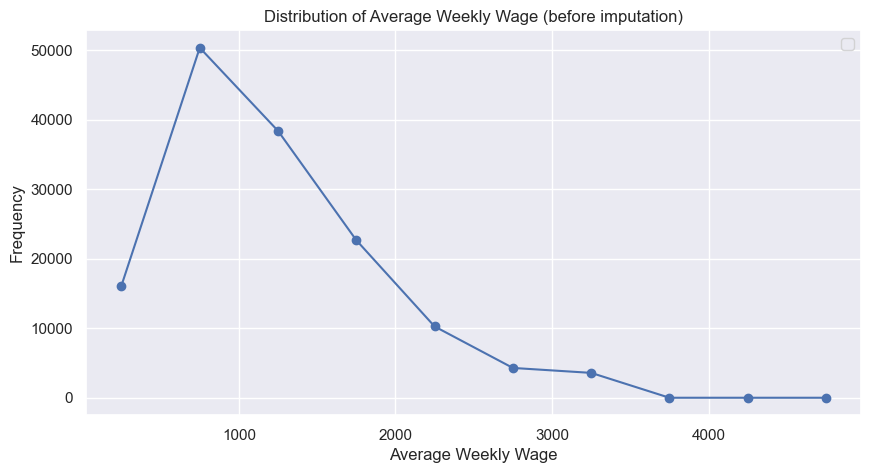

In [263]:
# Define bins for AWW (e.g., 0 to 5000 in steps of 500)
bins = np.arange(0, 5001, 500)
frequencies, bin_edges = np.histogram(X_train['Average Weekly Wage'], bins=bins)

# Calculate bin midpoints for plotting
bin_midpoints = (bin_edges[:-1] + bin_edges[1:]) / 2

# Plot the line chart
plt.figure(figsize=(10, 5))
plt.plot(bin_midpoints, frequencies, marker='o')
plt.xlabel('Average Weekly Wage')
plt.ylabel('Frequency')
plt.title('Distribution of Average Weekly Wage (before imputation)')
plt.grid(True)
plt.legend()
plt.show()


In [264]:
top_50_counties = (X_train['County of Injury'].value_counts().head(50).index)

X_train['County of Injury (Imputation)'] = X_train['County of Injury'].apply(
    lambda x: x if x in top_50_counties else None)
X_val['County of Injury (Imputation)'] = X_val['County of Injury'].apply(
    lambda x: x if x in top_50_counties else None)

X_val = impute_with_random_forest(X_val, X_train, 'Average Weekly Wage', ["Industry Code Description", "Gender", "Attorney/Representative", "Carrier Type", "Birth Year", "County of Injury (Imputation)"])
X_train = impute_with_random_forest(X_train, X_train, 'Average Weekly Wage', ["Industry Code Description", "Gender", "Attorney/Representative", "Carrier Type", "Birth Year", "County of Injury (Imputation)"])

X_val.drop(columns='County of Injury (Imputation)', inplace=True)
X_train.drop(columns='County of Injury (Imputation)', inplace=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


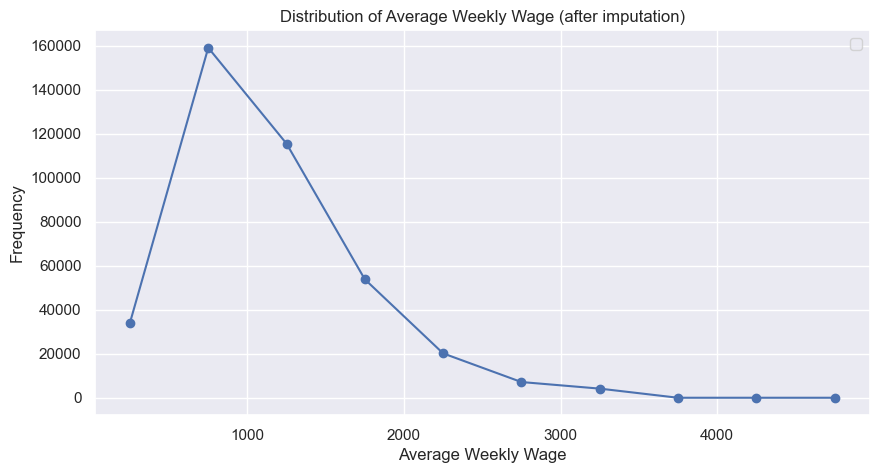

In [265]:
# Define bins for AWW (e.g., 0 to 5000 in steps of 500)
bins = np.arange(0, 5001, 500)
frequencies, bin_edges = np.histogram(X_train['Average Weekly Wage'], bins=bins)

# Calculate bin midpoints for plotting
bin_midpoints = (bin_edges[:-1] + bin_edges[1:]) / 2

# Plot the line chart
plt.figure(figsize=(10, 5))
plt.plot(bin_midpoints, frequencies, marker='o')
plt.xlabel('Average Weekly Wage')
plt.ylabel('Frequency')
plt.title('Distribution of Average Weekly Wage (after imputation)')
plt.grid(True)
plt.legend()
plt.show()

##### IME-4 Count

In [266]:
X_train['IME-4 Count'].isna().sum()

301939

In [267]:
X_train = replace_nan_with_zeros(X_train, ['IME-4 Count'])

In [268]:
X_val = replace_nan_with_zeros(X_val, ['IME-4 Count'])

##### Alternative Dispute Resolution

In [269]:
X_val = impute_mode(X_val, X_train, 'Alternative Dispute Resolution')

In [270]:
X_train = impute_mode(X_train, X_train, 'Alternative Dispute Resolution')

## **5.3** Feature Engineering

**1) Days until First Report**

In [271]:
X_train['Days until First Report'] = (X_train[['C-3 Date', 'C-2 Date']].min(axis=1) - X_train['Accident Date']).dt.days
X_val['Days until First Report'] = (X_val[['C-3 Date', 'C-2 Date']].min(axis=1) - X_val['Accident Date']).dt.days

Since raw dates are often not directly informative for predictive models, we derived features based on time differences to extract more meaningful insights. One such feature represents the time difference between the first report receival date (between C3 and C2) and the accident date. This feature helps quantify the delay in reporting the incident, which may influence claim outcomes.

**2) Days until Assembly**

In [272]:
X_train['Days until Assembly'] = (X_train['Assembly Date'] - X_train['Accident Date']).dt.days
X_val['Days until Assembly'] = (X_val['Assembly Date'] - X_val['Accident Date']).dt.days

A new feature was created to represent the time difference between the assembly date of the claim and the date of the accident. This feature captures the delay or immediacy in reporting the incident.

**3) First Report Submitter**

In [273]:
X_train['First Report Submitter'] = X_train.apply(lambda row: 'Employer' if pd.isna(row['C-3 Date']) or (row['C-2 Date'] <= row['C-3 Date']) else 'Employee', axis=1)
X_val['First Report Submitter'] = X_val.apply(lambda row: 'Employer' if pd.isna(row['C-3 Date']) or (row['C-2 Date'] <= row['C-3 Date']) else 'Employee', axis=1)

A new feature was constructed to evaluate whether the individual reporting the accident has an impact on the outcome. This feature aims to capture potential correlations between the reporter and the resolution or characteristics of the claim.

In [274]:
X_train['First Report Submitter'].value_counts()

First Report Submitter
Employer    289869
Employee    104015
Name: count, dtype: int64

**4) Assembly Quarter**

In [275]:
X_train['Assembly Quarter'] = X_train['Assembly Date'].dt.quarter
X_val['Assembly Quarter'] = X_val['Assembly Date'].dt.quarter

**5) Assembly Date Referenced**

In [276]:
reference_date = df['Assembly Date'].min()
reference_date

Timestamp('2020-01-01 00:00:00')

In [277]:
X_train['Assembly Date Referenced'] = ( X_train['Assembly Date']-reference_date).dt.days
X_val['Assembly Date Referenced'] = ( X_val['Assembly Date']-reference_date).dt.days

All date features in the dataset were transformed into recency measures. A reference date was set to the start of the Assembly period, and the difference in days was calculated for all dates in the dataset. Positive values represent the number of days since the reference date, while negative values indicate the number of days before it. This transformation ensures consistency across date features and facilitates their integration into the modeling process.

**6) Accident Date Referenced**

In [278]:
X_train['Accident Date Referenced'] = (X_train['Accident Date'] - reference_date).dt.days
X_val['Accident Date Referenced'] = (X_val['Accident Date'] - reference_date).dt.days

**7) First Report Date Referenced**

In [279]:
X_train['First Report Referenced'] = X_train.apply(
    lambda row: (row['C-3 Date'] - reference_date) 
    if pd.isna(row['C-2 Date']) or (pd.notna(row['C-3 Date']) and row['C-2 Date'] <= row['C-3 Date']) 
    else (row['C-2 Date'] - reference_date), 
    axis=1
).dt.days

X_val['First Report Referenced'] = X_val.apply(
    lambda row: (row['C-3 Date'] - reference_date) 
    if pd.isna(row['C-2 Date']) or (pd.notna(row['C-3 Date']) and row['C-2 Date'] <= row['C-3 Date']) 
    else (row['C-2 Date'] - reference_date), 
    axis=1
).dt.days

**8) Log Average Weekly Wage**

In [280]:
X_train['Log Average Weekly Wage'] = np.log(X_train['Average Weekly Wage'])
X_val['Log Average Weekly Wage'] = np.log(X_val['Average Weekly Wage'])

This feature was designed to smooth extreme values, reduce the high variance present in the original variable, and stabilize the distribution.

## **5.4** Dealing with Categorical variables

**Strategy for each categorical variable:**

- Dropping **Industry Code**, **WCIO Cause of Injury Code**, **WCIO Nature of Injury Code** and **WCIO Part Of Body Code** because we kept the description.

- We mapped features with 2 unique values into 0s and 1 converting them to binary, such as **Alternative Dispute Resolution**, **Attorney/Representative**, **First Report Submitter** and **COVID 19 Indicator**.

- Afterwards, we'll do **frequency encoding** for all categoricals

In [281]:
X_train.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Injury Type', 'County of Injury', 'COVID-19 Indicator',
       'District Name', 'First Hearing Date', 'Gender', 'IME-4 Count',
       'Industry Code', 'Industry Code Description', 'Medical Fee Region',
       'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description', 'Zip Code',
       'Number of Dependents', 'C-2 Date Missing', 'C-3 Date Missing',
       'First Hearing Date Missing', 'Carrier Type Missing',
       'Average Weekly Wage Missing', 'IME-4 Count Missing',
       'Industry Code Description Missing',
       'WCIO Part Of Body Description Missing', 'Average Weekly Wage Zero',
       'Days until Fi

### Implementing the treatments

In [282]:
categorical_columns = ['Alternative Dispute Resolution', 'Attorney/Representative', 'Carrier Name', 'Carrier Type', 'District Name', 'Gender',
                    'First Report Submitter', 'Industry Code Description', 'Medical Fee Region', 'WCIO Cause of Injury Description', 
                    'WCIO Nature of Injury Description', 'WCIO Part Of Body Description','County of Injury', 'Zip Code']

binary_columns = ['Alternative Dispute Resolution', 'Attorney/Representative', 'First Report Submitter',  'COVID-19 Indicator']


In [283]:
date_features = [col for col in X_train.columns if col.endswith('Date')]
binary_features = [col for col in X_train.columns if X_train[col].nunique() == 2]
numerical_features =[col for col in X_train.columns 
                      if col not in binary_features and (col.startswith('ce_') or (col in X_train.select_dtypes(include=['int64', 'float64']).columns and not col.endswith('Code')))]
categorical_features = [col for col in X_train.columns 
if (col not in numerical_features + binary_features + date_features) 
and (col == 'Zip Code' or not col.endswith('Code'))]

X_train_encoded = count_encoding(X_train, categorical_features)
X_val_encoded = count_encoding(X_val, categorical_features)
X_train_encoded = X_train_encoded.astype('int64')
X_val_encoded = X_val_encoded.astype('int64')

In [284]:
X_train_final = pd.concat([X_train, X_train_encoded], axis=1)
X_val_final = pd.concat([X_val, X_val_encoded], axis=1)

#### Target - Claim Injury Type - Ordinal Encoding

In [285]:
enc2 = LabelEncoder() #encoder for labels
y_train_encoded = pd.Series(enc2.fit_transform(y_train), index=y_train.index)
y_val_encoded = pd.Series(enc2.transform(y_val), index=y_val.index)

We use ordinal encoding for the target since this feature has a order of severity associated.

## **5.5** Data Scaling

### Implementing scaling for numerical variables

In [286]:
binary_features = [col for col in X_train_final.columns if X_train_final[col].nunique() == 2]
numerical_features =[col for col in X_train_final.columns 
                if col not in binary_features and (col.startswith('ce_') or (col in X_train_final.select_dtypes(include=['int64', 'float64']).columns and not col.endswith('Code')))]


In [287]:
numerical_features

['Age at Injury',
 'Average Weekly Wage',
 'Birth Year',
 'IME-4 Count',
 'Number of Dependents',
 'Days until First Report',
 'Days until Assembly',
 'Assembly Date Referenced',
 'Accident Date Referenced',
 'First Report Referenced',
 'Log Average Weekly Wage',
 'ce_Carrier Name',
 'ce_Carrier Type',
 'ce_Claim Injury Type',
 'ce_County of Injury',
 'ce_District Name',
 'ce_Industry Code Description',
 'ce_Medical Fee Region',
 'ce_WCIO Cause of Injury Description',
 'ce_WCIO Nature of Injury Description',
 'ce_WCIO Part Of Body Description',
 'ce_Zip Code',
 'ce_Assembly Quarter']

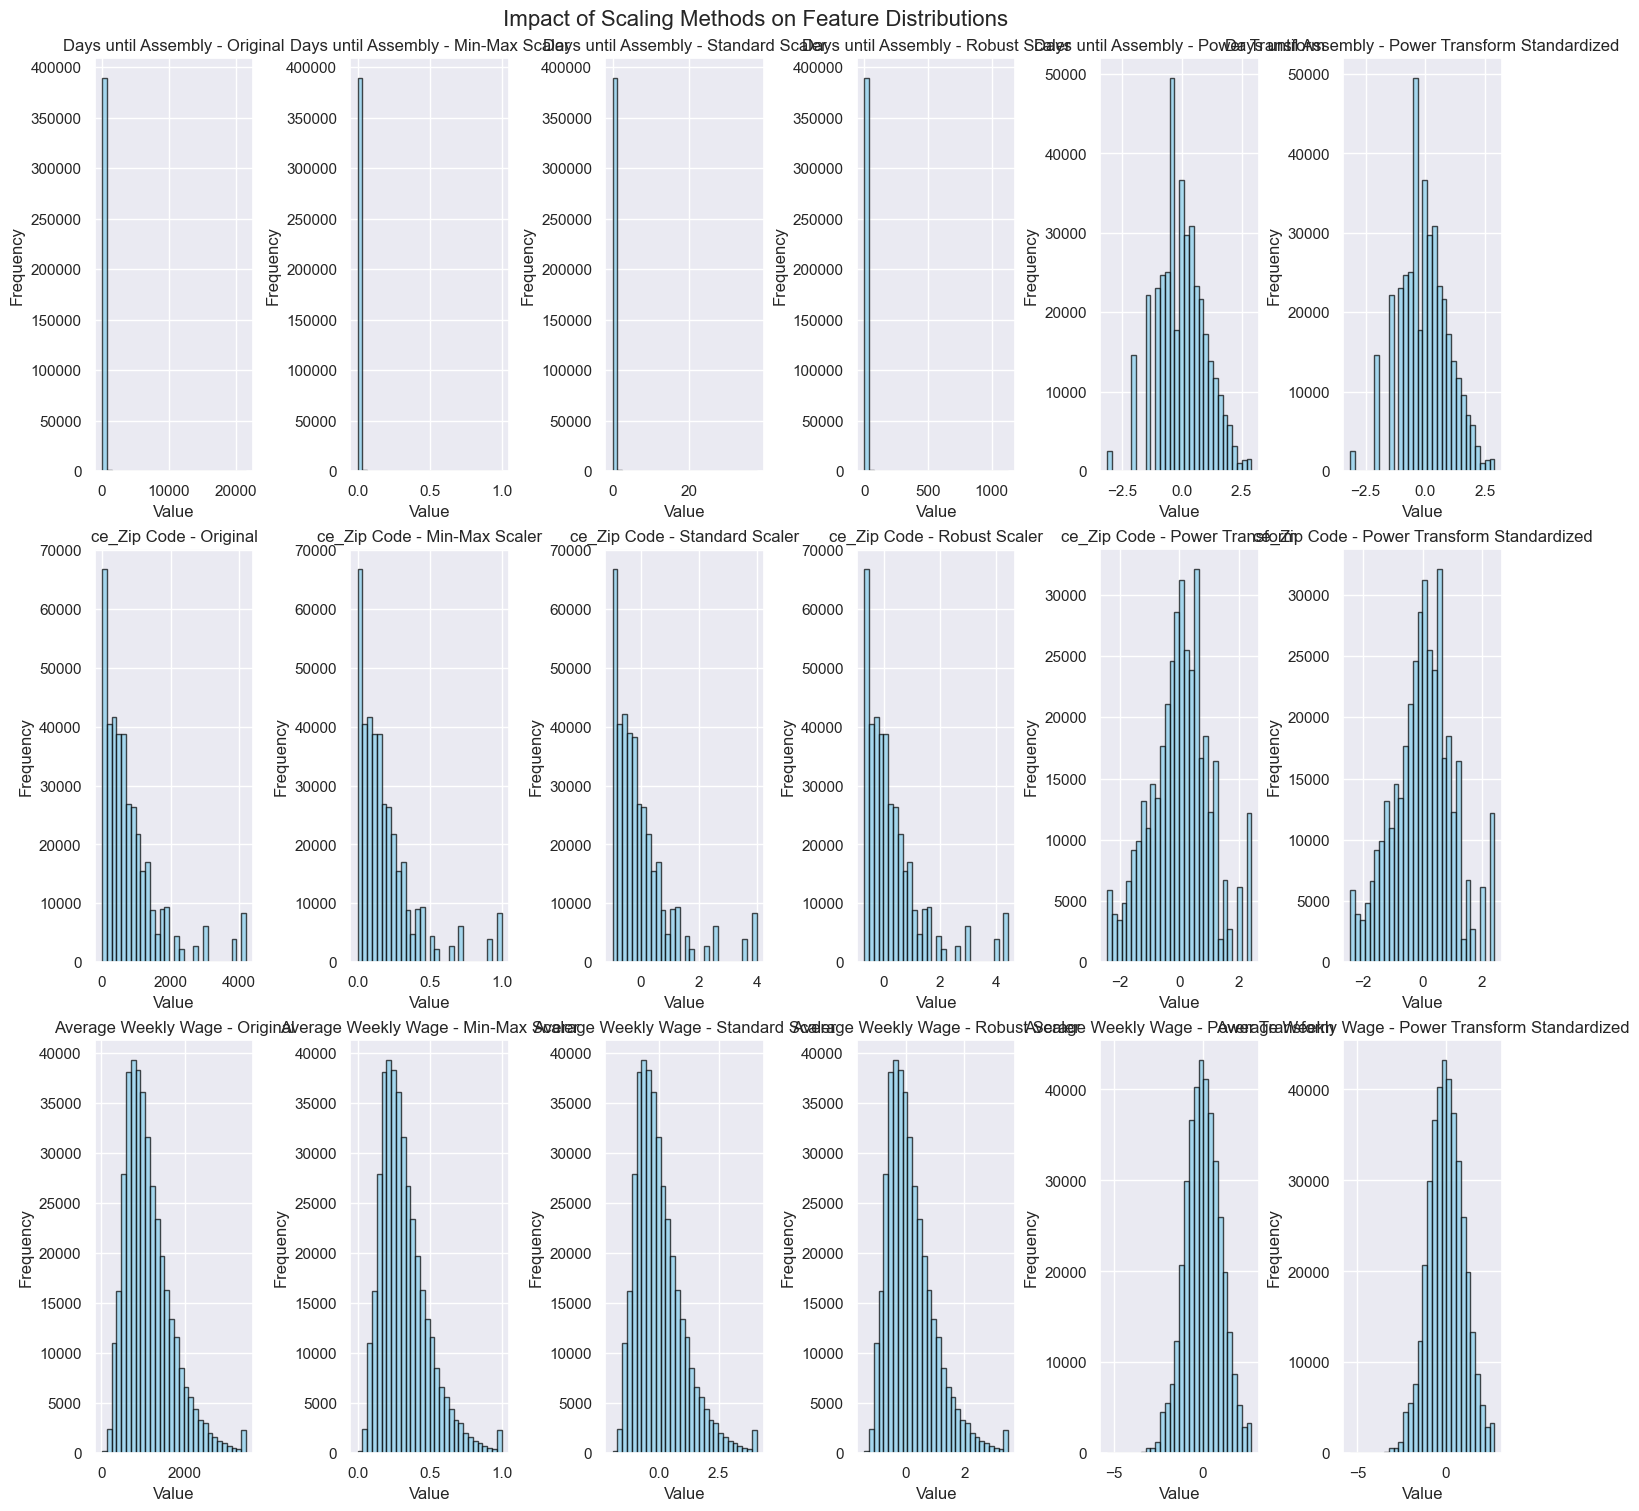

In [288]:
# Define scalers
scalers = {
    "Original": None,
    "Min-Max Scaler": MinMaxScaler(),
    "Standard Scaler": StandardScaler(),
    "Robust Scaler": RobustScaler(),
    "Power Transform": PowerTransformer(method='yeo-johnson'), 
    "Power Transform Standardized": PowerTransformer(method='yeo-johnson', standardize=True)
}

# Apply scalers
scaled_data = {}
for scaler_name, scaler in scalers.items():
    if scaler is None:
        scaled_data[scaler_name] = X_train_final[numerical_features]
    else:
        scaled_data[scaler_name] = pd.DataFrame(scaler.fit_transform(X_train_final[numerical_features]), columns=X_train_final[numerical_features].columns)

# Plot distributions for feature
selected_features = ['Days until Assembly', 'ce_Zip Code', 'Average Weekly Wage']
n_features = len(selected_features)
n_scalers = len(scalers)

fig, axes = plt.subplots(n_features, n_scalers, figsize=(15, 5 * n_features), constrained_layout=True)
for i, feature in enumerate(selected_features):
    for j, (scaler_name, scaled_df) in enumerate(scaled_data.items()):
        ax = axes[i, j] if n_features > 1 else axes[j]  # Handle single feature case
        ax.hist(scaled_df[feature], bins=30, alpha=0.7, color="skyblue", edgecolor="black")
        ax.set_title(f"{feature} - {scaler_name}")
        ax.set_xlabel("Value")
        ax.set_ylabel("Frequency")
plt.suptitle("Impact of Scaling Methods on Feature Distributions", fontsize=16)
plt.show()

In [289]:
scaler = PowerTransformer(method='yeo-johnson', standardize=True)
X_train_final[numerical_features] = pd.DataFrame(scaler.fit_transform(X_train_final[numerical_features]), 
                               index=X_train_final.index, 
                               columns=numerical_features)

In [290]:
X_val_final[numerical_features] = pd.DataFrame(scaler.transform(X_val_final[numerical_features]), 
                               index=X_val_final.index, 
                               columns=numerical_features)

In [291]:
X_train_final.shape[0]

393884

In [292]:
y_train_encoded.shape[0]

393884